# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [3]:
base_path = "data/구내식당"
# train 변수에 train.csv 데이터를 불러옵니다.
# test 변수에 test.csv 데이터를 불러옵니다.
# submission 변수에 sample_submission.csv 데이터를 불러옵니다.
train = pd.read_csv(f'{base_path}/train.csv')
test = pd.read_csv(f'{base_path}/test.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')

train.shape, test.shape, submission.shape

((1205, 12), (50, 10), (50, 3))

# 데이터 확인

In [4]:
train.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  월   2601      50     150             238          0.0   
1  2016-02-02  화   2601      50     173             319          0.0   
2  2016-02-03  수   2601      56     180             111          0.0   
3  2016-02-04  목   2601     104     220             355          0.0   
4  2016-02-05  금   2601     278     181              34          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2  모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3  모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4  모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴     중식계    석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0

In [5]:
test.head()

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2021-01-27  수   2983      88     182               5        358.0   
1  2021-01-28  목   2983     104     212             409        348.0   
2  2021-01-29  금   2983     270     249               0        294.0   
3  2021-02-01  월   2924     108     154             538        322.0   
4  2021-02-02  화   2924      62     186             455        314.0   

                                                조식메뉴  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2  모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3  모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치

In [6]:
#info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
# 왜 실수값으로 들어갔을꼬. . . ?
train['중식계'].unique()

array([1039.,  867., 1017.,  978.,  925., 1045.,  909., 1268., 1014.,
        916.,  910.,  763., 1298.,  899., 1022.,  917.,  766.,  869.,
       1127., 1000.,  837., 1326., 1026.,  901.,  847.,  728., 1286.,
        958.,  998.,  832.,  757., 1030.,  963.,  876.,  861., 1193.,
        892., 1033.,  781.,  661., 1237.,  840.,  853.,  764., 1225.,
        771.,  969.,  579., 1120.,  980.,  849.,  940.,  698., 1227.,
        795., 1028.,  811.,  652., 1242.,  964.,  723., 1216., 1008.,
        915.,  753.,  761., 1180.,  856.,  898.,  653., 1160., 1107.,
        938.,  783.,  660., 1231.,  921.,  850.,  721., 1244.,  931.,
        829.,  697., 1243.,  973.,  984.,  800.,  694., 1146., 1091.,
        877.,  805., 1142.,  820.,  886.,  879., 1292.,  952.,  939.,
        857.,  863., 1115.,  919.,  866., 1158.,  888.,  844.,  733.,
       1086.,  927.,  872.,  816.,  671., 1055.,  802.,  641., 1038.,
        874.,  842.,  845.,  708., 1023.,  924.,  943.,  754., 1266.,
       1145.,  941.,

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [9]:
# 결측치 확인  >> train, test 모두 결측치 없음
train.isnull().sum().sum()

0

In [10]:
test.isnull().sum().sum()

0

In [11]:
# 중복값 확인  >> train, test 모두 중복값 없음
train[train.duplicated()]

Empty DataFrame
Columns: [일자, 요일, 본사정원수, 본사휴가자수, 본사출장자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수, 조식메뉴, 중식메뉴, 석식메뉴, 중식계, 석식계]
Index: []

In [12]:
test[test.duplicated()]

Empty DataFrame
Columns: [일자, 요일, 본사정원수, 본사휴가자수, 본사출장자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수, 조식메뉴, 중식메뉴, 석식메뉴]
Index: []

In [13]:
train[train['석식계']== 0]

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
204   2016-11-30  수   2689      68     207               0          0.0   
224   2016-12-28  수   2705     166     225               0          0.0   
244   2017-01-25  수   2697      79     203               0          0.0   
262   2017-02-22  수   2632      75     252               0          0.0   
281   2017-03-22  수   2627      53     235               0          0.0   
306   2017-04-26  수   2626      45     304               0          0.0   
327   2017-05-31  수   2637      43     265               0          0.0   
346   2017-06-28  수   2648      58     259               0          0.0   
366   2017-07-26  수   2839     254     246               0          0.0   
392   2017-09-01  금   2642     177     303              45          0.0   
410   2017-09-27  수   2642      70     265               0          0.0   
412   2017-09-29  금   2642     214     248              22          0.0   
424   2017-10-25  수   2645      75     289               0          0.0   
449   2017-11-29  수   2644      78     261               0          0.0   
468   2017-12-27  수   2665     169     255               0          0.0   
492   2018-01-31  수   2655      56     223               0          0.0   
502   2018-02-14  수   2707     418     159               0          0.0   
510   2018-02-28  수   2707     134     278               0          0.0   
529   2018-03-28  수   2714      45     252               0          0.0   
549   2018-04-25  수   2714      66     285               0          0.0   
571   2018-05-30  수   2721      80     281               0          0.0   
589   2018-06-27  수   2728      66     277               0          0.0   
609   2018-07-25  수   2704     226     256               1          0.0   
633   2018-08-29  수   2996     103     258               0          0.0   
648   2018-09-19  수   2763      77     288               0          0.0   
667   2018-10-31  수   2805     111     306               0          0.0   
687   2018-11-28  수   2815      69     298               1          0.0   
706   2018-12-26  수   2846     184     241               0          0.0   
730   2019-01-30  수   2985      66     226               1          0.0   
747   2019-02-27  수   2806     100     274               0          0.0   
766   2019-03-27  수   2836      92     259               0          0.0   
786   2019-04-24  수   2822      59     273               0          0.0   
809   2019-05-29  수   2825      50     237               0          0.0   
828   2019-06-26  수   2758      69     282               0          0.0   
853   2019-07-31  수   2760     495     231               0          0.0   
872   2019-08-28  수   3305     123     274               0          0.0   
890   2019-09-25  수   3111      60     285               1          0.0   
912   2019-10-30  수   3121     122     294               1          0.0   
932   2019-11-27  수   3104     134     288               1          0.0   
955   2019-12-31  화   3111     709     149              22          0.0   
973   2020-01-29  수   2821     101     214               4          0.0   
993   2020-02-26  수   2872     109     190               4          0.0   
1166  2020-11-25  수   3021     206     191               3        387.0   

                                                   조식메뉴  \
204   모닝롤/카스텔라  우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개  ...   
224   모닝롤/고구마파이  우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...   
244   모닝롤/토마토샌드  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...   
262   모닝롤/브라우니  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕  명엽채...   
281   모닝롤/찐빵  우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국  김실파무침...   
306   모닝롤/와플  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개  검정콩조...   
327   모닝롤/베이글  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개  자...   
346   모닝롤/단팥빵  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국  고...   
366   모닝롤/단팥빵  우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개  숙...   
392   모닝롤/단팥빵  우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개  깻순나...   
410   모닝롤/단팥빵  우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 아욱국  명엽...   
412  

* 자기계발의 날이 있음
* 2017-09-27, 2018-02-14 에는 저녁 제공 되었음에도 저녁식사 0명 >> 17년은 황금연휴, 18년도는 설날

## 전처리 해볼 것들 정리


* 일자, 요일을 숫자형태로 변경 필요함
* 중식/석식계만 있으므로 '조식메뉴' 컬럼 삭제해도 괜찮을듯
* 메뉴를 띄어쓰기를 기준으로 원핫인코딩 시킬 필요가 있어보임..

* 년,월,요일별 식사인원(중식계, 석식계)과의 연관성 보기
* 본사에 남아있는 인원과 식사인원(중식계, 석식계) 연관성
* 테스트 데이터로 인원 예측해보기

# 전처리

## 데이터 타입 변경(float > int)

In [14]:
train = train.astype({'중식계':'int','석식계':'int','현본사소속재택근무자수':'int'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   일자              1205 non-null   object
 1   요일              1205 non-null   object
 2   본사정원수           1205 non-null   int64 
 3   본사휴가자수          1205 non-null   int64 
 4   본사출장자수          1205 non-null   int64 
 5   본사시간외근무명령서승인건수  1205 non-null   int64 
 6   현본사소속재택근무자수     1205 non-null   int64 
 7   조식메뉴            1205 non-null   object
 8   중식메뉴            1205 non-null   object
 9   석식메뉴            1205 non-null   object
 10  중식계             1205 non-null   int64 
 11  석식계             1205 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 113.1+ KB


In [15]:
test = test.astype({'현본사소속재택근무자수':'int'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   일자              50 non-null     object
 1   요일              50 non-null     object
 2   본사정원수           50 non-null     int64 
 3   본사휴가자수          50 non-null     int64 
 4   본사출장자수          50 non-null     int64 
 5   본사시간외근무명령서승인건수  50 non-null     int64 
 6   현본사소속재택근무자수     50 non-null     int64 
 7   조식메뉴            50 non-null     object
 8   중식메뉴            50 non-null     object
 9   석식메뉴            50 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.0+ KB


## 연,월,일,요일 만들기

In [16]:
train["일자"] = pd.to_datetime(train["일자"])
train["일자"].head(1)

0   2016-02-01
Name: 일자, dtype: datetime64[ns]

In [17]:
train["연"] = train["일자"].dt.year
train["월"] = train["일자"].dt.month
train["일"] = train["일자"].dt.day
train["요일"] = train["일자"].dt.dayofweek

print(train.shape)
train[["일자", "연", "월", "일", "요일"]].head()

(1205, 15)


일자     연  월  일  요일
0 2016-02-01  2016  2  1   0
1 2016-02-02  2016  2  2   1
2 2016-02-03  2016  2  3   2
3 2016-02-04  2016  2  4   3
4 2016-02-05  2016  2  5   4

In [18]:
# 연도월 파생변수 만들기
train['YM'] = train["일자"].astype(str).str[:7]

In [19]:
train['YM'].head()

0    2016-02
1    2016-02
2    2016-02
3    2016-02
4    2016-02
Name: YM, dtype: object

In [20]:
# 요일 한글로 만들기
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [21]:
# 요일 숫자 넘겨주면 요일명 반환하는 함수

def find_dayofweek(day_no):
    dayofweek="월화수목금토일"
    return dayofweek[day_no]


In [22]:
# 잘 만들어졌는지 확인
find_dayofweek(1)

'화'

In [23]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
train["요일명"] = train["요일"].map(find_dayofweek)

In [24]:
train[["요일", "요일명"]].sample(5)

요일 요일명
254    4   금
324    4   금
1014   3   목
173    1   화
612    0   월

### test에도 똑같이 전처리

In [25]:
test["일자"] = pd.to_datetime(test["일자"])
test["일자"].head(1)

0   2021-01-27
Name: 일자, dtype: datetime64[ns]

In [26]:
test["연"] = test["일자"].dt.year
test["월"] = test["일자"].dt.month
test["일"] = test["일자"].dt.day
test["요일"] = test["일자"].dt.dayofweek

# 연도월 파생변수 만들기
test['YM'] = test["일자"].astype(str).str[:7]

print(test.shape)
test[["일자", "연", "월", "일", "요일", "YM"]].head()

(50, 14)


일자     연  월   일  요일       YM
0 2021-01-27  2021  1  27   2  2021-01
1 2021-01-28  2021  1  28   3  2021-01
2 2021-01-29  2021  1  29   4  2021-01
3 2021-02-01  2021  2   1   0  2021-02
4 2021-02-02  2021  2   2   1  2021-02

## 인원수 비율 컬럼 만들어주기

In [27]:
train.rename(columns = {'본사정원수' : '정원수', '본사휴가자수' : '휴가자수',
                        '본사출장자수' : '출장자수', '본사시간외근무명령서승인건수' :  '야근수',
                        '현본사소속재택근무자수' :  '재택근무자수'}, inplace=True)

In [28]:
test.rename(columns = {'본사정원수' : '정원수', '본사휴가자수' : '휴가자수',
                        '본사출장자수' : '출장자수', '본사시간외근무명령서승인건수' :  '야근수',
                        '현본사소속재택근무자수' :  '재택근무자수'}, inplace=True)

In [29]:
train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수', '조식메뉴', '중식메뉴',
       '석식메뉴', '중식계', '석식계', '연', '월', '일', 'YM', '요일명'],
      dtype='object')

In [30]:
train[['정원수', '휴가자수', '출장자수', '야근수', '재택근무자수']].head(2)

정원수  휴가자수  출장자수  야근수  재택근무자수
0  2601    50   150  238       0
1  2601    50   173  319       0

In [31]:
# '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수'
# 식사가능인원 : 본사정원수 - (휴가자수, 출장자수, 재택근무자수)
# 휴가비율 : 휴가자수/ 정원수
# 출장비율 : 출장자수/ 정원수
# 야근비율 : 야근수/ 정원수 
train["식사가능인원"] = train["정원수"]-(train["휴가자수"]+train["출장자수"]+train["재택근무자수"])
train["휴가비율"] = train["휴가자수"]/train["정원수"]
train["출장비율"] = train["출장자수"]/train["정원수"]
train["야근비율"] = train["야근수"]/train["식사가능인원"]
train["재택비율"] = train["재택근무자수"]/train["정원수"]

In [32]:
# test에도 동일하게 적용
test["식사가능인원"] = test["정원수"]-(test["휴가자수"]+test["출장자수"]+test["재택근무자수"])
test["휴가비율"] = test["휴가자수"]/test["정원수"]
test["출장비율"] = test["출장자수"]/test["정원수"]
test["야근비율"] = test["야근수"]/test["식사가능인원"]
test["재택비율"] = test["재택근무자수"]/test["정원수"]

## 조식 컬럼 삭제

In [33]:
train = train.drop(columns="조식메뉴")

In [34]:
train.head()

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   
2 2016-02-03   2  2601    56   180  111       0   
3 2016-02-04   3  2601   104   220  355       0   
4 2016-02-05   4  2601   278   181   34       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴   중식계  ...     연  월  일  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  2016  2  1   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...  2016  2  2   
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017  ...  2016  2  3   
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978  ...  2016  2  4   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925  ...  2016  2  5   

        YM 요일명 식사가능인원      휴가비율      출장비율      야근비율  재택비율  
0  2016-02   월   2401  0.019223  0.057670  0.099125   0.0  
1  2016-02   화   2378  0.019223  0.066513  0.134146   0.0  
2  2016-02   수   2365  0.021530  0.069204  0.046934   0.0  
3  2016-02   목   2277  0.039985  0.084583  0.155907   0.0  
4  2016-02   금   2142  0.106882  0.069589  0.015873   0.0  

[5 rows x 21 columns]

In [35]:
test = test.drop(columns="조식메뉴")

In [36]:
test.head()

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2021-01-27   2  2983    88   182    5     358   
1 2021-01-28   3  2983   104   212  409     348   
2 2021-01-29   4  2983   270   249    0     294   
3 2021-02-01   0  2924   108   154  538     322   
4 2021-02-02   1  2924    62   186  455     314   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   
2  쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...   
3  쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...   
4  쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...   

                                            석식메뉴     연  월   일       YM  \
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   2021  1  27  2021-01   
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지   2021  1  28  2021-01   
2            흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치   2021  1  29  2021-01   
3           흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치   2021  2   1  2021-02   
4       흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치   2021  2   2  2021-02   

   식사가능인원      휴가비율      출장비율      야근비율      재택비율  
0    2355  0.029501  0.061012  0.002123  0.120013  
1    2319  0.034864  0.071069  0.176369  0.116661  
2    2170  0.090513  0.083473  0.000000  0.098558  
3    2340  0.036936  0.052668  0.229915  0.110123  
4    2362  0.021204  0.063611  0.192633  0.107387

# 메뉴컬럼 정리
* 띄어쓰기를 중심으로 피처 나누기

## 점심메뉴 만들기

In [37]:
# 샐러드가 추가된 시작일
train.iloc[1067:].head()

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
1067 2020-07-01   2  2997    71   252    9     153   
1068 2020-07-02   3  2997    82   268  446     152   
1069 2020-07-03   4  2997   261   288    1     157   
1070 2020-07-06   0  2997   126   220  626     172   
1071 2020-07-07   1  2997    77   242  575     152   

                                                   중식메뉴  \
1067  쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...   
1068  쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈    
1069     카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트    
1070  쌀밥/잡곡밥 매운소고기무국 춘천닭갈비 옥수수계란찜 감자채파프리카볶음 포기김치 양상추...   
1071  쌀밥/잡곡밥 물만두국 오리불고기 콩나물맛살냉채 양배추숙쌈&쌈장 포기김치 그린샐러드*...   

                                              석식메뉴   중식계  ...     연  월  일  \
1067          쌀밥/잡곡밥 돈육김치찌개 깐풍기 고갈비구이 가지된장무침 포기김치    866  ...  2020  7  1   
1068         김밥 미니우동 구슬떡볶이 김말이,고추튀김 다시마채무초무침 포기김치    675  ...  2020  7  2   
1069  쌀밥/잡곡밥 김치어묵국 케이준샐러드 섭산적표고굴소스볶음 매운콩나물무침 포기김치    607  ...  2020  7  3   
1070      쌀밥/잡곡밥 스팸김치찌개 동태포전 새송이버섯장조림 열무된장나물 포기김치   1132  ...  2020  7  6   
1071        오므라이스 유부장국 깐쇼새우 꽃맛살샐러드 채소피클*할라피뇨 포기김치    917  ...  2020  7  7   

           YM 요일명 식사가능인원      휴가비율      출장비율      야근비율      재택비율  
1067  2020-07   수   2521  0.023690  0.084084  0.003570  0.051051  
1068  2020-07   목   2495  0.027361  0.089423  0.178758  0.050717  
1069  2020-07   금   2291  0.087087  0.096096  0.000436  0.052386  
1070  2020-07   월   2479  0.042042  0.073407  0.252521  0.057391  
1071  2020-07   화   2526  0.025692  0.080747  0.227633  0.050717  

[5 rows x 21 columns]

In [38]:
# 전체 행 출력해서 살펴보기
pd.set_option('display.max_rows', None)

In [39]:
# 점심 메뉴만 꺼내서 확인해보기
lunch_menu = pd.DataFrame(train["중식메뉴"].str.split(' ').tolist())

In [40]:
lunch_menu.head()

0             1      2  3       4           5        6  7      8  9   \
0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  오징어찌개       쇠불고기   (쇠고기:호주산)      계란찜     청포묵무침      
1  쌀밥/잡곡밥  (쌀,현미흑미:국내산)   김치찌개      가자미튀김              모둠소세지구이     마늘쫑무침      
2    카레덮밥  (쌀,현미흑미:국내산)   팽이장국       치킨핑거   (닭고기:국내산)   쫄면야채무침     견과류조림      
3  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  쇠고기무국      주꾸미볶음                  부추전     시금치나물      
4  쌀밥/잡곡밥  (쌀,현미흑미:국내산)     떡국     돈육씨앗강정  (돼지고기:국내산)     우엉잡채     청경채무침      

     10 11     12             13 14    15  
0  요구르트      포기김치  (배추,고추가루:국내산)     None  
1  요구르트     배추겉절이  (배추,고추가루:국내산)     None  
2  요구르트      포기김치  (배추,고추가루:국내산)     None  
3  요구르트      포기김치  (배추,고추가루:국내산)     None  
4  요구르트      포기김치  (배추,고추가루:국내산)     None

In [41]:
#  행 살펴보기
# 비어있는 행 땡기기, <초복특식>, (New)있는 부분 변경
lunch_menu.iloc[:,0].value_counts()

쌀밥/잡곡밥                871
쌀밥/흑미밥/찰현미밥            74
콩나물밥                   23
카레덮밥                   18
나물비빔밥                  15
곤드레밥*강된장               12
쌀밥/수수밥/찰현미밥            10
                       10
단호박영양밥                 10
비빔밥                     8
곤드레밥                    8
곤드레밥*양념장                8
김치제육덮밥                  8
카레라이스                   8
쌀밥/차조밥/찰현미밥             6
짜장덮밥                    6
낙지비빔밥                   6
마파두부덮밥                  5
쌀밥/기장밥/찰현미밥             5
산채비빔밥                   5
콩나물밥*양념장                5
쌀밥/찰보리밥/찰현미밥            5
열무보리비빔밥                 4
짜장밥                     4
쌀밥/검정콩밥/찰현미밥            4
쌀밥/오곡밥                  4
봄나물비빔밥                  3
쌀밥/귀리밥/찰현미밥             3
소불고기덮밥                  3
열무비빔밥                   3
단호박카레라이스                2
곤드레밥*간장양념               2
쌀밥/보리밥/찰현미밥             2
<초복특식>                  2
쌀밥/렌틸콩밥/찰현미밥            2
참치회덮밥                   2
낙지비빔밥*계란후라이             1
쌀밥/치자밥/찰현미밥             1
쌀밥/병아리콩밥/찰현미

In [42]:
#  2열 살펴보기
# 비어있는 행 땡기기, <초복특식>, (New)있는 부분 변경
lunch_menu.iloc[:,1].value_counts()

(쌀:국내산)            905
(쌀,현미,흑미:국내산)       64
(쌀,현미흑미:국내산)        27
                    21
(쌀,돈육:국내산)          18
쌀밥/잡곡밥               8
시금치된장국               4
(쌀:국내산,소고기:호주)       4
맑은콩나물국               4
북엇국                  4
(쌀:국내산,돈육:국내산)       4
순두부찌개                3
건새우아욱국               3
(쌀,돈육국내산)            3
아욱된장국                3
우거지국                 3
얼갈이된장국               3
된장찌개                 2
김치두부국                2
냉이된장국                2
뼈없는감자탕               2
미역국                  2
유부장국                 2
동태탕                  2
아욱국                  2
어묵국                  2
순남시래기국               2
호박된장찌개               2
(쌀:국내,낙지:중국산)        2
(쌀,돈민찌:국내산)          2
한방설렁탕                2
(쌀,닭:국내산)            2
동태알탕                 2
돼지김치찌개               1
오리들깨탕                1
근대된장국                1
콩나물맑은국               1
홍합국                  1
바지락냉이국               1
동태매운탕                1
콩나물김칫국               1
계란파국                 1
굴떡국                  1
미소장국       

In [43]:
#  쌀밥/,, 이 종류 제외
lunch_menu.iloc[:,0][lunch_menu.iloc[:,0].str.contains('/')==False].value_counts()

콩나물밥                  23
카레덮밥                  18
나물비빔밥                 15
곤드레밥*강된장              12
                      10
단호박영양밥                10
곤드레밥*양념장               8
김치제육덮밥                 8
카레라이스                  8
곤드레밥                   8
비빔밥                    8
짜장덮밥                   6
낙지비빔밥                  6
마파두부덮밥                 5
산채비빔밥                  5
콩나물밥*양념장               5
열무보리비빔밥                4
짜장밥                    4
열무비빔밥                  3
소불고기덮밥                 3
봄나물비빔밥                 3
곤드레밥*간장양념              2
<초복특식>                 2
단호박카레라이스               2
참치회덮밥                  2
오곡밥                    1
고기듬뿍카레라이스              1
(New)뿌리채소영양밥&달래양념장     1
(New)바지락비빔밥            1
전주비빔밥                  1
계란채소볶음밥                1
낙지비빔밥*계란후라이            1
비빔밥*약고추장               1
돈육버섯고추장덮밥              1
베이컨김치볶음밥               1
닭살카레라이스                1
소고기콩나물밥*양념             1
새우날치알볶음밥               1
건강비빔밥*약고추장             1
콩나물밥*달래장               1


In [44]:
lunch_menu.head()

0             1      2  3       4           5        6  7      8  9   \
0  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  오징어찌개       쇠불고기   (쇠고기:호주산)      계란찜     청포묵무침      
1  쌀밥/잡곡밥  (쌀,현미흑미:국내산)   김치찌개      가자미튀김              모둠소세지구이     마늘쫑무침      
2    카레덮밥  (쌀,현미흑미:국내산)   팽이장국       치킨핑거   (닭고기:국내산)   쫄면야채무침     견과류조림      
3  쌀밥/잡곡밥  (쌀,현미흑미:국내산)  쇠고기무국      주꾸미볶음                  부추전     시금치나물      
4  쌀밥/잡곡밥  (쌀,현미흑미:국내산)     떡국     돈육씨앗강정  (돼지고기:국내산)     우엉잡채     청경채무침      

     10 11     12             13 14    15  
0  요구르트      포기김치  (배추,고추가루:국내산)     None  
1  요구르트     배추겉절이  (배추,고추가루:국내산)     None  
2  요구르트      포기김치  (배추,고추가루:국내산)     None  
3  요구르트      포기김치  (배추,고추가루:국내산)     None  
4  요구르트      포기김치  (배추,고추가루:국내산)     None

### 점심 메뉴 리스트 만들기

In [45]:
# 점심메뉴 리스트 만들기
lunch_menu_list = []

for day in range(len(train)): # 각 행별로 가져오기
    tmp = train.loc[day, '중식메뉴'].split(' ') #띄어쓰기 별로 각각 리스트에 넣어주기
    
    for i in range(len(tmp)):
        if '/' in tmp[i]:  # '/' 처리되어 있는 거 앞에 꺼만 남기기
            tmp[i] = tmp[i].split('/')[0]
            
    for i in range(len(tmp)):
        if '(New)' in tmp[i]:  # 'New' 포함되어 있는 거 처리
            tmp[i] = tmp[i][5:]
        elif 'New)' in tmp[i]:  # New)요거닭 처리
            tmp[i] = tmp[i][4:]
            
    for menu in tmp:
        if '(' in menu:  # 괄호 메뉴 제거
            tmp.remove(menu)
        elif '<' in menu: # <초복특식> 제거
            tmp.remove(menu)
        tmp = ' '.join(tmp).split() # 공백 제거
        
    lunch_menu_list.append(tmp)

In [46]:
# 잘되었는지 데이터프레임 만들어서 확인
lunch_menu = pd.DataFrame(lunch_menu_list)
lunch_menu.head()

0      1       2        3      4     5      6     7
0    쌀밥  오징어찌개    쇠불고기      계란찜  청포묵무침  요구르트   포기김치  None
1    쌀밥   김치찌개   가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이  None
2  카레덮밥   팽이장국    치킨핑거   쫄면야채무침  견과류조림  요구르트   포기김치  None
3    쌀밥  쇠고기무국   주꾸미볶음      부추전  시금치나물  요구르트   포기김치  None
4    쌀밥     떡국  돈육씨앗강정     우엉잡채  청경채무침  요구르트   포기김치  None

* 초복특식은 3번 나왔던 것 같습니다.

In [47]:
# 이상한 값들 확인해보기 
lunch_menu[lunch_menu[0].str.contains('밥|라이스|필라프')==False]

0    1       2      3      4     5     6     7
356  삼계탕  찹쌀밥  생야채&쌈장     수박    깍두기  None  None  None
603  삼계탕  찹쌀밥     생야채  참나물생채     수박   석박지  None  None
840  삼계탕  찹쌀밥  생야채&쌈장     수박  수제석박지  None  None  None

### train 데이터에 lunch_menu 파생변수 만들기

In [48]:
# 원본 데이터프레임에 리스트 통째로 파생변수 만들기
train['lunch_menu'] = lunch_menu_list
train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...  월  일  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  2  1   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...  2  2   

        YM  요일명 식사가능인원      휴가비율      출장비율      야근비율  재택비율  \
0  2016-02    월   2401  0.019223  0.057670  0.099125   0.0   
1  2016-02    화   2378  0.019223  0.066513  0.134146   0.0   

                                       lunch_menu  
0       [쌀밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  
1  [쌀밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]  

[2 rows x 22 columns]

### 밥, 국, 반찬1, 반찬2 파생변수 만들기

In [49]:
# 밥, 국, 반찬1, 반찬2까지 나누자
# 메인3부터는 위치가 달라짐. . . .(3이 있는 것도 있고, 없는 것도 있어서 !)

rice = []
soup = []
side1 = []
side2 = []

for i in range(len(train)):
    if lunch_menu_list[i][0]:
        rice.append(lunch_menu_list[i][0])
    if lunch_menu_list[i][1]:
        soup.append(lunch_menu_list[i][1])
    if lunch_menu_list[i][2]:
        side1.append(lunch_menu_list[i][2])
    if lunch_menu_list[i][3]:
        side2.append(lunch_menu_list[i][3])

In [50]:
print(len(rice))
print(len(soup))
print(len(side1))
print(len(side2))

1205
1205
1205
1205


In [51]:
# 데이터프레임에 추가해보자
train['밥'] = rice
train['국'] = soup
train['반찬1'] = side1
train['반찬2'] = side2

In [52]:
train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...  식사가능인원  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...    2401   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...    2378   

       휴가비율      출장비율      야근비율 재택비율  \
0  0.019223  0.057670  0.099125  0.0   
1  0.019223  0.066513  0.134146  0.0   

                                       lunch_menu   밥      국    반찬1      반찬2  
0       [쌀밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥  오징어찌개   쇠불고기      계란찜  
1  [쌀밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]  쌀밥   김치찌개  가자미튀김  모둠소세지구이  

[2 rows x 26 columns]

### 종류별로 분류해보기

In [53]:
# 종류살펴보기
lunch_menu[(lunch_menu[0].str.contains('쌀밥|콩나물밥|비빔밥|곤드레밥')==False)&(lunch_menu[1].str.contains('국|찌개')==True)]

0        1          2         3        4      5           6  \
2              카레덮밥     팽이장국       치킨핑거    쫄면야채무침    견과류조림   요구르트        포기김치   
65           단호박영양밥   시래기된장국     돈육칠리강정  멸치크랜베리볶음     가지나물   포기김치        None   
75            낙지볶음밥     미역장국        탕수어      우엉조림     매실주스   포기김치        None   
89             카레덮밥      맑은국      떡갈비조림      쫄면무침   열무된장나물   포기김치        None   
116           참치회덮밥     미소장국    고구마치즈구이        춘권      토마토   포기김치        None   
121           연복풍덮밥   도토리묵냉국     꽁치오븐구이     마늘쫑무침    양배추피클   포기김치        None   
131           불고기덮밥      맑은국  새우까스&탈탈소스     고구마범벅     노각무침   포기김치        None   
135          단호박영양밥   도토리묵냉국    소고기숙주볶음      땅콩조림   쑥갓두부무침   포기김치        None   
160            카레덮밥      맑은국     샐러드파스타   새송이버섯조림     오이무침   포기김치        None   
176             짜장밥      계란국     사천식탕수육     풍기샐러드      단무지   포기김치        None   
194           버섯영양밥  조랭이떡미역국        유산슬     임연수구이    청경채무침   포기김치        None   
201            카레덮밥      맑은국    통감자오븐구이    샐러드파스타   연근땅콩조림  베추겉절이        None   
209             짜장밥     유부장국     해물누룽지탕    개성감자만두    쨔샤이무침   포기김치        None   
214          소불고기덮밥    가쯔오장국      고구마튀김    멕시칸샐러드    청경채무침   포기김치        None   
244            카레덮밥      맑은국        유린기    개성감자만두   오이사과무침   포기김치        None   
254             오곡밥    소고기무국       굴비구이      홍어무침     보름나물   포기김치        None   
268            카레덮밥      맑은국    미니채소떡갈비       군만두      무피클   포기김치        None   
291             짜장밥    맑은계란국        유산슬      부추만두    단무지무침   포기김치        None   
341           카레라이스   유부주머니국     언양식불고기       떡볶이       수박   포기김치        None   
351            짜장덮밥      계란국        유산슬       군만두      단무지   열무김치        None   
361          김치제육덮밥      맑은국      양장피잡채    오꼬노미야끼    천도복숭아  알타리김치        None   
382             짜장밥      맑은국  해물까스*칠리소스      부추만두      단무지   열무김치        None   
400           카레라이스     미소장국      떡갈비조림    모듬묵샐러드      요플레   포기김치        None   
429            카레덮밥      맑은국     개성감자만두    파스타샐러드     군고구마   포기김치        None   
444          단호박영양밥    가쯔오장국     돈육칠리강정    모듬묵샐러드     숙주나물    깍두기        None   
459           카레라이스     미소장국      떡갈비조림   모듬묵*양념장      요플레   포기김치        None   
487            짜장덮밥      맑은국      과일탕수육    개성감자만두      단무지  배추겉절이        None   
492          김치제육덮밥     미소장국      양장피잡채       계란찜   아삭고추무침  알타리김치        None   
505            카레덮밥      맑은국    고구마치즈구이    파스타샐러드     오이무침   포기김치        None   
529        단호박카레라이스     유부장국        유린기     볼어묵볶음      오복지   포기김치        None   
553          김치제육덮밥     유부장국      양장피잡채    오꼬노미야끼      오렌지  알타리김치        None   
562            카레덮밥      맑은국    고구마치즈구이  어묵꽈리고추볶음     오이무침   포기김치        None   
589            카레덮밥    가쯔오장국        깐풍육      구운채소   *발사믹소스  오복지무침        포기김치   
614            카레덮밥    가쯔오장국      떡갈비조림      감자만두      오복지   포기김치        None   
638          김치제육덮밥      맑은국     샐러드파스타     오징어튀김      무생채   열무김치        None   
643          소불고기덮밥    가쯔오장국      오징어튀김      구운채소   *발사믹소스  오복지무침        포기김치   
648            카레덮밥     유부장국     감자프리타타    메밀전병만두    쨔샤이무침   포기김치        None   
682            카레덮밥      맑은국  새우까스*탈탈소스    파스타샐러드     오이무침   포기김치        None   
692          단호박영양밥     유부장국     언양식불고기    주꾸미초무침  파래김*양념장   포기김치        None   
720            짜장덮밥      맑은국        유산슬       군만두      단무지   포기김치        None   
730            카레덮밥     유부장국  새우까스*칠리소스      쫄면무침     오이무침   포기김치        None   
756            카레덮밥    가쯔오장국    고구마치즈구이      쫄면무침     무말랭이   포기김치        None   
761          김치제육덮밥      맑은국       야채튀김     시저샐러드     오이무침  알타리김치        None   
766          단호박영양밥    가쯔오장국     돈육칠리강정    모듬묵샐러드     숙주나물  배추겉절이        None   
783            짜장덮밥      맑은국     사천식탕수육       군만두      단무지   포기김치        None   
786           카레라이스     미소장국     언양식불고기       떡볶이    방울토마토   포기김치        None   
818          김치제육덮밥      맑은국   사과고구마그라탕      맛살냉채    오복지무침    깍두기        None   
823            짜장덮밥      맑은국        깐풍기       물만두      단무지   포기김치        None   
828            카레덮밥    가쯔오장국    고구마치즈구이      쫄면무침

In [54]:
# 메뉴 확인용
lunch_menu[(lunch_menu[0].str.contains('쌀밥|비빔밥|콩나물밥|곤드레밥|영양밥|오곡밥')==True)
          &(lunch_menu[1].str.contains('국|찌개|탕|장')==True)][2].value_counts()

오징어볶음           32
닭갈비             30
버섯불고기           29
훈제오리구이          28
돈육굴소스볶음         25
짬뽕불고기           24
제육볶음            23
등갈비김치찜          21
주꾸미볶음           19
언양식불고기          18
닭볶음탕            17
소불고기            15
돼지갈비찜           15
해물누룽지탕          15
유자청제육볶음         14
미니채소떡갈비         14
갈치구이            13
탕수어             12
치킨핑거            12
굴비구이            12
유린기             11
쇠고기장조림          11
안동찜닭            11
동파삼겹수육          11
소고기장조림          11
매운돼지갈비찜         10
고추잡채*꽃빵         10
쇠고기낙지볶음         10
돈육강정             9
쇠고기숙주볶음          9
오징어튀김            9
소고기숙주볶음          9
순살파닭             9
닭오븐구이            8
마늘치킨             8
미트볼케찹조림          8
닭데리야끼조림          8
사천식탕수육           7
레몬탕수육            7
수제돈까스            7
돈육간장불고기          7
동파육              7
오징어볶음*소면         7
류산슬              7
오리불고기            7
깐풍기              6
소고기낙지볶음          6
코다리강정            6
수제돈가스            6
돈육장조림            6
돈육간장볶음           6
닭강정              6
유자청돈육볶음     

In [55]:
train.loc[(train['밥'].str.contains('쌀밥|비빔밥|콩나물밥|곤드레밥|영양밥|오곡밥')==True)
          &(train['국'].str.contains('국|찌개|탕|장|꽁치|수제비|곤드레밥')==True)
          &(train['반찬1'].str.contains('유린기|류산슬|유산슬|깐풍|탕수|돈가스|고추잡채|동파|데리야끼|까스')==False),
                 '종류'] = '한식'
train.loc[(train['밥'].str.contains('카레|참치회|불고기|오므라이스')==True)
          |(train['국'].str.contains('생선커틀렛|메밀소바')==True)
          |(train['반찬1'].str.contains('데리야끼|돈가스|까스')==True),
                 '종류'] = '일식'
train.loc[(train['밥'].str.contains('연복풍|짜장|제육|마파두부|새우|돈육|볶음밥')==True)
          |(train['반찬1'].str.contains('유린기|류산슬|유산슬|깐풍|탕수|고추잡채|동파')==True),
                 '종류'] = '중식'
train.loc[(train['밥'].str.contains('필라프')==True)
          |(train['국'].str.contains('스프|커리')==True)
          |(train['반찬1'].str.contains('함박')==True),
                 '종류'] = '양식'
train.loc[(train['밥'].str.contains('삼계탕')==True),
                 '종류'] = '특식'
# lunch_menu_df['메인메뉴범주'] = lunch_menu_df['메인메뉴범주'].fillna('기타')
train[train["종류"].isna()]
train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...      휴가비율  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  0.019223   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...  0.019223   

       출장비율      야근비율  재택비율                                      lunch_menu  \
0  0.057670  0.099125   0.0       [쌀밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]   
1  0.066513  0.134146   0.0  [쌀밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]   

    밥      국    반찬1      반찬2  종류  
0  쌀밥  오징어찌개   쇠불고기      계란찜  한식  
1  쌀밥   김치찌개  가자미튀김  모둠소세지구이  한식  

[2 rows x 27 columns]

### 특별메뉴(쌀밥 아닌 날) 파생변수 만들기

In [56]:
# 특식 컬럼 만들기
special = []

for day in train['밥']:
    if day == '쌀밥':
        special.append(0)
    else: special.append(1)
    
train["특별메뉴"] = special

In [57]:
train[["밥", "특별메뉴"]].head(10)

밥  특별메뉴
0    쌀밥     0
1    쌀밥     0
2  카레덮밥     1
3    쌀밥     0
4    쌀밥     0
5    쌀밥     0
6    쌀밥     0
7    쌀밥     0
8    쌀밥     0
9    쌀밥     0

#### 특식인 날 vs 평소
* 크게 연관있어보이진 않는다..
* 월요일이 더 많이 식사하는듯..

Text(0.5, 1.0, '특별메뉴가 나온 날과 아닌 날의 중식계')

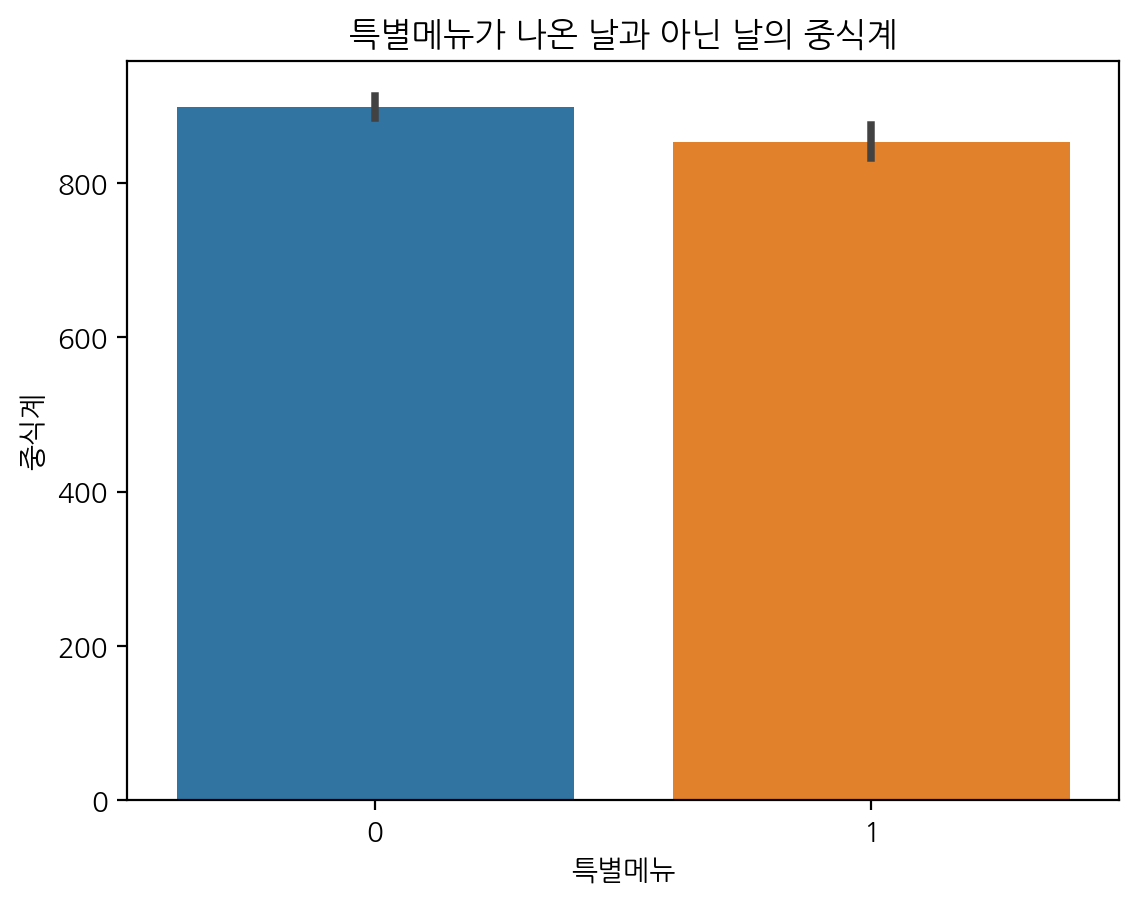

In [58]:
sns.barplot(data=train, x="특별메뉴", y="중식계")
plt.title("특별메뉴가 나온 날과 아닌 날의 중식계")

## 점심 메뉴 관련 시각화

Text(0.5, 1.0, '메뉴 종류별 중식계')

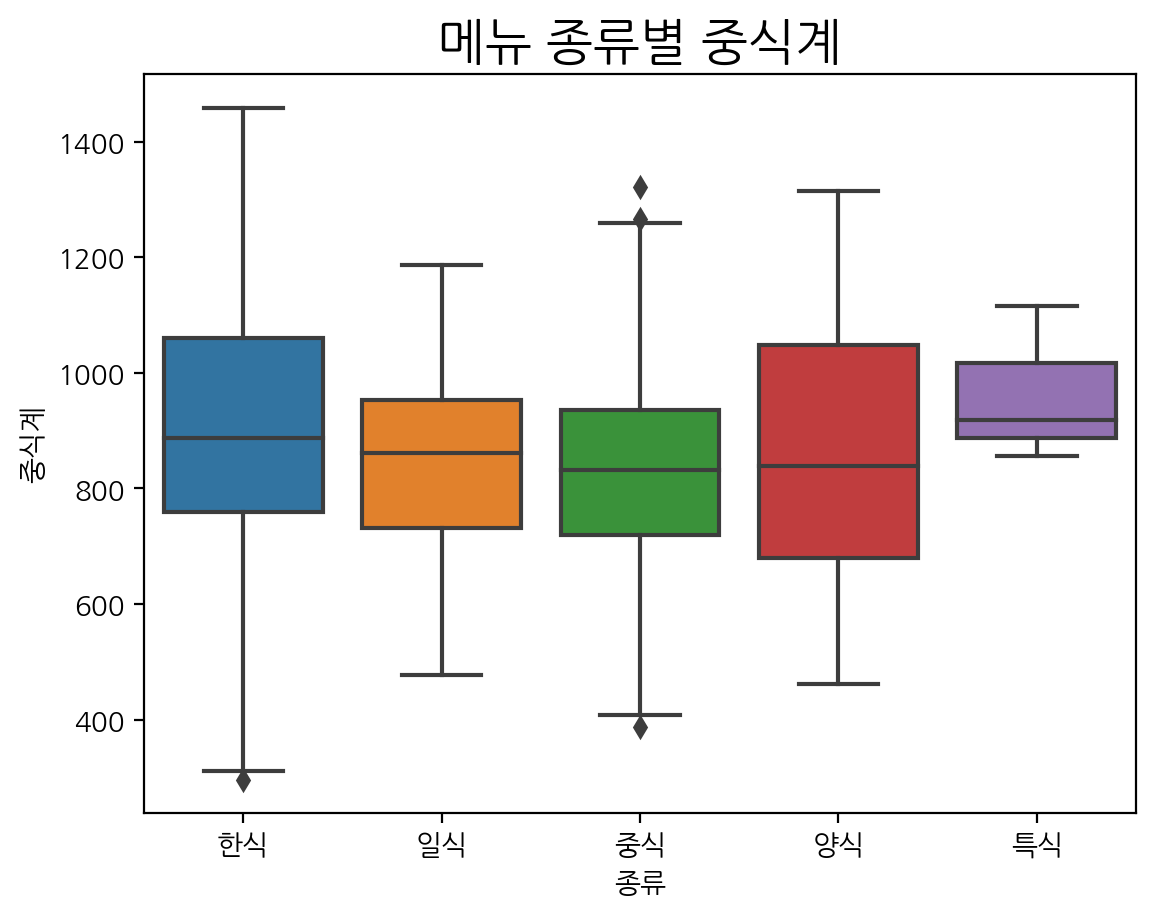

In [59]:
sns.boxplot(data=train, x='종류',y='중식계')
plt.title("메뉴 종류별 중식계", fontsize=18)

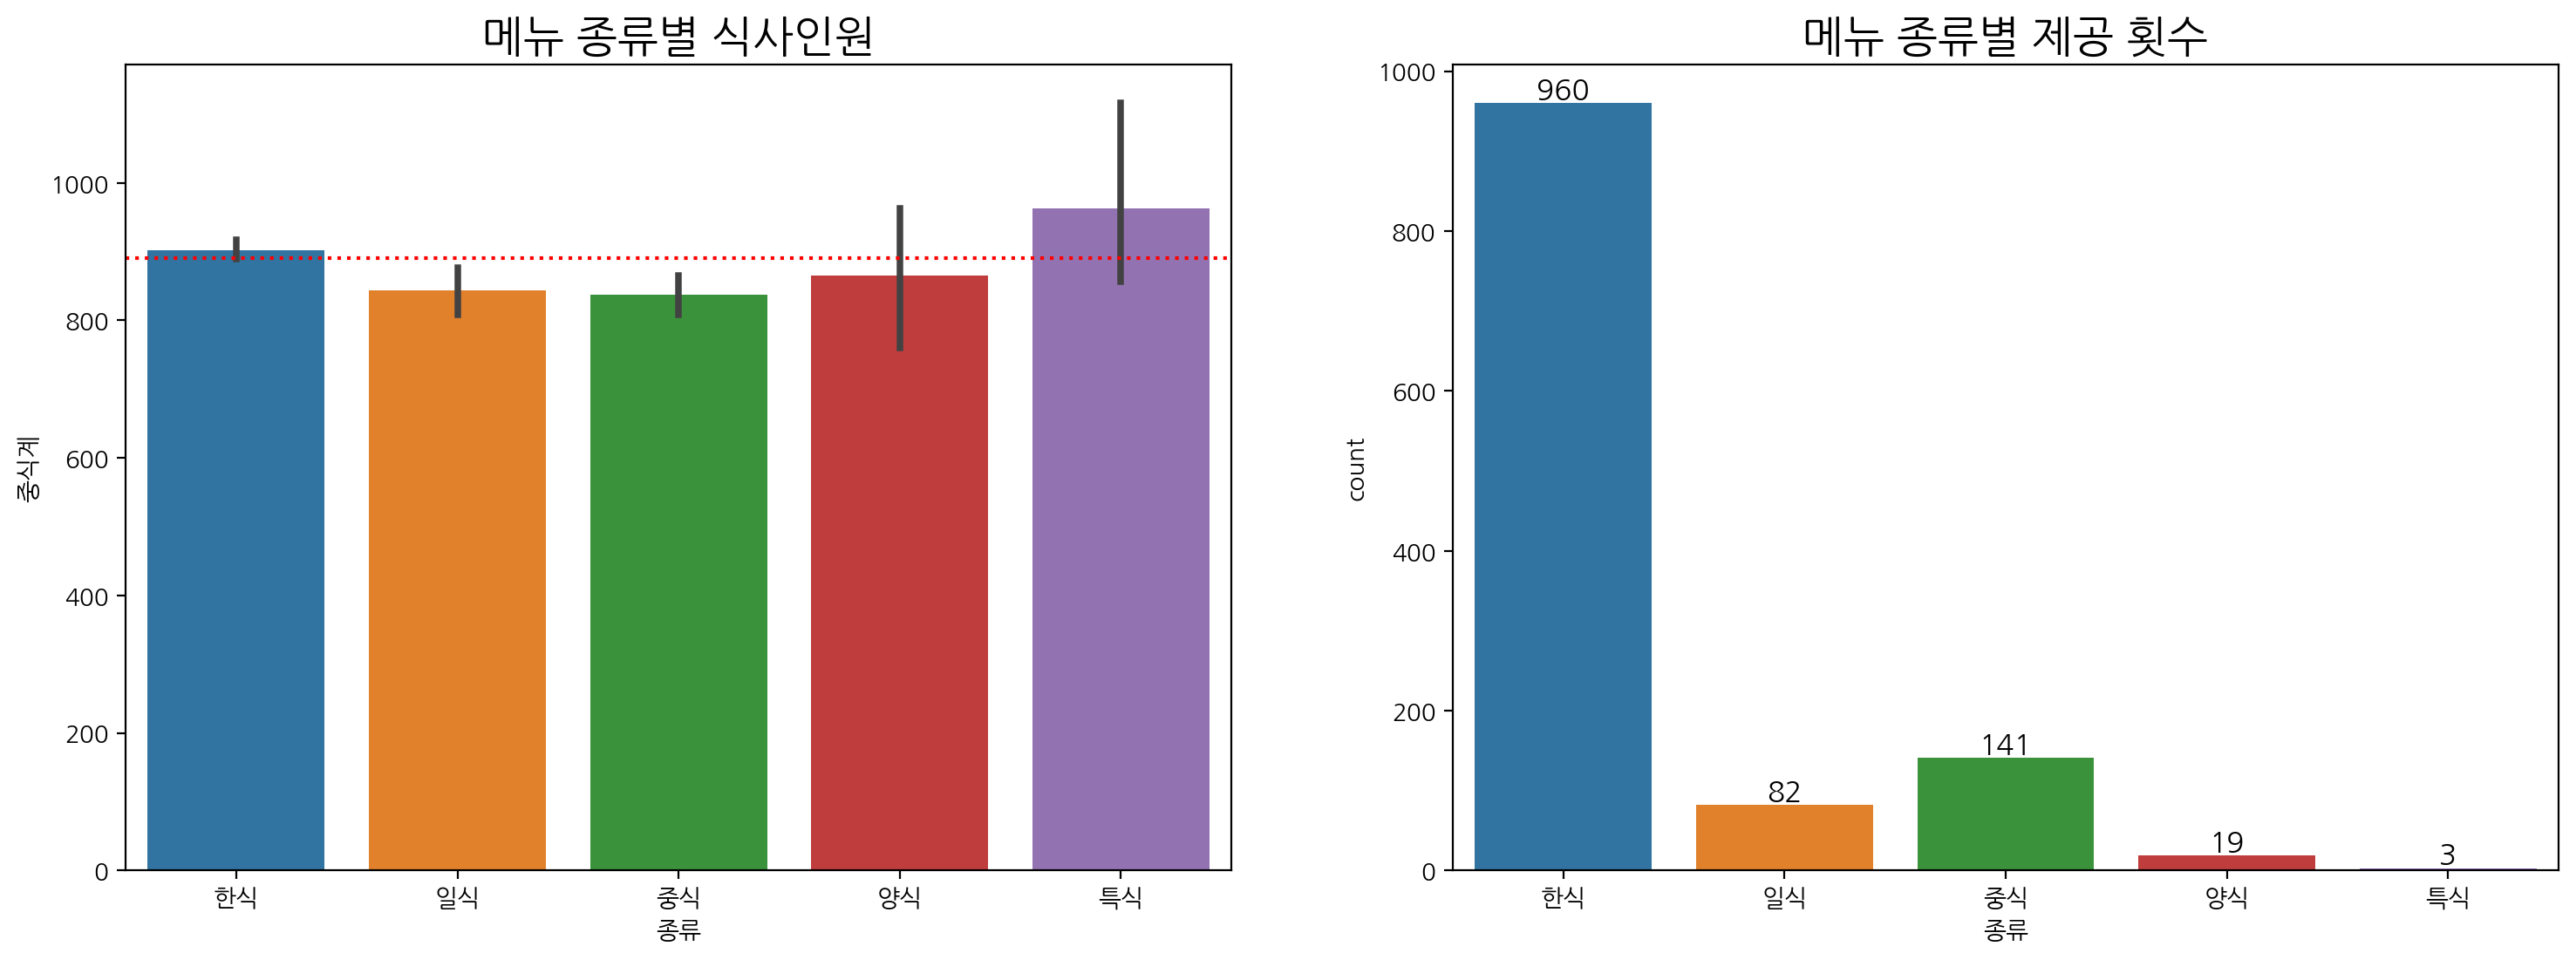

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

sns.barplot(data=train, x='종류', y='중식계', ax=ax[0])
ax[0].set_title("메뉴 종류별 식사인원", fontsize=18)
ax[0].axhline(train['중식계'].mean(), c='red', ls=':')
sns.countplot(data=train, x='종류', ax=ax[1])
ax[1].set_title("메뉴 종류별 제공 횟수", fontsize=18)
    
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height+5, height, ha = 'center', size = 12)
    

Text(0.5, 1.0, '가장 많이 먹는 메뉴 종류')

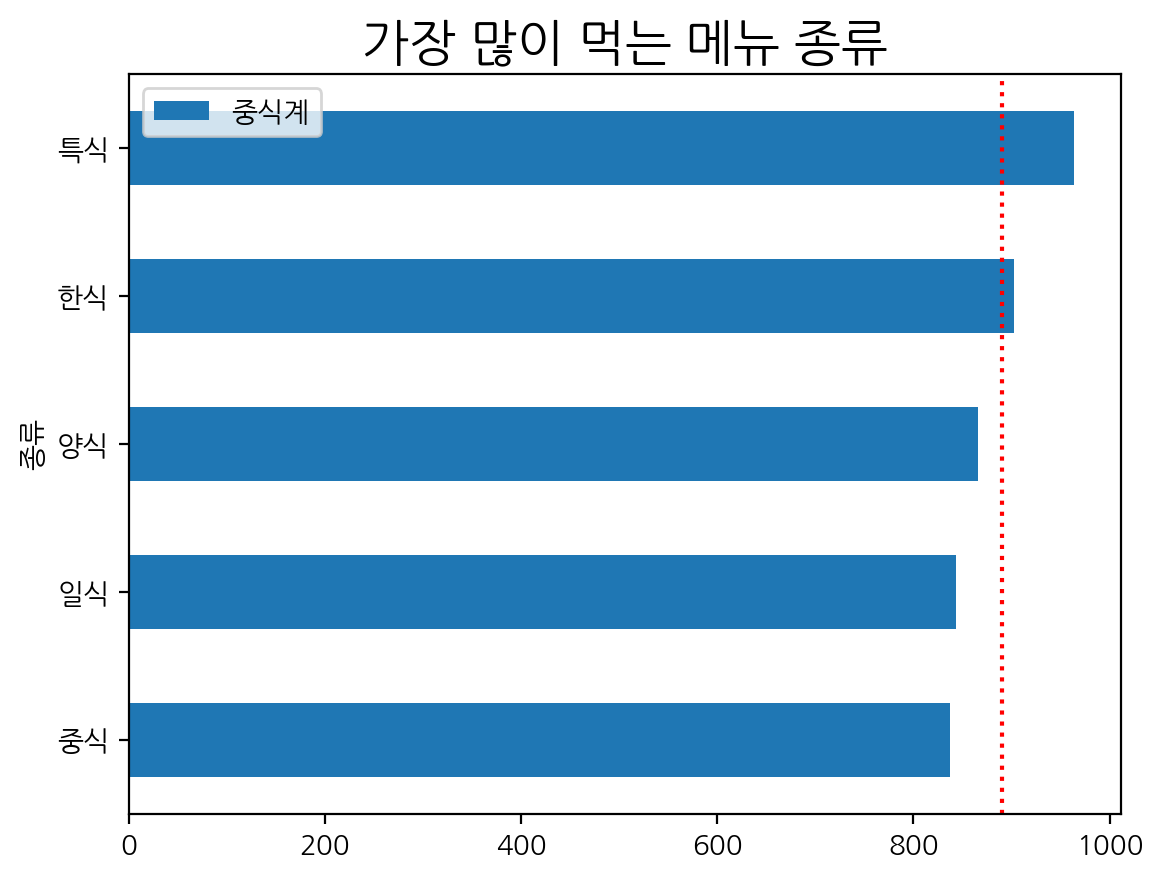

In [61]:
train.groupby('종류').agg({'중식계':'mean'}).sort_values(by='중식계').plot.barh()
plt.axvline(train['중식계'].mean(), c='red', ls=':')
plt.title("가장 많이 먹는 메뉴 종류", fontsize=18)

Text(0.5, 1.0, '가장 많이 나온 메뉴 종류')

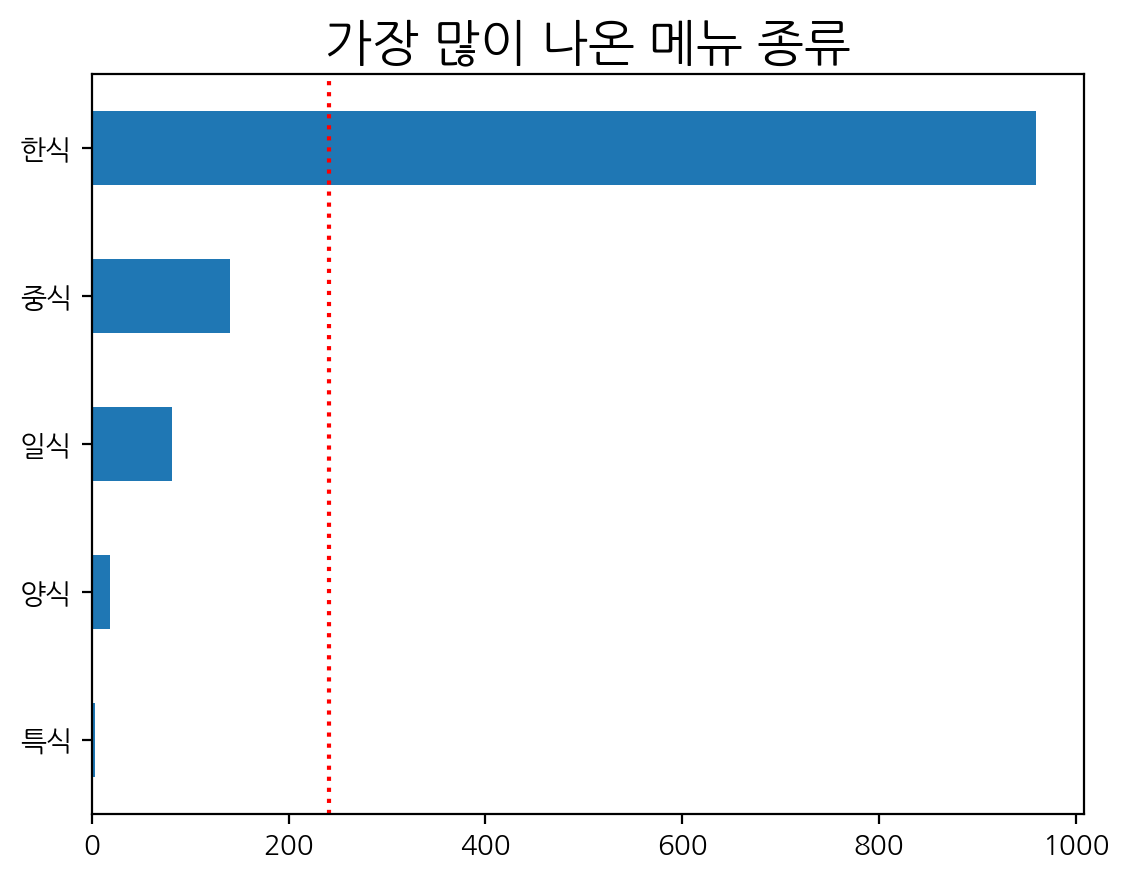

In [62]:
train['종류'].value_counts().sort_values(ascending=True).plot.barh()
plt.axvline(train['종류'].value_counts().mean(), c='r', ls=':')
plt.title("가장 많이 나온 메뉴 종류", fontsize=18)

### 밥, 국, 반찬별 많이 나온 메뉴, 많이 먹은 메뉴

In [63]:
train['밥'].unique()

array(['쌀밥', '카레덮밥', '낙지비빔밥', '비빔밥', '곤드레밥', '콩나물밥*달래장', '봄새싹비빔밥', '콩나물밥',
       '나물비빔밥', '단호박영양밥', '산채비빔밥', '낙지볶음밥', '열무비빔밥', '참치회덮밥', '연복풍덮밥',
       '열무보리비빔밥', '불고기덮밥', '산채비빔밥*강된장', '짜장밥', '버섯영양밥', '소불고기덮밥', '오곡밥',
       '곤드레밥*강된장', '봄나물비빔밥', '카레라이스', '짜장덮밥', '삼계탕', '김치제육덮밥',
       '곤드레밥*간장양념', '단호박카레라이스', '곤드레밥*양념장', '콩나물밥*양념장', '마파두부덮밥',
       '야채볶음밥*짜장소스', '김치볶음밥', '오므라이스', '파인애플볶음밥', '김치필라프', '불고기비빔밥',
       '김밥볶음밥', '고기듬뿍카레라이스', '건강비빔밥*약고추장', '새우날치알볶음밥', '소고기콩나물밥*양념',
       '닭살카레라이스', '베이컨김치볶음밥', '돈육버섯고추장덮밥', '비빔밥*약고추장', '낙지비빔밥*계란후라이',
       '계란채소볶음밥', '전주비빔밥', '바지락비빔밥', '뿌리채소영양밥&달래양념장', '전주비빔밥*약고추장'],
      dtype=object)

Text(0.5, 1.0, '점심 밥 메뉴 많이 나온 top20')

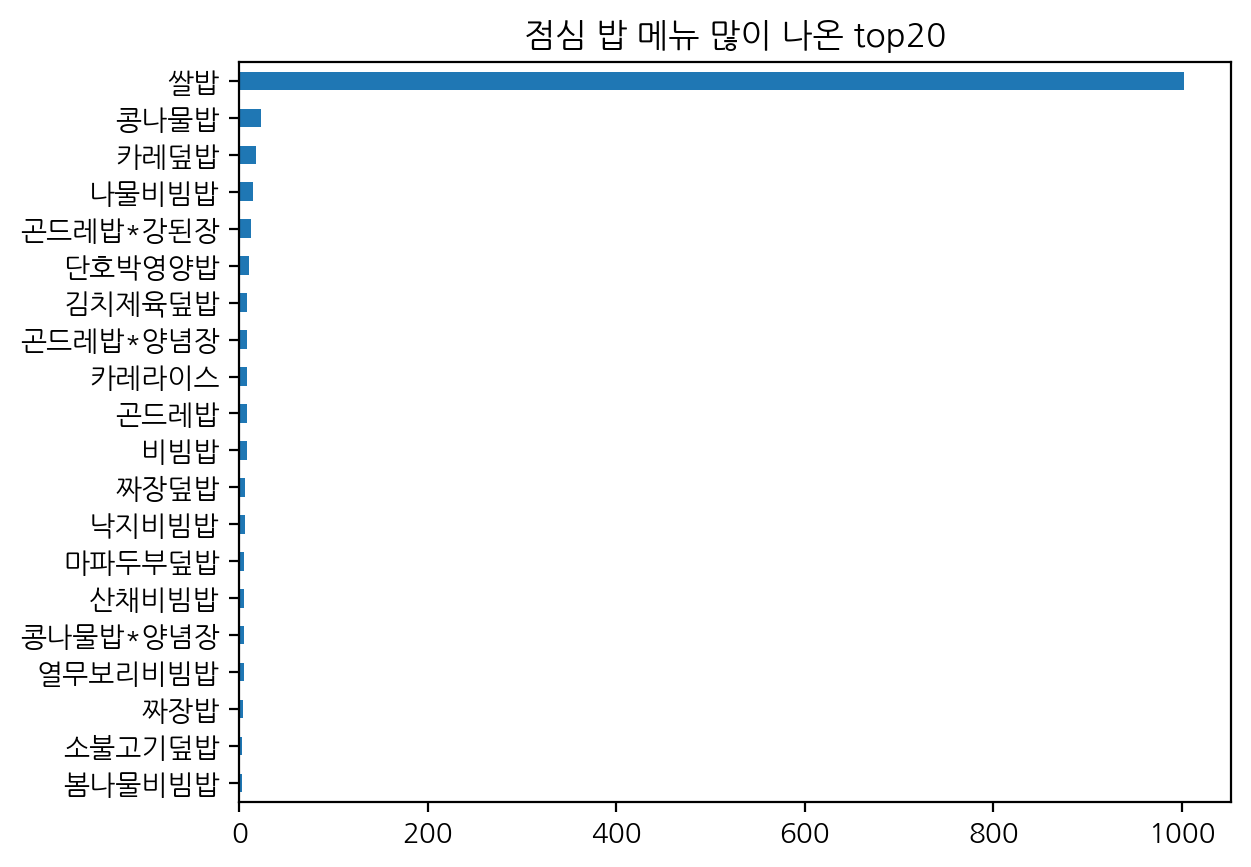

In [64]:
train['밥'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 밥 메뉴 많이 나온 top20")

Text(0.5, 1.0, '점심 밥 종류별 많이 먹은 top20')

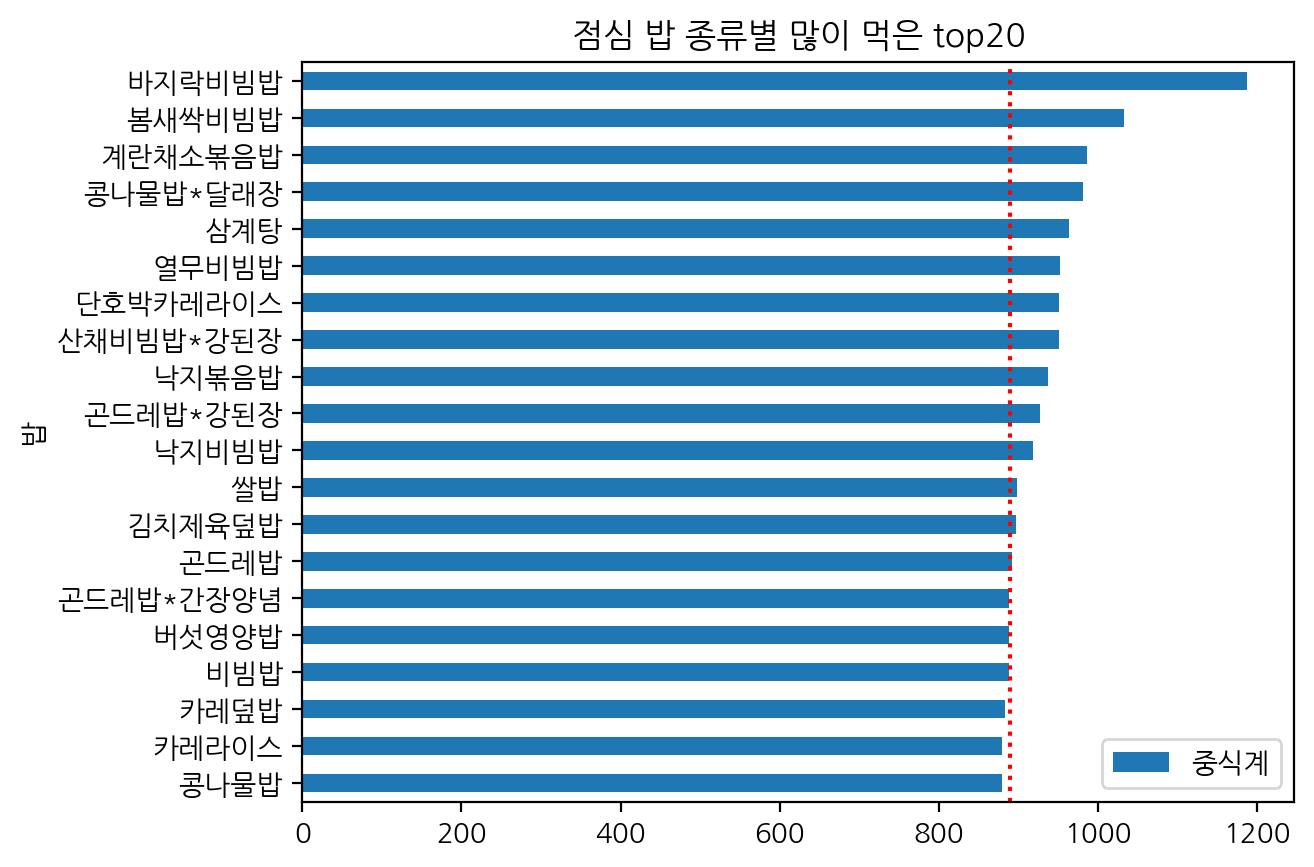

In [65]:
train.groupby('밥').agg({'중식계':'mean'}).nlargest(20, columns='중식계').sort_values(by='중식계').plot.barh()
plt.axvline(train['중식계'].mean(), c='red', ls=':')
plt.title("점심 밥 종류별 많이 먹은 top20")

In [66]:
train['국'].unique()

array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', '쇠고기샤브국', '맑은국', '닭개장',
       '옹심이만두국', '쪽파국', '매운콩나물국', '버섯들깨탕', '순두부찌개', '올갱이아욱국', '냉이된장찌개',
       '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '매운어묵국', '시래기된장국',
       '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국', '북어콩나물국', '한방갈비탕',
       '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개', '도토리묵냉국', '버섯들깨찌개',
       '가쯔오장국', '우무묵냉국', '호박잎찌개', '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국',
       '청국장찌개', '부대찌개*라면사리', '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕',
       '해물된장찌개', '버섯매운탕', '두부맑은국', '황태맑은국', '토란국', '아욱된장국', '느타리버섯국',
       '우거지해장국', '시금치된장국', '팽이버섯국', '건새우무국', '꽁치김치말이', '계란국', '동태찌개',
       '알탕', '김치콩나물국', '김치국', '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국',
       '홍합탕', '아욱국', '차돌박이된장찌개', '얼갈이국', '사골떡국', '황태국', '짬뽕국', '냉이콩나물국',
      

Text(0.5, 1.0, '점심 국 메뉴 많이 나온 top20')

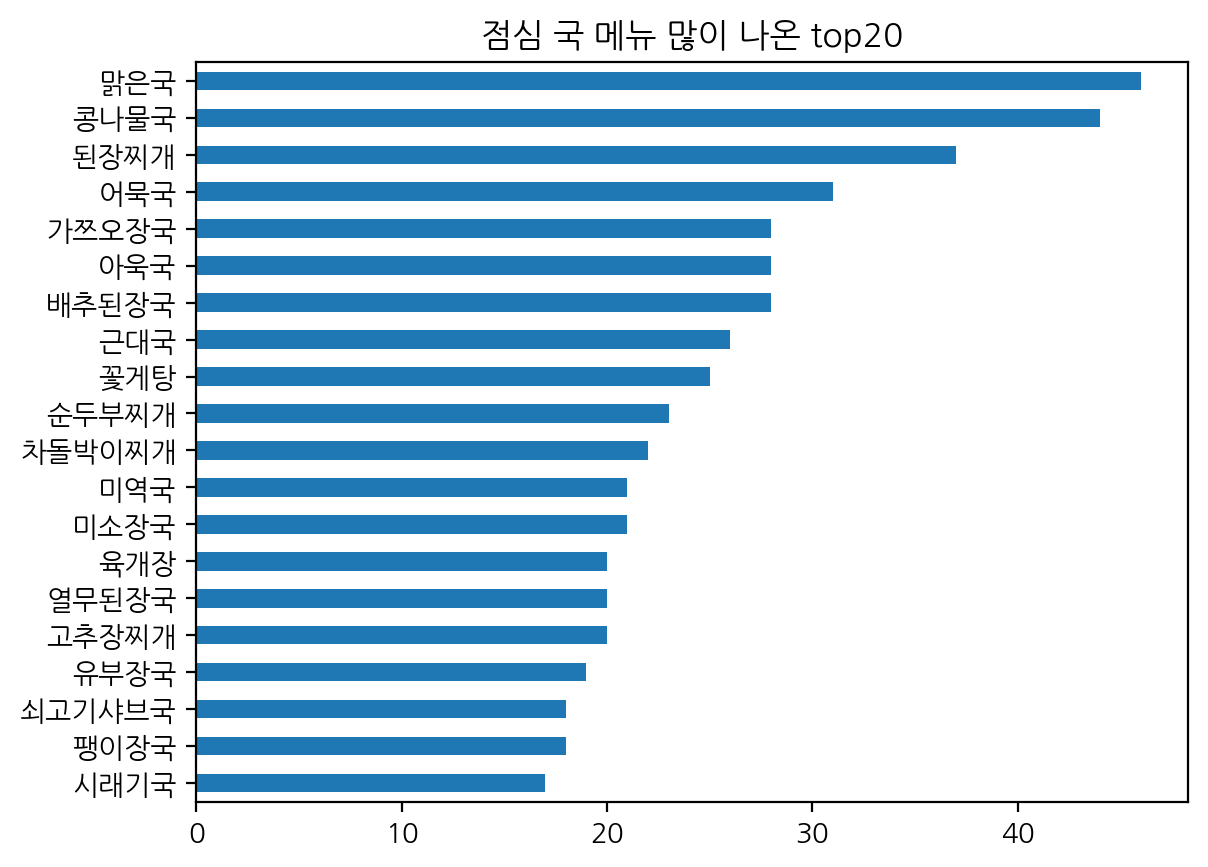

In [67]:
train['국'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 국 메뉴 많이 나온 top20")

Text(0.5, 1.0, '점심 국 종류별 많이 먹은 top20')

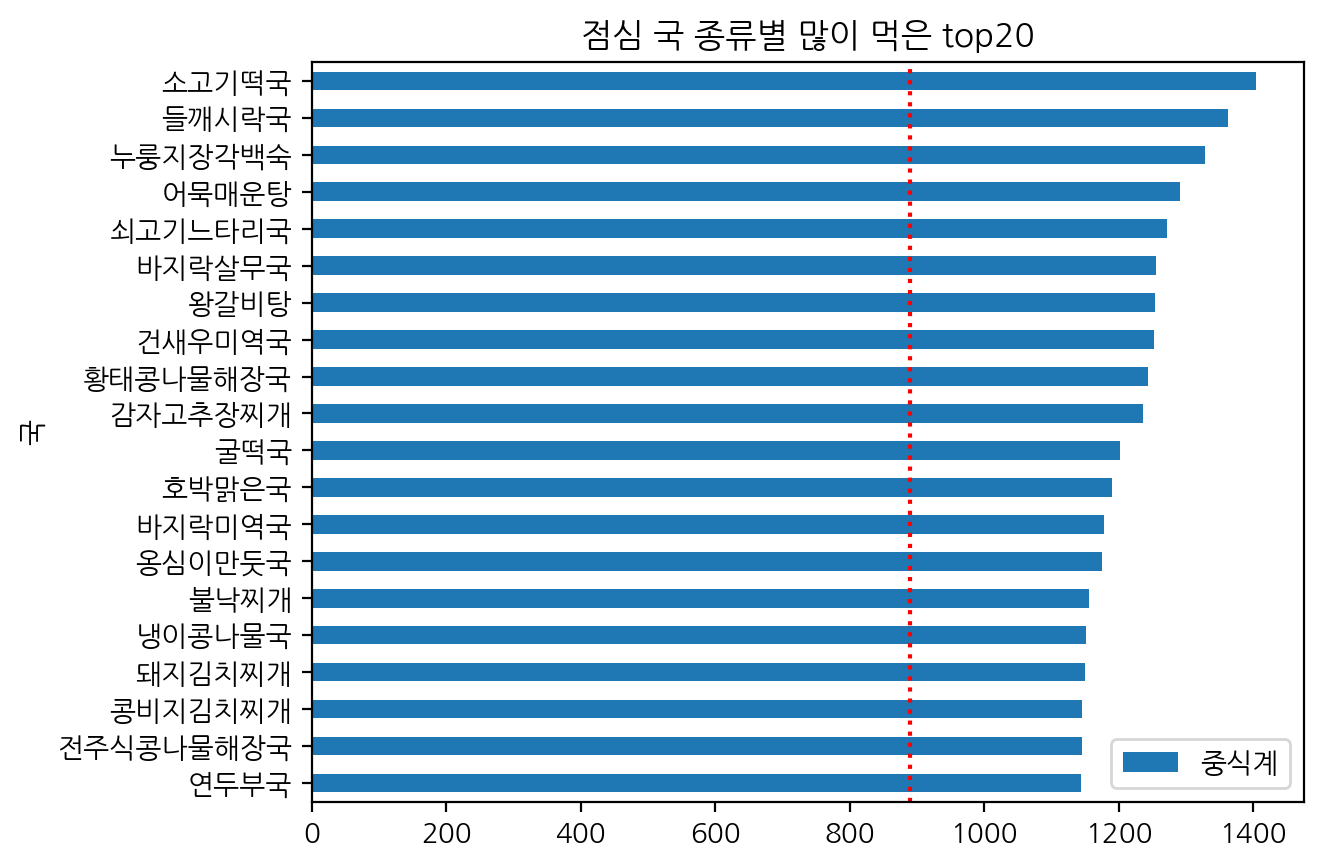

In [68]:
train.groupby('국').agg({'중식계':'mean'}).nlargest(20, columns='중식계').sort_values(by='중식계').plot.barh()
plt.axvline(train['중식계'].mean(), c='red', ls=':')
plt.title("점심 국 종류별 많이 먹은 top20")

In [69]:
train['반찬1'].unique()

array(['쇠불고기', '가자미튀김', '치킨핑거', '주꾸미볶음', '돈육씨앗강정', '훈제오리구이', '돈육굴소스볶음',
       '닭감자조림', '탕수어', '쇠고기장조림', '고구마치즈구이', '마늘간장치킨', '갈치구이', '돈육간장볶음',
       '소세지피망볶음', '닭갈비', '오징어볶음', '제육볶음', '탕수육', '고등어김치말이', '돈육장조림',
       '닭데리야끼조림', '수제돈가스', '돈육고추장볶음', '소불고기', '미니채소떡갈비', '버섯불고기', '코다리강정',
       '치킨텐더*요거트D', '자반고등어구이', '오징어튀김', '갈치조림', '오징어볶음*소면', '매운돼지갈비찜',
       '순살양념치킨', '쇠고기단호박조림', '돈육강정', '꽁치한마리구이', '매콤떡갈비조림', '쇠고기볶음',
       '등갈비김치찜', '돈간장불고기', '궁중떡찜', '양념파닭', '미트볼조림', '모둠장조림', '돈육칠리강정',
       '찜닭', '닭오븐구이', '쇠고기불고기', '꼬지삼색전', '닭양념조림', '누룽지탕수육', '순살깐풍기',
       '돼지갈비찜', '떡갈비조림', '가자미양념찜', '레몬탕수육', '간장치킨', '돈삼겹보쌈', '매콤낙지볶음',
       '목살데리야끼구이', '고등어구이', '간장돼지갈비찜', '유자청제육볶음', '꽁치김치말이찜', '닭강정',
       '갈릭돈까스', '순살파닭', '사천식탕수육', '매운주꾸미볶음', '돈육떡강정', '목살데리야끼', '고추장불고기',
       '불닭볶음', '동파삼겹수육', '훈제오리냉채', '꽁치오븐구이', '꽃맛살볶음', '매콤돼지갈비찜', '미니함박조림',
       '장어강정', '삼겹살오븐구이', '새우까스&탈탈소스', '고등어조림', '갈릭돈가스', '소고기숙주볶음',
       '고추잡채*꽃빵', '칠리탕수육', '닭볶음', '동태무조림', '마늘치킨', '계란말이', '닭찜',
       '가자미카

Text(0.5, 1.0, '점심 반찬1 많이 나온 top20')

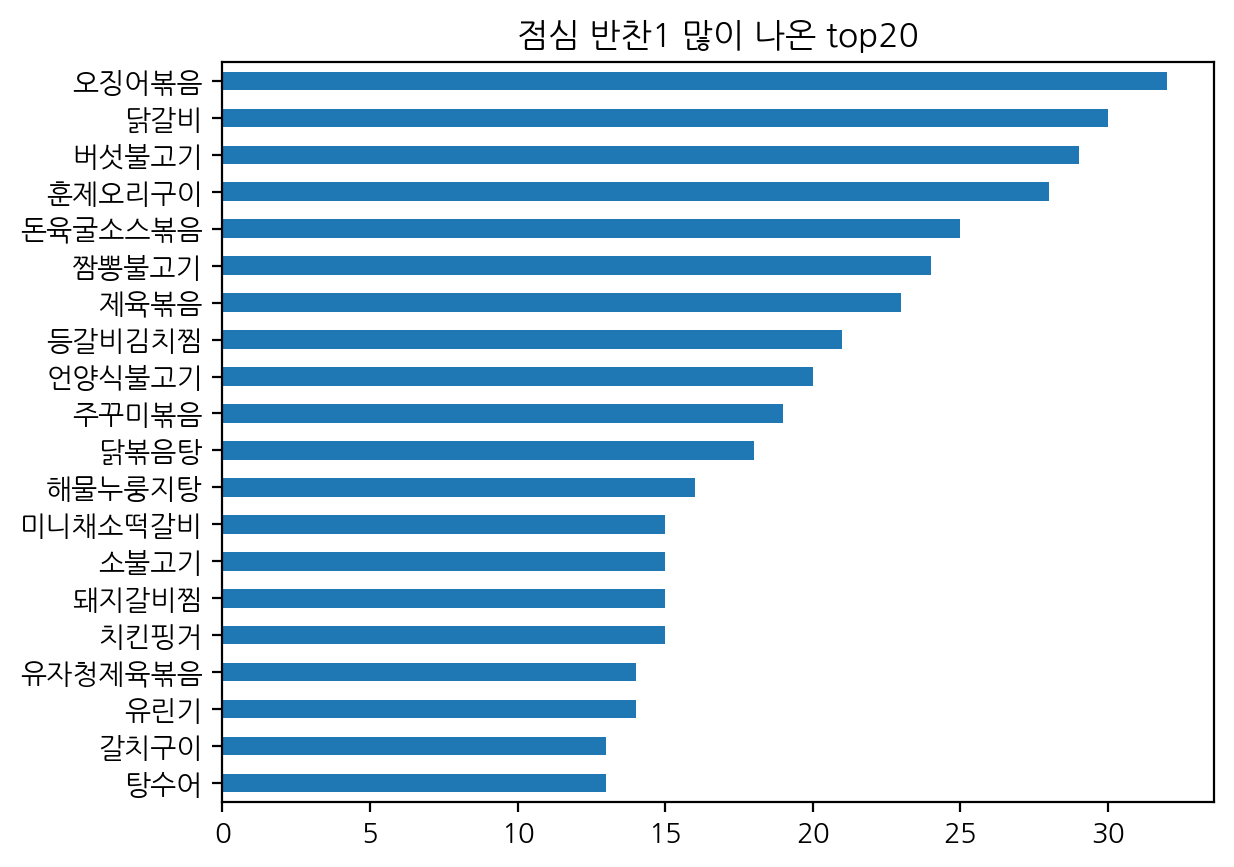

In [70]:
train['반찬1'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 반찬1 많이 나온 top20")

Text(0.5, 1.0, '점심 반찬1 종류별 많이 먹은 top20')

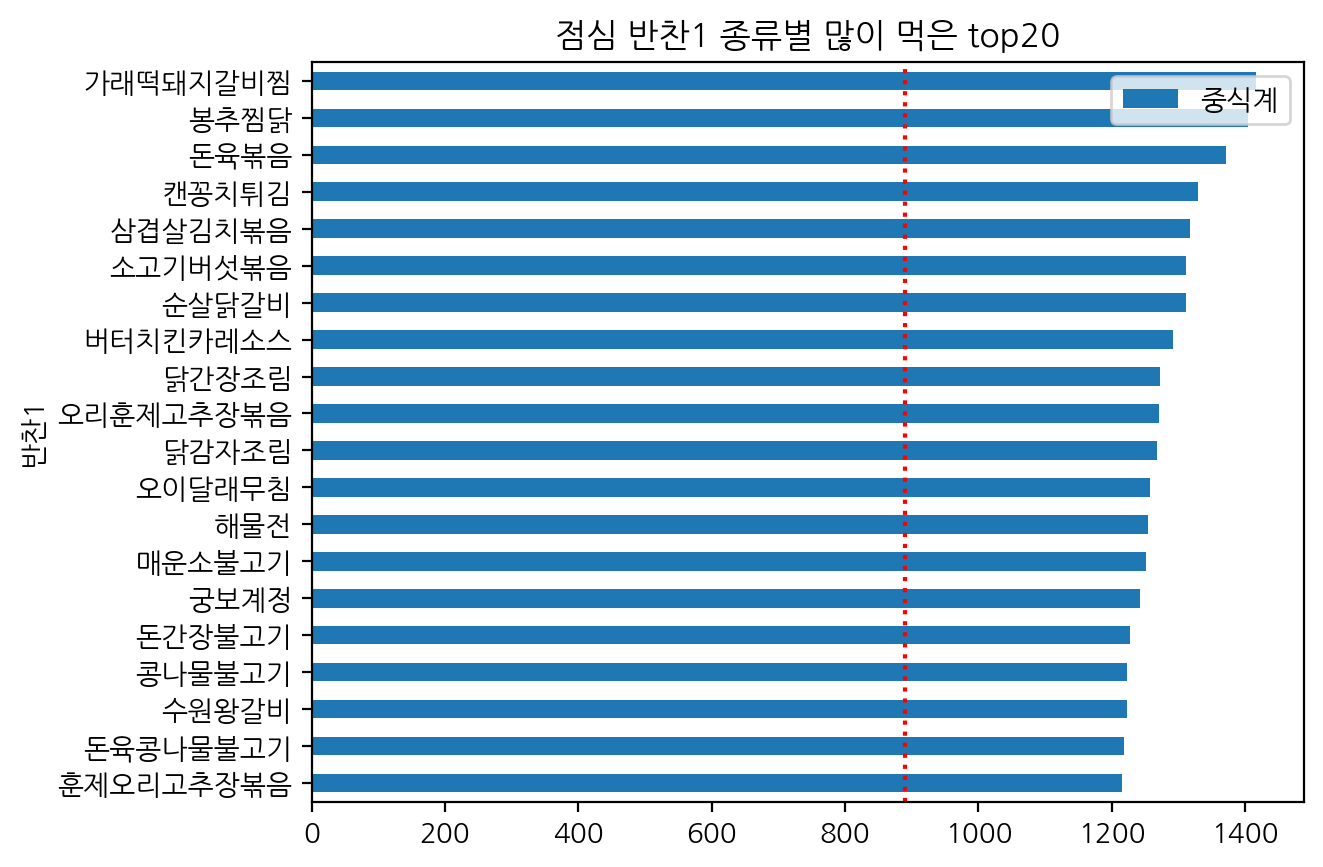

In [71]:
train.groupby('반찬1').agg({'중식계':'mean'}).nlargest(20, columns='중식계').sort_values(by='중식계').plot.barh()
plt.axvline(train['중식계'].mean(), c='red', ls=':')
plt.title("점심 반찬1 종류별 많이 먹은 top20")

In [72]:
train['반찬2'].unique()

array(['계란찜', '모둠소세지구이', '쫄면야채무침', '부추전', '우엉잡채', '도토리묵무침', '옥수수전',
       '연두부*양념장', '오징어숙회무침', '통도라지구이', '해초무침', '새송이버섯볶음', '호박꼬지&고사리&무나물',
       '버섯잡채', '맛탕', '새싹두부구이', '늙은호박전', '맛살계란말이', '새송이버섯조림', '메추리알조림',
       '모둠묵*양념장', '소세지구이', '홍어무침', '해물파전', '탕평채', '모둠양채쌈*쌈장', '골뱅이무침*소면',
       '두부계란부침', '파래김*양념장', '연근땅콩조림', '계란말이', '두부&김치볶음', '땅콩조림', '오징어초무침',
       '비엔나볶음', '해파리냉채', '새송이버섯전', '알감자버터구이', '동태전', '브로컬리맛살볶음',
       '모둠소시지구이', '두부조림', '무쌈', '열무나물', '양배추쌈', '도라지초무침', '콩나물잡채', '고기전',
       '청포묵무침', '연근조림', '김치전', '치즈계란말이', '동그랑땡부침', '고등어카레구이', '맛살겨자채',
       '온두부', '멸치크랜베리볶음', '꽃맛살볶음', '우엉조림', '비엔나감자볶음', '동그랑땡전', '명태조림',
       '잡채', '궁중떡볶이', '두부구이', '홍어채무침', '맛살콩나물냉채', '참치야채전', '쫄면무침',
       '명태엿장조림', '마늘쫑볶음', '골뱅이무침&소면', '실곤약초무침', '닭가슴살냉채', '두부새싹구이',
       '맛살겨자초무침', '돈육잡채', '감자볶음', '감자만두', '삼치구이', '춘권', '해파리겨자채', '감자채볶음',
       '마늘쫑무침', '닭살겨자냉채', '웨지감자오븐구이', '연근', '오꼬노미계란말이', '오징어브로컬리숙회',
       '매운어묵볶음', '고구마범벅', '비엔나피망볶음', '꽁치와사비구이', '모듬소시지볶음', '과일샐러드',
       '모둠

Text(0.5, 1.0, '점심 반찬2 많이 나온 top20')

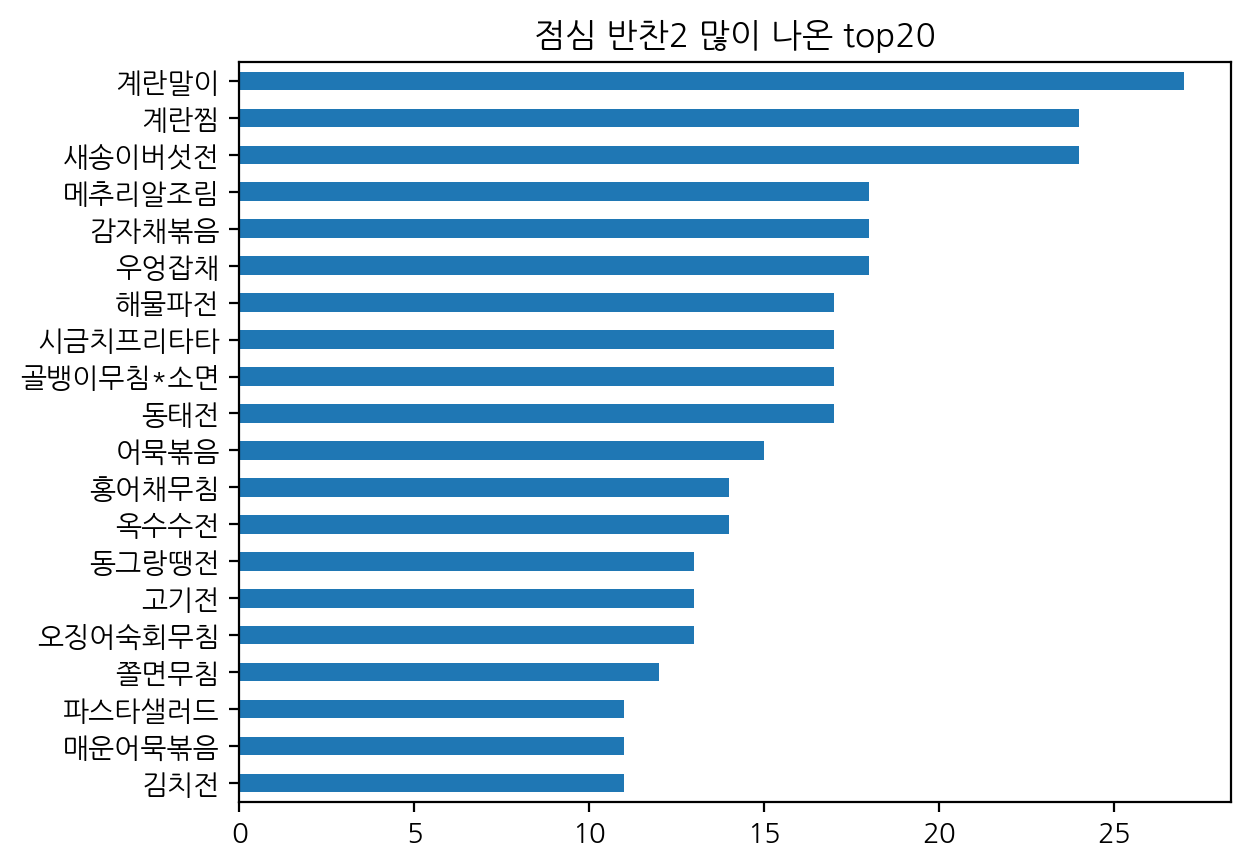

In [73]:
train['반찬2'].value_counts().nlargest(20).sort_values().plot.barh()
plt.title("점심 반찬2 많이 나온 top20")

Text(0.5, 1.0, '점심 반찬2 종류별 많이 먹은 top20')

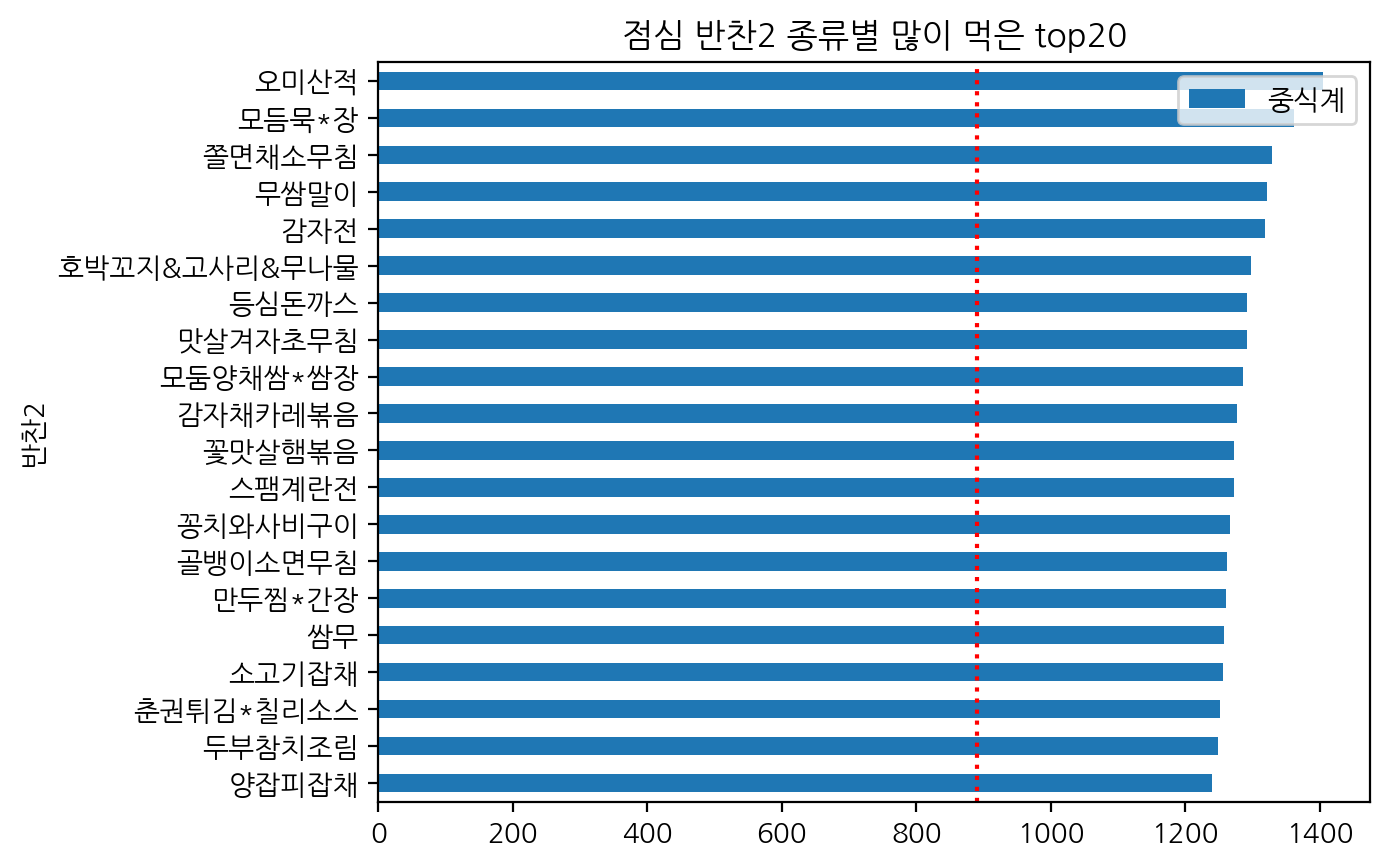

In [74]:
train.groupby('반찬2').agg({'중식계':'mean'}).nlargest(20, columns='중식계').sort_values(by='중식계').plot.barh()
plt.axvline(train['중식계'].mean(), c='red', ls=':')
plt.title("점심 반찬2 종류별 많이 먹은 top20")

## 저녁메뉴 변경해보기

* 저녁에는 자기계발의 날이 있음 !

In [75]:
train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...      출장비율  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  0.057670   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...  0.066513   

       야근비율  재택비율                                      lunch_menu   밥      국  \
0  0.099125   0.0       [쌀밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥  오징어찌개   
1  0.134146   0.0  [쌀밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]  쌀밥   김치찌개   

     반찬1      반찬2  종류  특별메뉴  
0   쇠불고기      계란찜  한식     0  
1  가자미튀김  모둠소세지구이  한식     0  

[2 rows x 28 columns]

### 저녁 메뉴 리스트 만들기

In [76]:
# 저녁메뉴 리스트 만들기
dinner_menu_list = []

for day in range(len(train)): # 각 행별로 가져오기
    tmp = train.loc[day, '석식메뉴'].split(' ') #띄어쓰기 별로 각각 리스트에 넣어주기
    
    for i in range(len(tmp)):
        if '/' in tmp[i]:  # '/' 처리되어 있는 거 앞에 꺼만 남기기
            tmp[i] = tmp[i].split('/')[0]
            
    for i in range(len(tmp)):
        if '(New)' in tmp[i]:  # 'New' 포함되어 있는 거 처리
            tmp[i] = tmp[i][5:]
#         elif 'New)' in tmp[i]:  # New)요거닭 처리
#             tmp[i] = tmp[i][4:]
            
    for menu in tmp:
        if '(' in menu:  # 괄호 메뉴 제거
            tmp.remove(menu)
        elif '<' in menu: # <초복특식> 제거
            tmp.remove(menu)
        tmp = ' '.join(tmp).split() # 공백 제거
        
    dinner_menu_list.append(tmp)

In [77]:
# 잘되었는지 데이터프레임 만들어서 확인
dinner_menu = pd.DataFrame(dinner_menu_list)
dinner_menu.head()

0       1        2        3        4     5     6     7
0        쌀밥     육개장  자반고등어구이     두부조림    건파래무침  포기김치  None  None
1  콩나물밥*양념장     어묵국      유산슬   아삭고추무침      바나나  포기김치  None  None
2        쌀밥   청국장찌개   황태양념구이      고기전  새송이버섯볶음  포기김치  None  None
3  미니김밥*겨자장      우동   멕시칸샐러드     군고구마      무피클  포기김치  None  None
4        쌀밥  차돌박이찌개      닭갈비  감자소세지볶음    콩나물무침  포기김치  None  None

In [78]:
# 이상한 값들 확인해보기
dinner_menu[dinner_menu[0].str.contains('밥|라이스|스파게티|필라프|빠에야')==False]

0       1          2          3         4      5     6     7
139        콩국수     작은밥         춘권      단호박조림     마늘쫑무침   열무김치  None  None
173    나가사키면&김   참치주먹밥     개성감자만두     꽃맛살샐러드        음료   포기김치  None  None
175     옛날왕돈까스   옥수수스프     샐러드파스타   감자치즈오븐구이      오이피클   포기김치  None  None
204          *    None       None       None      None   None  None  None
224          *    None       None       None      None   None  None  None
244          *    None       None       None      None   None  None  None
262          *    None       None       None      None   None  None  None
281          *    None       None       None      None   None  None  None
300     나가사끼짬뽕   야채볶음밥  치킨핑거*요거트D       또띠아칩       단무지   포기김치  None  None
306          *    None       None       None      None   None  None  None
327     자기계발의날    None       None       None      None   None  None  None
345        콩국수     작은밥      탄두리치킨     모둠묵샐러드        수박  배추겉절이  None  None
346   *자기계발의날*    None       None       None      None   None  None  None
366       가정의날    None       None       None      None   None  None  None
392          *    None       None       None      None   None  None  None
412          *    None       None       None      None   None  None  None
424          *    None       None       None      None   None  None  None
449          *    None       None       None      None   None  None  None
468          *    None       None       None      None   None  None  None
492          *    None       None       None      None   None  None  None
506    (쌀:국내산)    김치우동      오징어튀김     또띠아견과칩       바나나   포기김치  None  None
510          *    None       None       None      None   None  None  None
529          *    None       None       None      None   None  None  None
586          *    None       None       None      None   None  None  None
589          *    None       None       None      None   None  None  None
633          *    None       None       None      None   None  None  None
667     자기계발의날    None       None       None      None   None  None  None
687          *    None       None       None      None   None  None  None
706     자기계발의날    None       None       None      None   None  None  None
730     자기개발의날    None       None       None      None   None  None  None
747          *  자기계발의날          *       None      None   None  None  None
766          *  자기개발의날          *       None      None   None  None  None
780    (쌀:국내산)    크림스프      미니햄버거       감자튀김      오이피클   포기김치  None  None
786          *  자기계발의날          *       None      None   None  None  None
809          *  자기개발의날          *       None      None   None  None  None
828          *  자기개발의날          *       None      None   None  None  None
853     자기계발의날    None       None       None      None   None  None  None
872          *    None       None       None      None   None  None  None
890          *    None       None       None      None   None  None  None
912          *    None       None       None      None   None  None  None
932          *    None       None       None      None   None  None  None
936        짜장면     계란국      미니햄버거      고구마맛탕     오복지무침   포기김치  None  None
955          *    None       None       None      None   None  None  None
973     자기개발의날    None       None       None      None   None  None  None
993     자기개발의날    None       None       None      None   None  None  None
994        짜장면     계란국     사천식탕수육     개성감자만두       단무지   포기김치  None  None
1086    우육비빔냉면     추가밥       사골파국        도넛츠      숙주나물    석박지  None  None
1088  타워함박스테이크    크림스프  알리오올리오파스타  샐러드*오리엔탈D  도라지오이초무침   포기김치  None  None
1126      채소라면      김밥    가래떡오븐구이     꽃맛살샐러드       단무지   포기김치  None  None
1162   꼬치어묵매운탕  떡갈비주먹밥     채소볶음우동       콘샐러드     단무지무침   포기김치  None  None
1166       ＜자기     계발의         날＞       None      None   None  None  None
1170      마파두부   홍합짬뽕국     샤워크림새우     물만두찜*장     짜사이볶음    백김치  None  None
1189    팟시금치무쌉   미니쌀국수    춘권*칠리소스      계란후라이   양배추비트피클    무생채  None  None
1195    알리오올리오   

In [79]:
# 109, 204, 415, 625, 898
dinner_menu.iloc[415]

0         쌀밥
1      순두부찌개
2    소고기숙주볶음
3    비엔나감자구이
4      청경채무침
5       포기김치
6       None
7       None
Name: 415, dtype: object

### 저녁메뉴 파생변수 만들기

In [80]:
# 원본 데이터프레임에 리스트 통째로 파생변수 만들기
train['dinner_menu'] = dinner_menu_list
train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...      야근비율  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  0.099125   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...  0.134146   

   재택비율                                      lunch_menu   밥      국    반찬1  \
0   0.0       [쌀밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]  쌀밥  오징어찌개   쇠불고기   
1   0.0  [쌀밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]  쌀밥   김치찌개  가자미튀김   

       반찬2  종류  특별메뉴                              dinner_menu  
0      계란찜  한식     0    [쌀밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]  
1  모둠소세지구이  한식     0  [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]  

[2 rows x 29 columns]

### 밥, 국, 반찬1, 반찬2 파생변수 만들기

In [81]:
# 밥, 국, 반찬1, 반찬2까지 나누자
# 메인3부터는 위치가 달라짐. . . .(3이 있는 것도 있고, 없는 것도 있어서 !)
# 저녁에는 가정의 날이 있어서 그 관련된 문자열 처리 중요 !

d_rice = []
d_soup = []
d_side1 = []
d_side2 = []

for word in dinner_menu_list:
    
    if not word:  # None인 곳 변경
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '*' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
    
    elif '＜자기' in word: # 1166행의 <자기 / 계발의 / 날> 처리 
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
    
    elif '가정의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '가정의달' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '자기계발의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '*자기계발의날*' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')
        
    elif '자기개발의날' in word:
        d_rice.append('None')
        d_soup.append('None')
        d_side1.append('None')
        d_side2.append('None')

    else:
        d_rice.append(word[0])
        d_soup.append(word[1])
        d_side1.append(word[2])
        d_side2.append(word[3])

In [82]:
#잘 들어왔는지 확인
print(len(dinner_menu_list))
print(len(d_rice))
print(len(d_soup))
print(len(d_side1))
print(len(d_side2))

1205
1205
1205
1205
1205


In [83]:
# 원본 train 파일에 합치기
train["d_밥"] = d_rice
train["d_국"] = d_soup
train["d_반찬1"] = d_side1
train["d_반찬2"] = d_side2

train.head(2)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
0 2016-02-01   0  2601    50   150  238       0   
1 2016-02-02   1  2601    50   173  319       0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴   중식계  ...      국    반찬1  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  ...  오징어찌개   쇠불고기   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  ...   김치찌개  가자미튀김   

       반찬2  종류 특별메뉴                              dinner_menu       d_밥  d_국  \
0      계란찜  한식    0    [쌀밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]        쌀밥  육개장   
1  모둠소세지구이  한식    0  [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]  콩나물밥*양념장  어묵국   

     d_반찬1   d_반찬2  
0  자반고등어구이    두부조림  
1      유산슬  아삭고추무침  

[2 rows x 33 columns]

### 이상한 값들 처리하기

In [84]:
# 잘못 들어가 있는 행 처리
train[train['d_밥'] == '(쌀:국내산)']

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
506 2018-02-22   3  2707    82   277  400       0   
780 2019-04-16   1  2822    54   234  552       0   

                                                  중식메뉴  \
506  쌀밥/잡곡밥 (쌀:국내산) 콩나물국  마늘치킨  모둠묵*양념장  미역줄기볶음  포기...   
780  쌀밥/잡곡밥 (쌀:국내산) 열무된장국  닭볶음탕 (닭:국내산) 우엉잡채  고구마순나...   

                                                  석식메뉴  중식계  ...      국   반찬1  \
506  볶음밥(김밥재료) (쌀:국내산) 김치우동  오징어튀김  또띠아견과칩  바나나/오복지...  988  ...   콩나물국  마늘치킨   
780  토마토스파게티(작은밥) (쌀:국내산) 크림스프  미니햄버거  감자튀김  오이피클/음...  905  ...  열무된장국  닭볶음탕   

         반찬2  종류 특별메뉴                                dinner_menu      d_밥  \
506  모둠묵*양념장  한식    0  [(쌀:국내산), 김치우동, 오징어튀김, 또띠아견과칩, 바나나, 포기김치]  (쌀:국내산)   
780     우엉잡채  한식    0   [(쌀:국내산), 크림스프, 미니햄버거, 감자튀김, 오이피클, 포기김치]  (쌀:국내산)   

      d_국  d_반찬1   d_반찬2  
506  김치우동  오징어튀김  또띠아견과칩  
780  크림스프  미니햄버거    감자튀김  

[2 rows x 33 columns]

In [85]:
# 밥류에 괄호 들어가는 행 괄호 삭제 변경해주기
print(train['석식메뉴'].iloc[506])
print(train['석식메뉴'].iloc[780])

볶음밥(김밥재료) (쌀:국내산) 김치우동  오징어튀김  또띠아견과칩  바나나/오복지  포기김치 (김치:국내산) 
토마토스파게티(작은밥) (쌀:국내산) 크림스프  미니햄버거  감자튀김  오이피클/음료  포기김치 (김치:국내산) 


In [86]:
# import warnings
# warnings.filterwarnings('ignore')

train['d_밥'].iloc[506] = '볶음밥'
train['d_밥'].iloc[780] = '토마토스파게티'

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_2766/812519619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['d_밥'].iloc[506] = '볶음밥'
/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_2766/812519619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['d_밥'].iloc[780] = '토마토스파게티'


### 종류별로 분류하기

In [87]:
# 메뉴확인
dinner_menu[(dinner_menu[0].str.contains('연복풍|짜장|제육|마파두부|새우|돈육|볶음밥')==True)].head()
#             &(dinner_menu[1].str.contains('짬뽕|유부|찌개|탕|장')==False)
#             &(dinner_menu[2].str.contains('까스|돈가스|카레|데리야끼')==True)]
# '유린기|류산슬|유산슬|깐풍|탕수|까스|돈가스|카레|고추잡채|탕수어|동파|데리야끼|까스'

0      1       2       3        4     5     6     7
9   볶음밥*자장소스    맑은국   새우또띠아   쨔샤이무침      요플레  포기김치  None  None
24       볶음밥     짬뽕  개성감자만두    타코야끼    꼬들단무지  포기김치  None  None
27    짜장잡채덮밥   계란파국   참치야채전  꽃맛살샐러드     오이무침  포기김치  None  None
32  굴소스파인볶음밥  가쯔오장국  찹쌀순대볶음    궁중떡찜  두반장가지나물  포기김치  None  None
37      햄볶음밥   유부장국  돈육씨앗강정    해초무침      깨찰빵  포기김치  None  None

In [88]:
train.loc[(train['d_밥'].str.contains('쌀밥|비빔밥|곤드레밥|영양밥|오곡밥|콩나물밥|흑미밥|주먹밥|김밥|작은밥|매운탕|쌈밥|라면')==True)
          &(train['d_국'].str.contains('찌개|탕|장|국|물냉면|수제비|물김치|김밥|라면|주먹밥')==True)
          &(train['d_국'].str.contains('짬뽕')==False)
          &(train['d_반찬1'].str.contains('유린기|류산슬|유산슬|깐풍|탕수|카레|고추잡채|동파|데리야끼|까스')==False),
          'd_종류'] = '한식'

train.loc[(train['d_밥'].str.contains('카레|참치|불고기|오므라이스|치킨마요|규동|쇠고기덮밥|나가사키|나가사끼짬뽕|유부초밥')==True)
          |(train['d_국'].str.contains('우동|국수|나가사끼|카레|메밀소바')==True)
          |(train['d_반찬1'].str.contains('까스|카레|데리야끼')==True),
          'd_종류'] = '일식'

train.loc[(train['d_밥'].str.contains('연복풍|짜장|제육|마파두부|새우|돈육|볶음밥|콩국수|볶음덮밥|낙지덮밥|잡채밥|유산슬|우육비빔냉면')==True)
          |(train['d_국'].str.contains('짬뽕')==True)
          |(train['d_반찬1'].str.contains('유린기|류산슬|유산슬|깐풍|탕수|고추잡채|탕수어|동파|짜장')==True),
                 'd_종류'] = '중식'

train.loc[(train['d_밥'].str.contains('필라프|미트볼|빠에야|스파게티')==True)
          |(train['d_국'].str.contains('함박|스프|스파게티|파스타|돈까스|돈가스')==True)
          |(train['d_반찬1'].str.contains('멕시칸|스테이크')==True),
                 'd_종류'] = '양식'

train.loc[train["d_종류"].isna(),'d_종류'] = '없음'
train.sample(10)

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
328  2017-06-01   3  2648    66   265  317       0   
1081 2020-07-21   1  2997   138   222  519     129   
987  2020-02-18   1  2872    47   239  666       0   
1169 2020-11-30   0  3021   253   148  798     345   
948  2019-12-19   3  3111   165   270  591       0   
815  2019-06-07   4  2758   890   219    3       0   
1147 2020-10-29   3  3008   131   298  418     137   
348  2017-06-30   4  2648   188   296   34       0   
826  2019-06-24   0  2758   101   213  692       0   
116  2016-07-22   4  2643   251   272   47       0   

                                                   중식메뉴  \
328   쌀밥/잡곡밥 (쌀:국내산) 오이냉국  등갈비김치찜  어묵볶음  참나물땅콩무침  깍두...   
1081  쌀밥/치자밥/찰현미밥 닭개장 양장피 꽃맛살샐러드 브로콜리숙회*초장 포기김치 그린샐러...   
987   쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 차돌된장찌개 (차돌박이:미국산) 주꾸미볶음 (...   
1169  쌀밥/흑미밥/찰현미밥 굴미역국 닭간장조림 스팸계란전 쑥갓나물 포기김치/붕어빵 눈꽃치...   
948   쌀밥/잡곡밥 (쌀:국내산) 된장찌개  대패삼겹*파채  해물콩나물찜  연두부*장  포...   
815   쌀밥/잡곡밥 (쌀:국내산) 고추장찌개  언양식불고기  버섯잡채  오이무침  포기김치...   
1147  쌀밥/차조밥/찰현미밥 (New)고구마순등뼈탕 깐풍기 감자채볶음 도토리묵*양념장 겉절...   
348   쌀밥/잡곡밥 (쌀:국내산) 꼬지어묵탕  매운닭찜  감자채전  미역줄기볶음  열무김치...   
826   쌀밥/잡곡밥 (쌀:국내산) 어묵국  소불고기 (소고기:호주산) 옥수수계란찜  가지나...   
116   참치회덮밥 (쌀:국내산) 미소장국  고구마치즈구이  춘권  토마토/락교  포기김치 ...   

                                                   석식메뉴   중식계  ...      반찬1  \
328   주먹밥 (쌀:국내산) 단호박스프  로제스파게티  샐러드/피클  마늘빵/음료  포기김...   914  ...   등갈비김치찜   
1081          흑미밥 부대찌개 생선까스*타르타르소스 감자채파프리카볶음 고춧잎무침 깍두기    861  ...      양장피   
987   통새우김밥 (쌀:국내산) 우동  계란떡볶이  키위드레싱샐러드  수제피클  포기김치 ...   939  ...    주꾸미볶음   
1169   흑미밥 동태탕 (New)아롱사태샐러드*들깨소스 감자채파프리카볶음 세발나물무침 포기김치   1273  ...    닭간장조림   
948   쌀밥/잡곡밥 (쌀:국내산) 설렁탕  해물전  오징어젓무침  야채스틱/과일  석박지 ...   862  ...  대패삼겹*파채   
815   쌀밥/잡곡밥 (쌀:국내산) 두부김치국  닭강정 (닭:국내산) 새송이버섯전  호박나물...   389  ...   언양식불고기   
1147                  김주먹밥 잔치국수 쇠고기육전 콩나물무침 양념고추지 열무김치    667  ...      깐풍기   
348   쌀밥/잡곡밥 (쌀:국내산) 청국장찌개  장어강정  오꼬노미야끼계란말이  치커리무침 ...   695  ...     매운닭찜   
826   쌀밥/잡곡밥 (쌀:국내산) 소고기매운무국  오징어굴소스볶음  모둠버섯구이  오이무침...  1105  ...     소불고기   
116   쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개  깐풍기  옥수수전  콩나물무침  열무김치 ...   661  ...  고구마치즈구이   

         반찬2  종류  특별메뉴                                        dinner_menu  \
328     어묵볶음  한식     0               [주먹밥, 단호박스프, 로제스파게티, 샐러드, 마늘빵, 포기김치]   
1081  꽃맛살샐러드  한식     0    [흑미밥, 부대찌개, 생선까스*타르타르소스, 감자채파프리카볶음, 고춧잎무침, 깍두기]   
987      고기전  한식     0           [통새우김밥, 우동, 계란떡볶이, 키위드레싱샐러드, 수제피클, 포기김치]   
1169   스팸계란전  한식     0  [흑미밥, 동태탕, 아롱사태샐러드*들깨소스, 감자채파프리카볶음, 세발나물무침, 포기김치]   
948   해물콩나물찜  한식     0                  [쌀밥, 설렁탕, 해물전, 오징어젓무침, 야채스틱, 석박지]   
815     버섯잡채  한식     0                [쌀밥, 두부김치국, 닭강정, 새송이버섯전, 호박나물, 깍두기]   
1147   감자채볶음  중식     0            [김주먹밥, 잔치국수, 쇠고기육전, 콩나물무침, 양념고추지, 열무김치]   
348     감자채전  한식     0         [쌀밥, 청국장찌개, 장어강정, 오꼬노미야끼계란말이, 치커리무침, 포기김치]   
826   옥수수계란찜  한식     0        [쌀밥, 소고기매운무국, 오징어굴소스볶음, 모둠버섯구이, 오이무침, 포기김치]   
116       춘권  일식     1               [쌀밥, 돈육김치찌개, 깐풍기, 옥수수전, 콩나물무침, 열무김치]   

        d_밥      d_국         d_반찬1       d_반찬2  d_종류  
328     주먹밥    단호박스프        로제스파게티         샐러드    양식  
1081    흑미밥     부대찌개   생선까스*타르타르소스   감자채파프리카볶음    일식  
987   통새우김밥       우동         계란떡볶이    키위드레싱샐러드    중식  
1169    흑미밥      동태탕  아롱사태샐러드*들깨소스   감자채파프리카볶음    한식  
948      쌀밥      설렁탕           해물전      오징어젓무침    한식  
815      쌀밥    두부김치국           닭강정      새송이버섯전    한식  
1147   김주먹밥     잔치국수         쇠고기육전       콩나물무침    일식  
348      쌀밥    청국장찌개          장어강정  오꼬노미야끼계란말이    한식  
826      쌀밥  소고기매운무국      오징어굴소스볶음      모둠버섯구이    한식  
116      쌀밥   돈육김치찌개           깐풍기        옥수수전    중식  

[10 rows x 34 columns]

### train 저녁 메뉴 데이터프레임 새로 만들기
* 자기계발의 날 제외시키기 위해

In [89]:
train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수', '중식메뉴', '석식메뉴',
       '중식계', '석식계', '연', '월', '일', 'YM', '요일명', '식사가능인원', '휴가비율', '출장비율',
       '야근비율', '재택비율', 'lunch_menu', '밥', '국', '반찬1', '반찬2', '종류', '특별메뉴',
       'dinner_menu', 'd_밥', 'd_국', 'd_반찬1', 'd_반찬2', 'd_종류'],
      dtype='object')

In [90]:
dinner_menu = train[['일자','연','월', '요일', '정원수', '식사가능인원','휴가비율', '출장비율', '야근비율', '재택비율', 
                     '휴가자수', '출장자수', '야근수', '재택근무자수','석식계',
                     'dinner_menu', 'd_밥', 'd_국', 'd_반찬1', 'd_반찬2', 'd_종류']]

In [91]:
dinner_menu.rename(columns = {'d_밥' : '밥', 'd_국' : '국', 
                              'd_반찬1' : '반찬1', 'd_반찬2' :  '반찬2', 'd_종류' :  '종류'}, inplace=True)
dinner_menu.head()

/var/folders/kd/wh5__hs12zb40t3r3stb8yhr0000gn/T/ipykernel_2766/3052125207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dinner_menu.rename(columns = {'d_밥' : '밥', 'd_국' : '국',


일자     연  월  요일   정원수  식사가능인원      휴가비율      출장비율      야근비율  재택비율  \
0 2016-02-01  2016  2   0  2601    2401  0.019223  0.057670  0.099125   0.0   
1 2016-02-02  2016  2   1  2601    2378  0.019223  0.066513  0.134146   0.0   
2 2016-02-03  2016  2   2  2601    2365  0.021530  0.069204  0.046934   0.0   
3 2016-02-04  2016  2   3  2601    2277  0.039985  0.084583  0.155907   0.0   
4 2016-02-05  2016  2   4  2601    2142  0.106882  0.069589  0.015873   0.0   

   ...  출장자수  야근수  재택근무자수  석식계                              dinner_menu  \
0  ...   150  238       0  331    [쌀밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]   
1  ...   173  319       0  560  [콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]   
2  ...   180  111       0  573  [쌀밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]   
3  ...   220  355       0  525  [미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]   
4  ...   181   34       0  330  [쌀밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]   

          밥       국      반찬1      반찬2  종류  
0        쌀밥     육개장  자반고등어구이     두부조림  한식  
1  콩나물밥*양념장     어묵국      유산슬   아삭고추무침  중식  
2        쌀밥   청국장찌개   황태양념구이      고기전  한식  
3  미니김밥*겨자장      우동   멕시칸샐러드     군고구마  양식  
4        쌀밥  차돌박이찌개      닭갈비  감자소세지볶음  한식  

[5 rows x 21 columns]

In [92]:
dinner_menu[dinner_menu['석식계']==0.0][["석식계","dinner_menu"]]

석식계                            dinner_menu
204     0                                    [*]
224     0                                    [*]
244     0                                    [*]
262     0                                    [*]
281     0                                    [*]
306     0                                    [*]
327     0                               [자기계발의날]
346     0                             [*자기계발의날*]
366     0                                 [가정의날]
392     0                                    [*]
410     0   [쌀밥, 된장찌개, 미니함박조림, 계란말이, 비름나물, 포기김치]
412     0                                    [*]
424     0                                    [*]
449     0                                    [*]
468     0                                    [*]
492     0                                    [*]
502     0  [쌀밥, 쇠고기무국, 고추잡채*꽃빵, 계란찜, 오이무침, 포기김치]
510     0                                    [*]
529     0                                    [*]
549     0                                     []
571     0                                     []
589     0                                    [*]
609     0                                     []
633     0                                    [*]
648     0                                     []
667     0                               [자기계발의날]
687     0                                    [*]
706     0                               [자기계발의날]
730     0                               [자기개발의날]
747     0                         [*, 자기계발의날, *]
766     0                         [*, 자기개발의날, *]
786     0                         [*, 자기계발의날, *]
809     0                         [*, 자기개발의날, *]
828     0                         [*, 자기개발의날, *]
853     0                               [자기계발의날]
872     0                                    [*]
890     0                                    [*]
912     0                                    [*]
932     0                                    [*]
955     0                                    [*]
973     0                               [자기개발의날]
993     0                               [자기개발의날]
1166    0                         [＜자기, 계발의, 날＞]

In [93]:
# 자기계발의 날, 석식계=0, 메뉴없음 삭제
dinner_menu=dinner_menu.drop(dinner_menu[dinner_menu['밥']=='None'].index, axis=0)
dinner_menu=dinner_menu.drop(dinner_menu[dinner_menu['석식계']==0.0].index, axis=0)

In [94]:
len(dinner_menu)

1161

### 특별메뉴 파생변수 만들기

In [95]:
# 특식 컬럼 만들기 - 원본프레임에
special = []

for day in train['d_밥']:
    if day == '쌀밥':
        special.append(0)
    else: special.append(1)
    
train["d_특별메뉴"] = special

In [96]:
# 특식 컬럼 만들기 - dinner_menu 프레임에
special = []

for day in dinner_menu['밥']:
    if day == '쌀밥':
        special.append(0)
    else: special.append(1)
    
dinner_menu["특별메뉴"] = special

Text(0.5, 1.0, '특별메뉴가 나온 날과 아닌 날의 석식계')

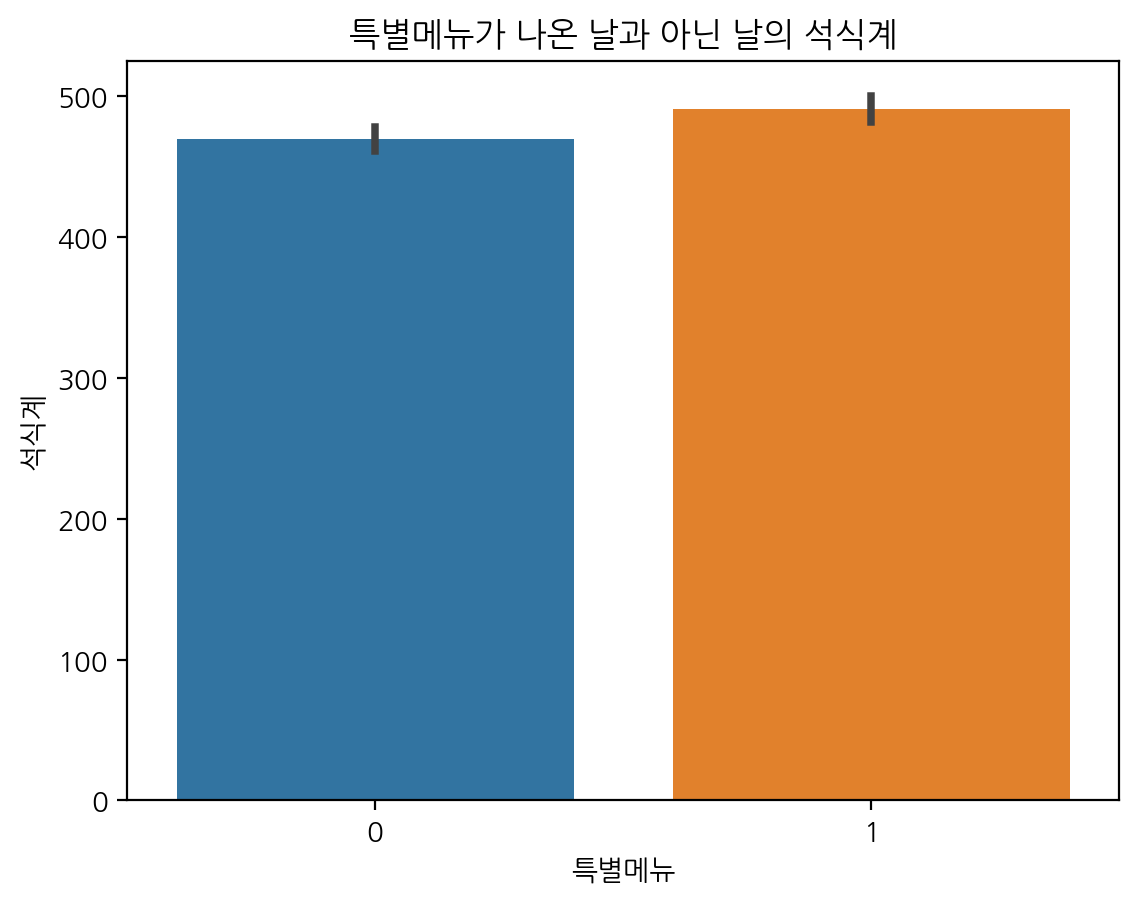

In [97]:
sns.barplot(data=dinner_menu, x="특별메뉴", y="석식계")
plt.title("특별메뉴가 나온 날과 아닌 날의 석식계")

## 저녁 메뉴 관련 시각화

In [98]:
dinner_menu["종류"].value_counts()

한식    611
중식    263
일식    216
양식     71
Name: 종류, dtype: int64

Text(0.5, 1.0, '메뉴 종류별 석식계')

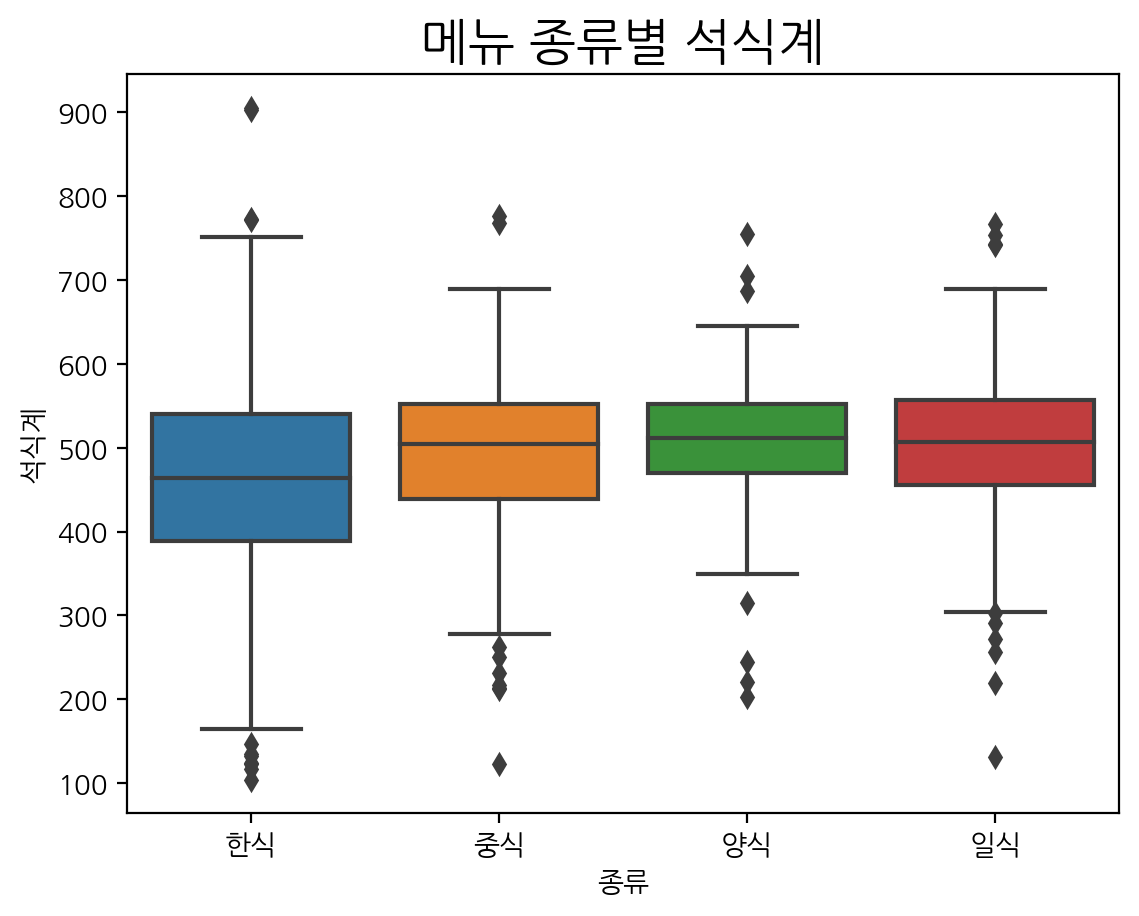

In [99]:
sns.boxplot(data=dinner_menu, x='종류', y='석식계')
plt.title("메뉴 종류별 석식계", fontsize=18)

### 식사 종류별 시각화

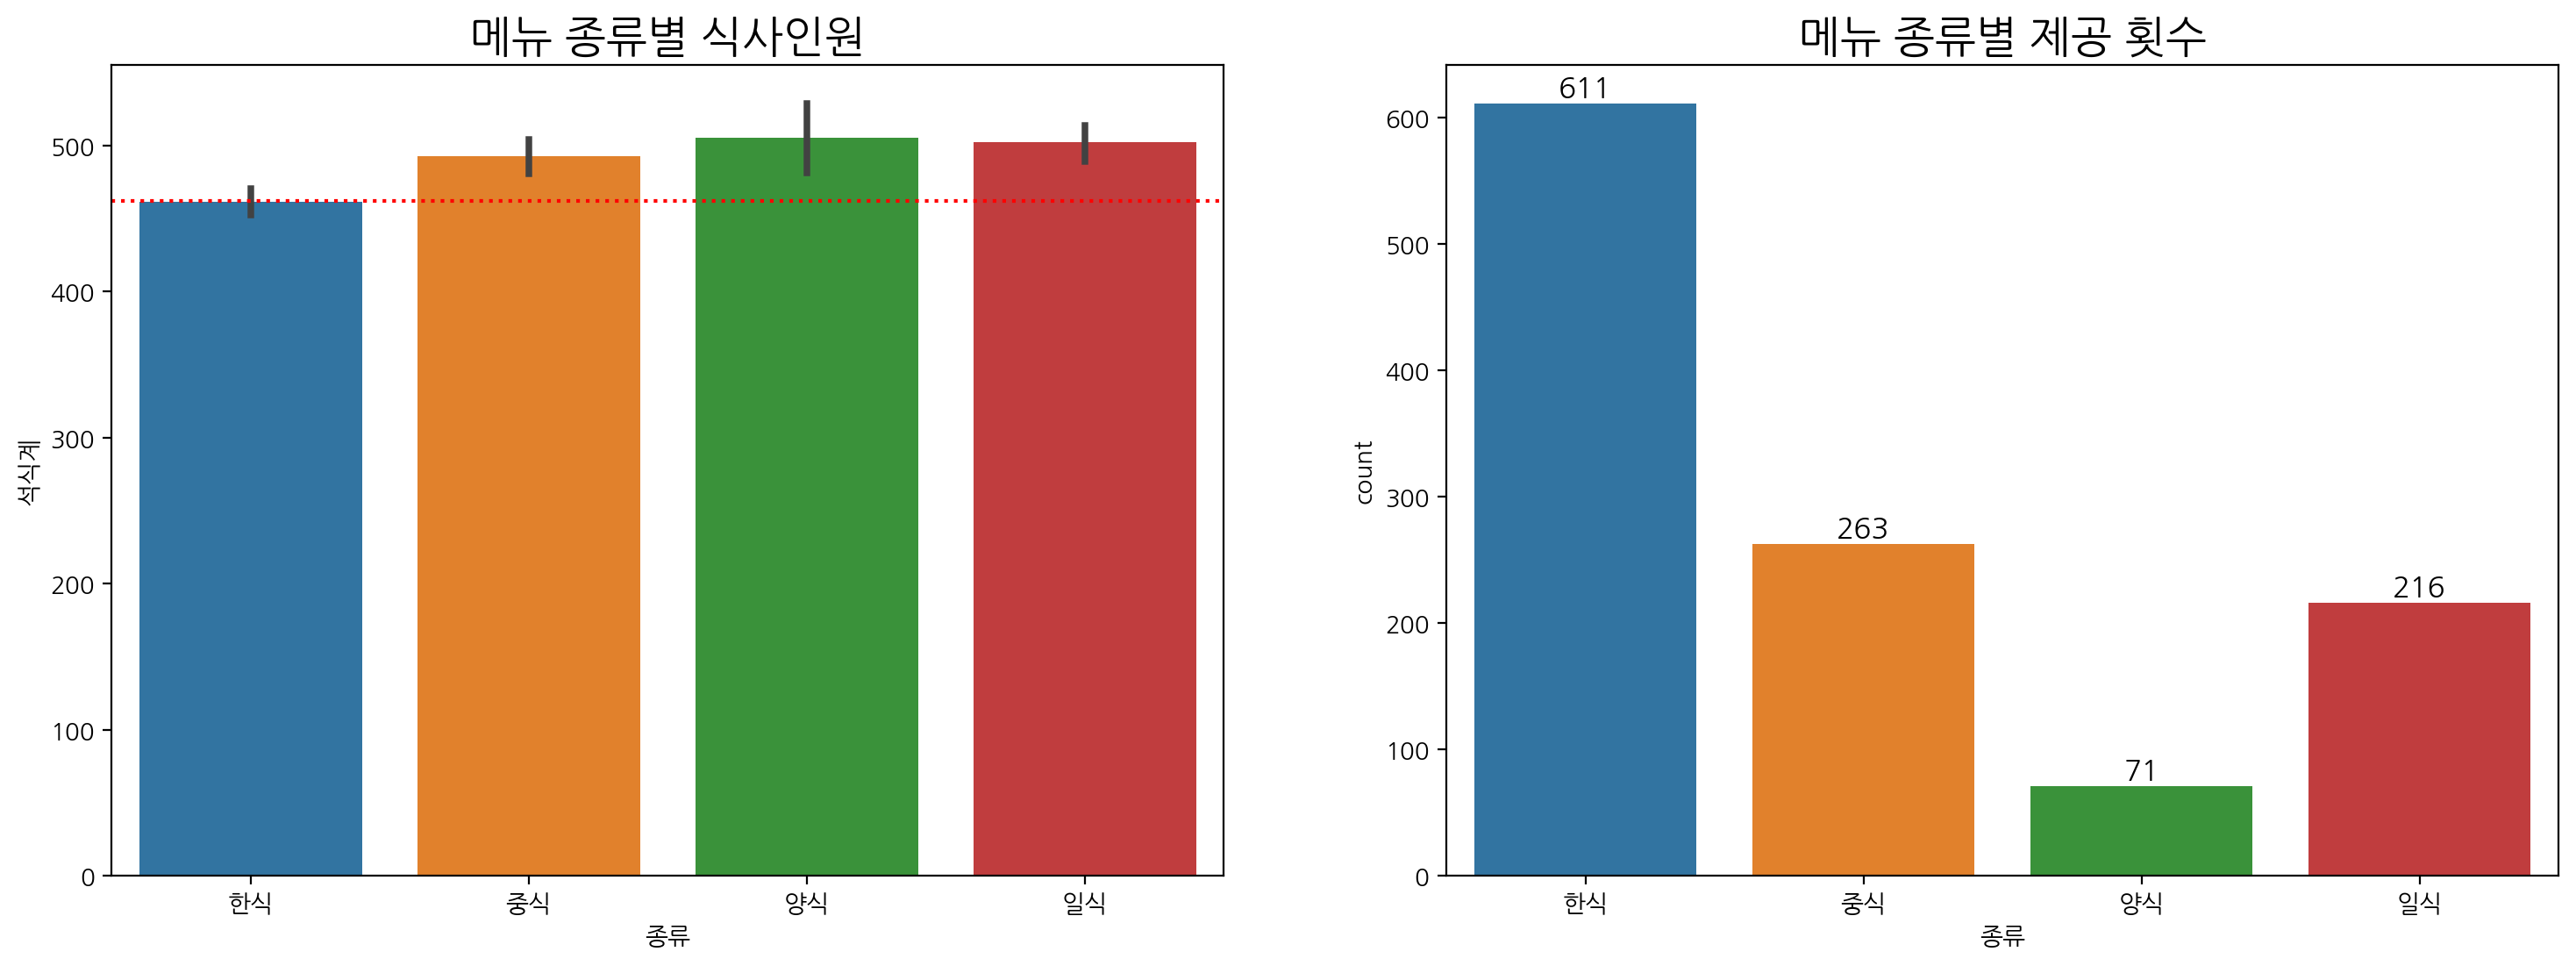

In [100]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

sns.barplot(data=dinner_menu, x='종류', y='석식계', ax=ax[0])
ax[0].set_title("메뉴 종류별 식사인원", fontsize=18)
ax[0].axhline(train['석식계'].mean(), c='red', ls=':')
sns.countplot(data=dinner_menu, x='종류', ax=ax[1])
ax[1].set_title("메뉴 종류별 제공 횟수", fontsize=18)
    
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height+5, height, ha = 'center', size = 12)

Text(0.5, 1.0, '가장 많이 먹는 메뉴 종류')

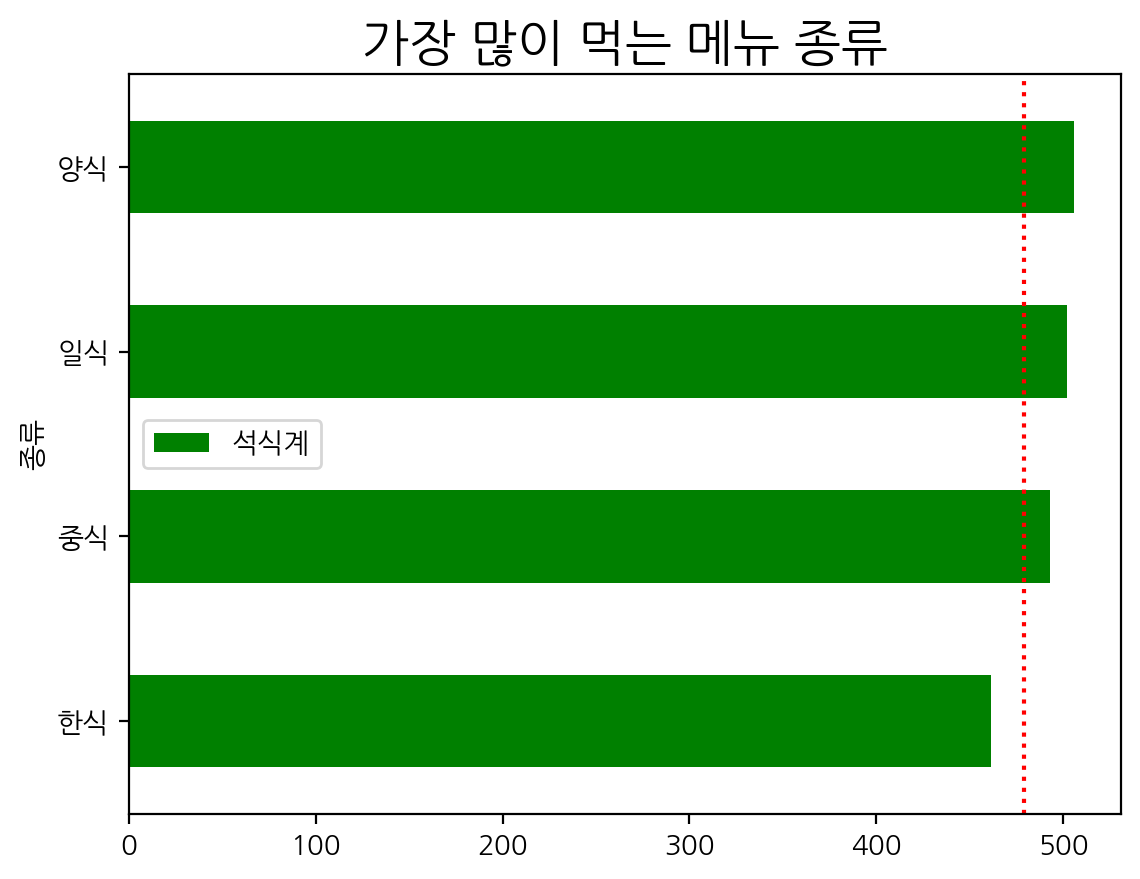

In [101]:
dinner_menu.groupby('종류').agg({'석식계':'mean'}).sort_values(by='석식계').plot.barh(color='g')
plt.axvline(dinner_menu['석식계'].mean(), c='red', ls=':')
plt.title("가장 많이 먹는 메뉴 종류", fontsize=18)

Text(0.5, 1.0, '가장 많이 나온 메뉴 종류')

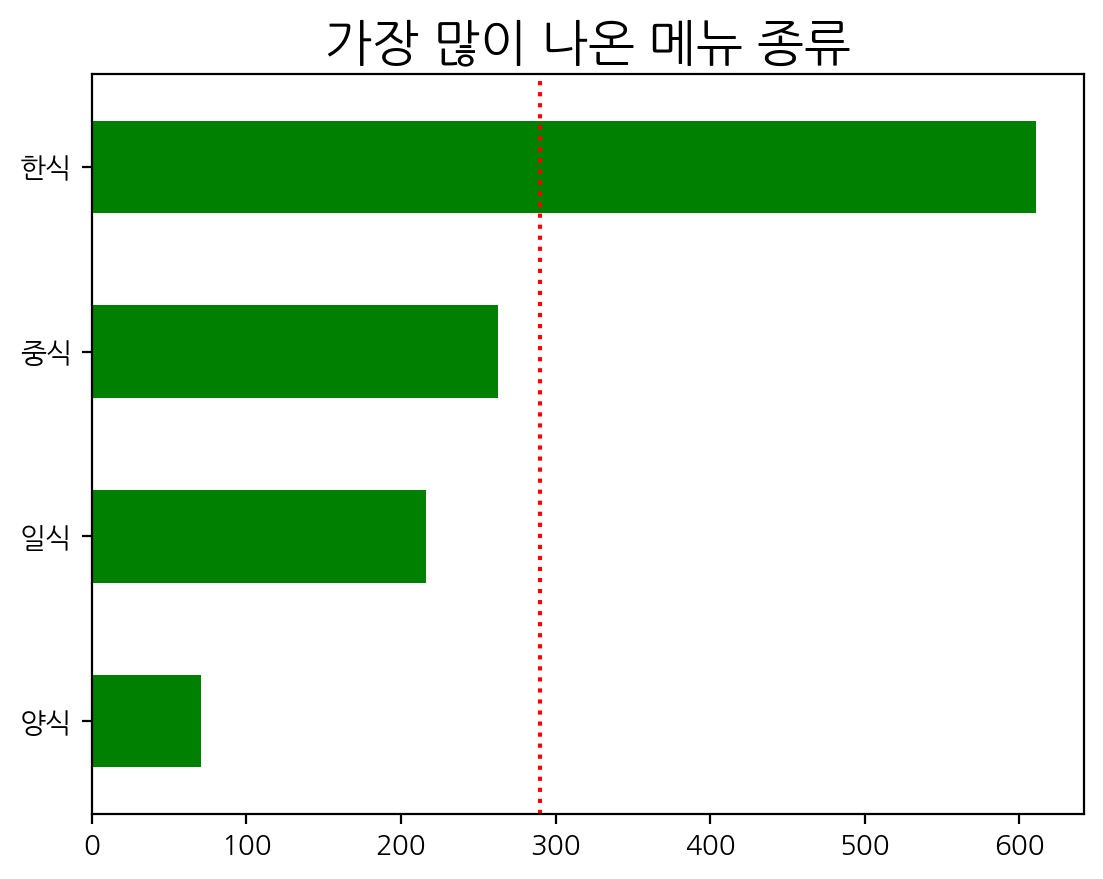

In [102]:
dinner_menu['종류'].value_counts().sort_values(ascending=True).plot.barh(color='g')
plt.axvline(dinner_menu['종류'].value_counts().mean(), c='r', ls=':')
plt.title("가장 많이 나온 메뉴 종류", fontsize=18)

### 밥, 국, 반찬1, 반찬2별 많이 나온 메뉴, 많이 먹은 메뉴

In [103]:
dinner_menu['밥'].unique()

array(['쌀밥', '콩나물밥*양념장', '미니김밥*겨자장', '참치회덮밥', '볶음밥*자장소스', '김밥', '멸치주먹밥',
       '카레덮밥', '볶음밥', '짜장잡채덮밥', '토마토스파게티', '굴소스파인볶음밥', '햄볶음밥', '주먹밥',
       '김치볶음밥', '치킨마요덮밥', '비빔밥', '낙지비빔밥', '오므라이스', '짜장덮밥', '참치주먹밥',
       '돈까스김밥', '유부초밥', '새우살볶음밥', '짜장잡채밥', '날치알볶음밥', '충무김밥', '작은밥',
       '콩나물밥', '카레라이스', '김밥볶음밥', '콩국수', '굴소스해물볶음밥', '쇠고기숙주규동덮밥', '통새우김밥',
       '나가사키면&김', '옛날왕돈까스', '낙지볶음덮밥', '생선초밥', '후난식볶음밥', '해물굴소스볶음밥',
       '마파두부덮밥', '김치참치주먹밥', '쇠고기덮밥', '날치알김치볶음밥', '참치야채비빔밥', '베이컨김치볶음밥',
       '해물볶음밥', '나가사끼짬뽕', '닭갈비볶음밥', '야채볶음밥', '꼬마김밥*겨자장', '소고기주먹밥', '빠에야',
       '목살필라프', '김치주먹밥', '산채비빔밥', '낙지덮밥', '볶음밥*짜장소스', '볶음밥&짜장소스',
       '하와이안필라프', '야채주먹밥', '곤드레밥*강된장', '투움바스파게티', '짜장밥', '새우볶음밥',
       '잡채밥&짜장소스', '파인애플볶음밥', '삼겹살볶음밥', '잡채밥', '베이컨볶음밥', '중국식볶음밥',
       '제육김치덮밥', '김치필라프', '참치덮밥', '짜장면', '참치마요덮밥', '굴소스볶음밥', '쇠고기볶음밥',
       '스팸주먹밥', '유산슬덮밥', '버섯영양밥*우렁양념장', '찹쌀밥', '마늘베이컨볶음밥', '스팸볶음밥',
       '불고기필라프', '땡초주먹밥', '부채살오므라이스', '계란김밥', '삼겹살마늘볶음밥', '후리가케덮밥',
       '채소볶음밥&자장소스', '흑미밥',

Text(0.5, 1.0, '저녁 밥 많이 나온 top20')

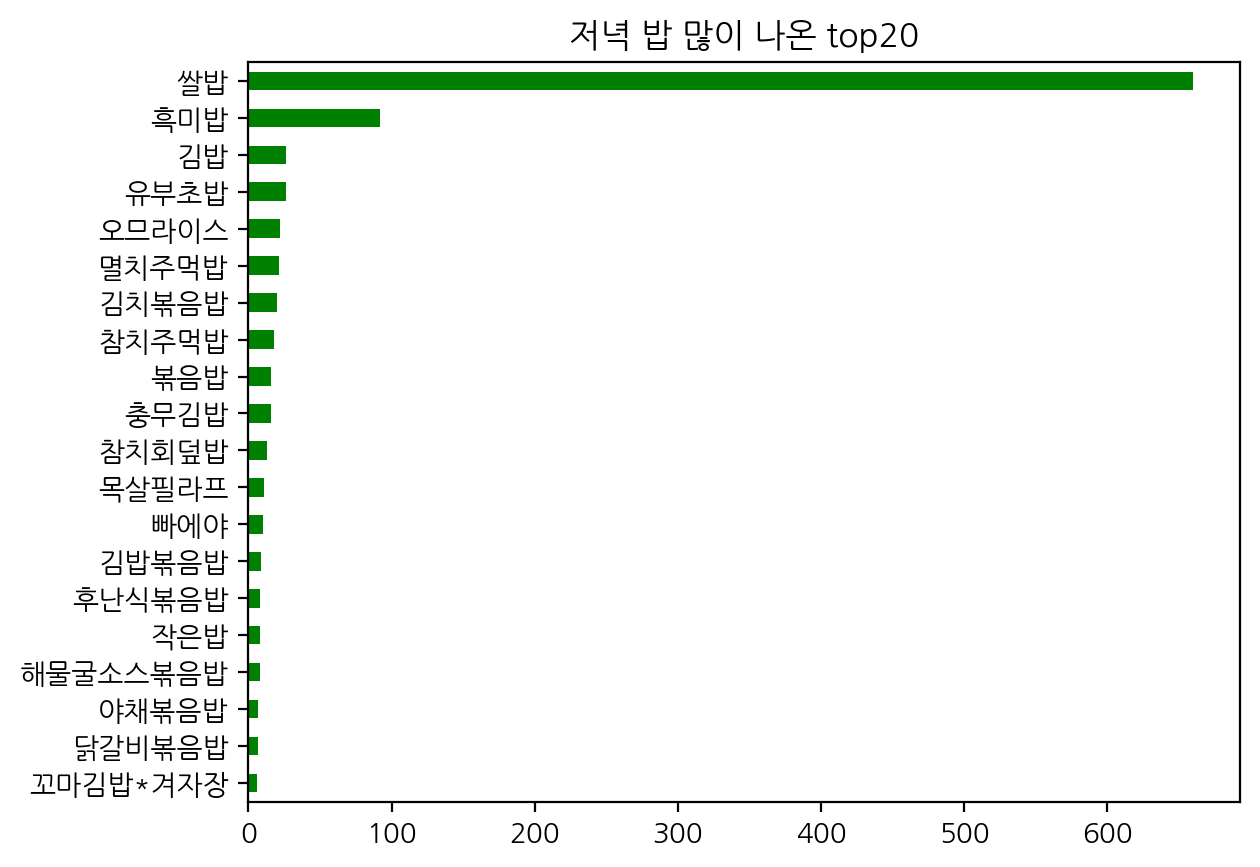

In [104]:
dinner_menu['밥'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 밥 많이 나온 top20")

Text(0.5, 1.0, '저녁 밥 종류별 많이 먹은 top20')

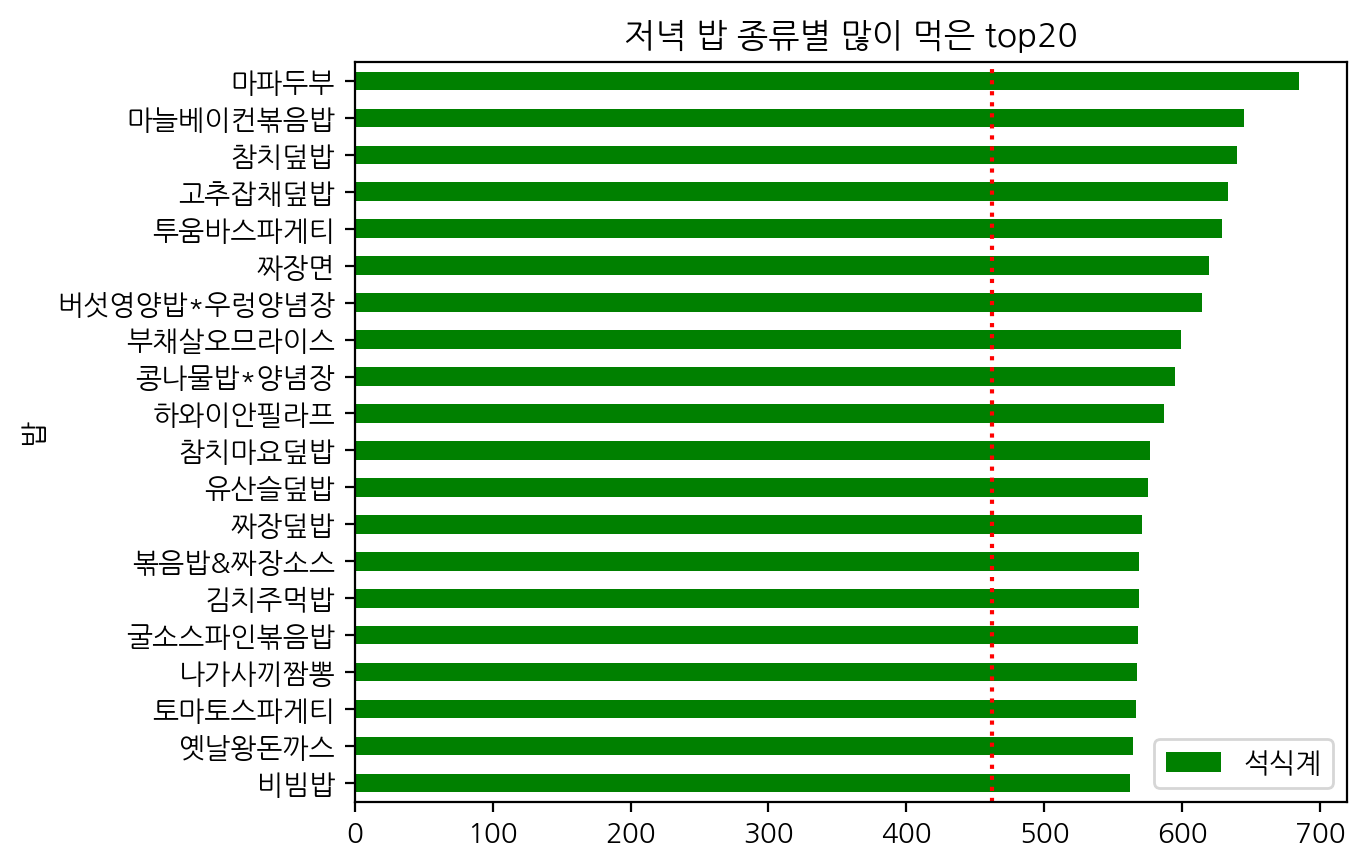

In [105]:
dinner_menu.groupby('밥').agg({'석식계':'mean'}).nlargest(20, columns='석식계').sort_values(by='석식계').plot.barh(color='g')
plt.axvline(train['석식계'].mean(), c='red', ls=':')
plt.title("저녁 밥 종류별 많이 먹은 top20")

In [106]:
dinner_menu['국'].unique()

array(['육개장', '어묵국', '청국장찌개', '우동', '차돌박이찌개', '맑은국', '김치콩나물국', '홍합미역국',
       '된장찌개', '순두부찌개', '설렁탕', '옹심이만두국', '콩비지찌개', '열무된장국', '잔치국수', '닭개장',
       '버섯들깨탕', '오징어국', '대구찌개', '가쯔오장국', '짬뽕', '연두부탕', '달래된장찌개', '계란파국',
       '뼈해장국', '양송이스프', '닭곰탕', '수제비국', '알탕', '미소장국', '냉이된장찌개', '유부장국',
       '쇠고기미역국', '매운버섯국', '쇠고기무국', '유부주머니국', '팽이버섯장국', '들깨미역국', '꽃게탕',
       '팽이버섯국', '비빔메밀국수', '들깨버섯탕', '북어국', '부대찌개*라면사리', '가쯔오국', '팽이장국',
       '해물순두부찌개', '쌀국수', '시래기국', '열무물국수', '냉모밀국수', '소고기미역국', '호박잎찌개',
       '비빔국수', '토마토스파게티', '김치찌개', '계란국', '김치말이국수', '차돌박이된장찌개', '시금치국',
       '함박스테이크', '부대찌개', '쇠고기샤브국', '물냉면', '느타리버섯국', '동태찌개', '돈육김치찌개',
       '콩가루배추국', '아욱국', '콩나물국', '짬뽕수제비국', '콩국수', '스파게티', '김치우동', '무채국',
       '감자국', '작은밥', '콩나물냉국', '로제파스타', '얼갈이된장국', '참치김치찌개', '고추장찌개',
       '꼬지어묵우동', '무채맑은국', '조갯살미역국', '근대된장국', '황태국', '어묵우동', '해물된장찌개',
       '참치주먹밥', '옥수수스프', '북어계란국', '바지락수제비', '해물짬뽕', '목살김치찌개', '시금치된장국',
       '매운감자국', '대구지리', '매생이굴국', '미역국', '봄동된장국', '매운오징어국', '감자찌개',
       '

Text(0.5, 1.0, '저녁 국 많이 나온 top20')

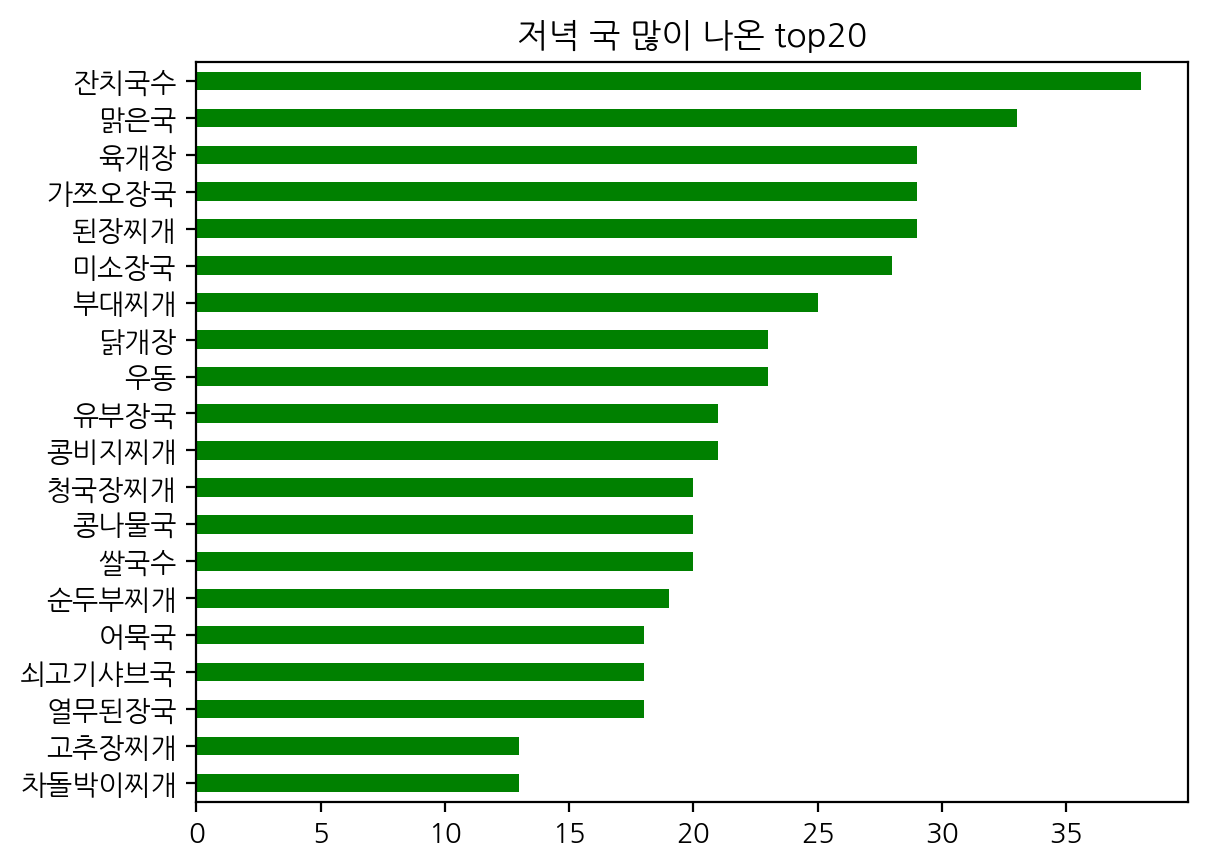

In [107]:
dinner_menu['국'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 국 많이 나온 top20")

Text(0.5, 1.0, '저녁 국 종류별 많이 먹은 top20')

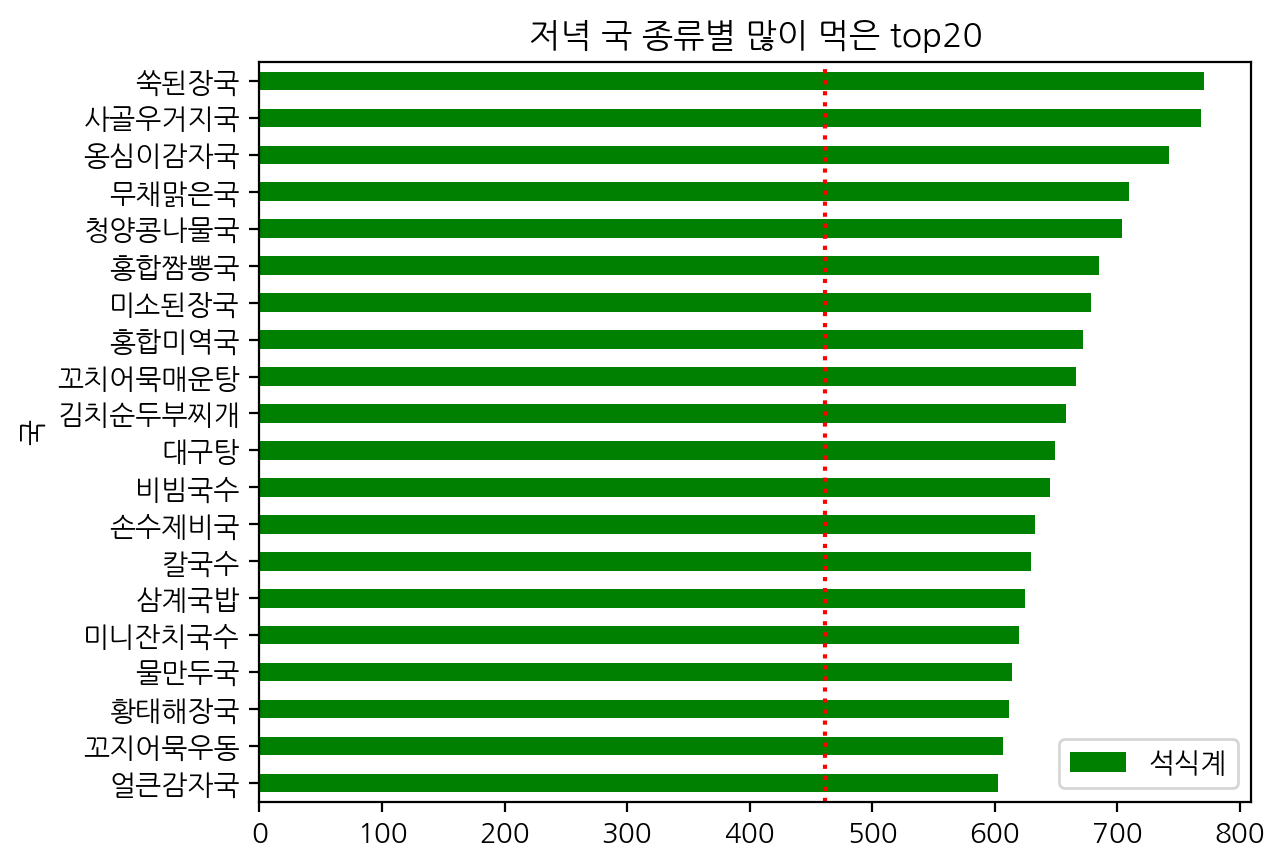

In [108]:
dinner_menu.groupby('국').agg({'석식계':'mean'}).nlargest(20, columns='석식계').sort_values(by='석식계').plot.barh(color='g')
plt.axvline(train['석식계'].mean(), c='red', ls=':')
plt.title("저녁 국 종류별 많이 먹은 top20")

In [109]:
dinner_menu['반찬1'].unique()

array(['자반고등어구이', '유산슬', '황태양념구이', '멕시칸샐러드', '닭갈비', '군만두', '미니함박',
       '등갈비김치찜', '쇠불고기', '새우또띠아', '명태조림', '김치전', '떡갈비조림', '해물까스&타르타르소스',
       '매운돼지갈비찜', '교자만두', '삼치구이', '꽁치한마리구이', '버섯불고기', '떡볶이', '미트볼조림',
       '돈육굴소스볶음', '수제고로케*케찹', '생선까스*탈탈소스', '개성감자만두', '코다리무조림', '간장찜닭',
       '참치야채전', '해물청경채볶음', '미니햄버거', '임연수찜', '아귀콩나물찜', '찹쌀순대볶음', '동그랑땡전',
       '누룽지탕수육', '돈육씨앗강정', '또띠아피자', '순살깐풍기', '고등어조림', '감자치즈구이', '찜닭',
       '야채튀김', '가자미찜', '수제돈가스', '새싹피자', '닭볶음탕', '해물까스*탈탈소스', '탕수어',
       '쇠고기퀘사디아', '가쯔오장국', '고추잡채*꽃빵', '고추장불고기', '탕수육', '수제미니햄버거', '가자미튀김',
       '해물누룽지탕', '코다리강정', '주꾸미볶음', '사천식탕수육', '꽁치허브구이', '데리야끼파닭',
       '고구마치즈구이', '춘권*칠리소스', '돈육청경채볶음', '미니함박조림', '수제돈까스', '미트볼케찹조림',
       '오징어무침', '삼치데리야끼구이', '훈제오리냉채', '치킨핑거*요거트D', '콘샐러드', '양송이스프',
       '모둠장조림', '탕수만두', '감자버터구이', '깐풍기', '오징어볶음', '단호박스프', '수제핫도그',
       '과일샐러드', '쇠고기장조림', '고등어카레구이', '너비아니*부추생채', '치킨핑거', '돈까스', '순대야채볶음',
       '등뼈묵은지찜', '소불고기', '소고기퀘사디아', '쭈꾸미볶음', '치킨텐더', '삼치된장구이', '왕새우튀김',
       '훈제오리', 

Text(0.5, 1.0, '저녁 반찬1 많이 나온 top20')

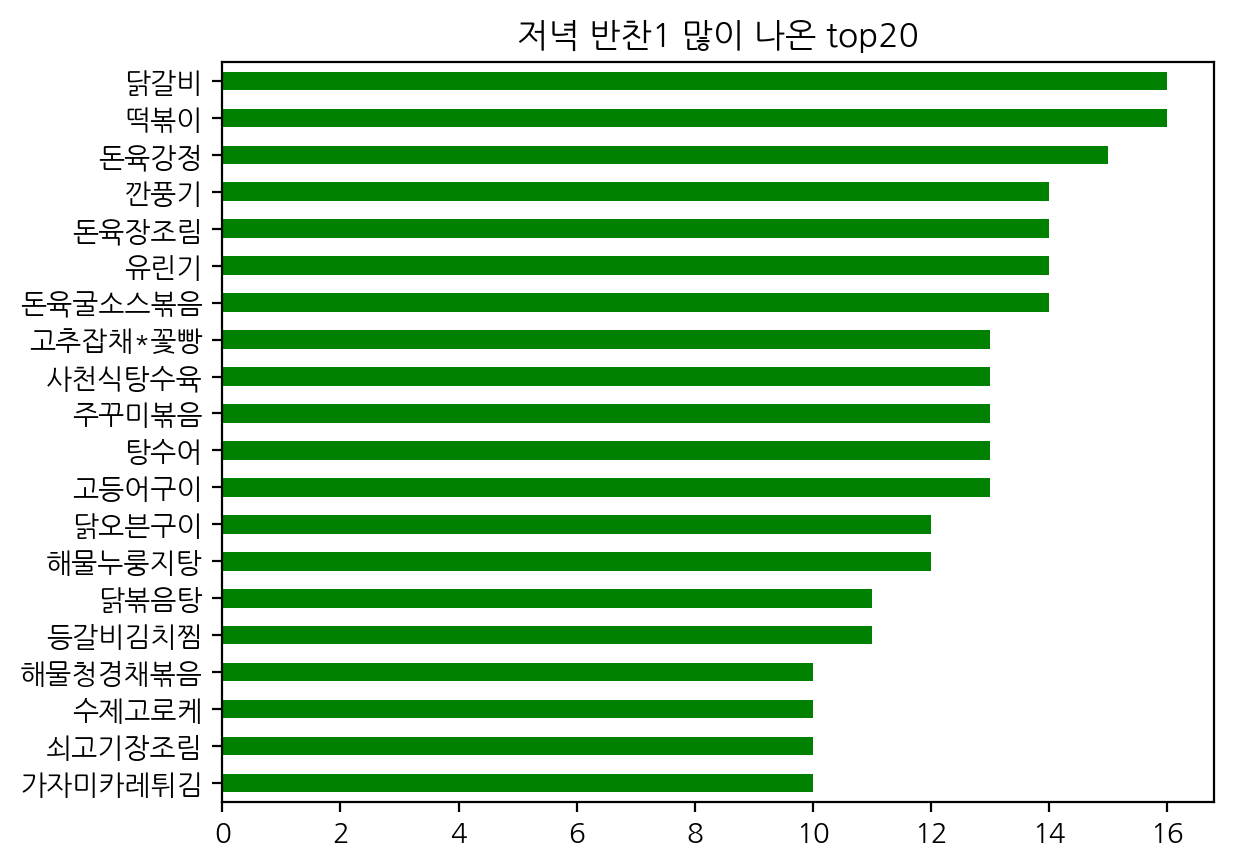

In [110]:
dinner_menu['반찬1'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 반찬1 많이 나온 top20")

Text(0.5, 1.0, '저녁 반찬1 종류별 많이 먹은 top20')

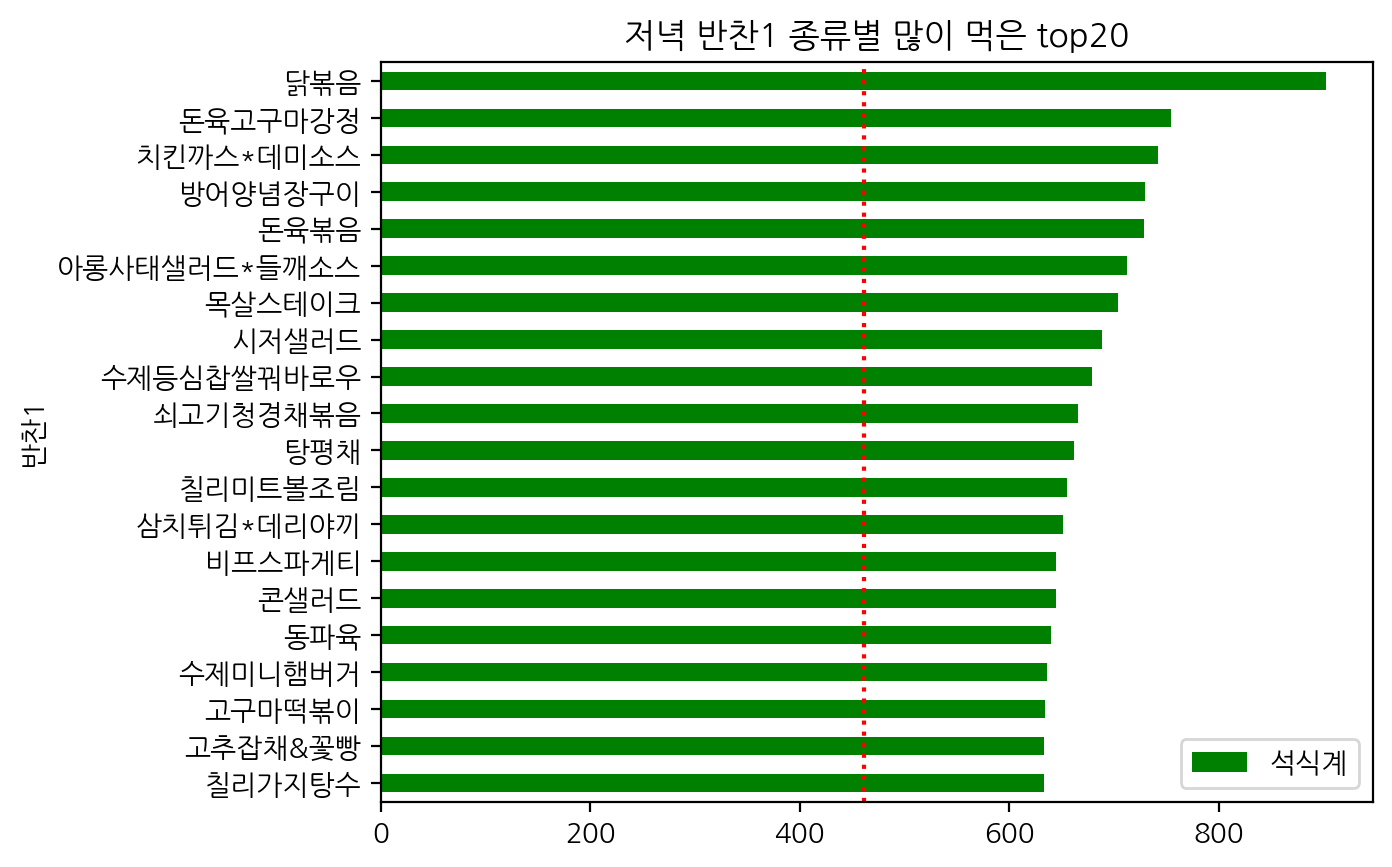

In [111]:
dinner_menu.groupby('반찬1').agg({'석식계':'mean'}).nlargest(20, columns='석식계').sort_values(by='석식계').plot.barh(color='g')
plt.axvline(train['석식계'].mean(), c='red', ls=':')
plt.title("저녁 반찬1 종류별 많이 먹은 top20")

In [112]:
dinner_menu['반찬2'].unique()

array(['두부조림', '아삭고추무침', '고기전', '군고구마', '감자소세지볶음', '과일샐러드', '어묵볶음',
       '임연수구이', '해파리겨자채', '쨔샤이무침', '감자채볶음', '야채스틱', '청포묵무침', '볶음쌀국수',
       '멸치호두볶음', '찜)', '꽃맛살볶음', '두부양념조림', '콩나물겨자채', '옥수수전', '야채계란찜',
       '타코야끼', '고추잡채*꽃빵', '통도라지구이', '꽃맛살샐러드', '버섯메밀전', '단호박범벅', '어묵곤약볶음',
       '새송이버섯볶음', '궁중떡찜', '마파두부', '콘샐러드', '해물까스*탈탈소스', '해초무침', '계란찜',
       '탕평채', '조각사과', '계란야채말이', '단무지무침', '견과류조림', '감자범벅', '새송이버섯전',
       '쫄면무침', '모둠묵*양념장', '오이무침', '비엔나케찹볶음', '탕수만두', '두부계란구이', '모듬양채쌈',
       '삼치구이', '오이소박이', '모둠소시지구이', '감자만두', '치즈계란말이', '마늘쫑무침', '잡채',
       '두부계란부침', '군만두', '메추리알조림', '콩나물무침', '락교', '계란말이', '도토리묵무침',
       '감자채햄볶음', '땅콩조림', '우엉잡채', '야채튀김', '햄맛살볶음', '떡볶이', '해물가스*탈탈소스',
       '찐햇감자', '연근땅콩조림', '쇠고기퀘사디아', '주꾸미초무침', '멕시칸샐러드', '비엔나컬리플라워볶음',
       '새우까스*탈탈소스', '옥수수감자범벅', '동그랑땡전', '홍시드레싱샐러드', '베이컨계란말이', '무초절임',
       '비엔나감자볶음', '실곤약초무침', '크랜베리단호박샐러드', '꽈리고추어묵조림', '열대과일샐러드', '모둠버섯볶음',
       '연두부*양념', '해물파전', '날치알계란찜', '가자미찜', '단무지', '양장피잡채', '두부구이*양념장',
       '찐감자', '마늘

In [113]:
dinner_menu.tail(100)

일자     연   월  요일   정원수  식사가능인원      휴가비율      출장비율      야근비율  \
1104 2020-08-24  2020   8   0  2989    2253  0.101037  0.061894  0.303151   
1105 2020-08-25  2020   8   1  2989    2295  0.073269  0.063566  0.329847   
1106 2020-08-26  2020   8   2  2989    2214  0.071930  0.065908  0.000903   
1107 2020-08-27  2020   8   3  2989    2257  0.068585  0.070592  0.254763   
1108 2020-08-28  2020   8   4  2989    2142  0.107059  0.076949  0.000000   
1109 2020-08-31  2020   8   0  2989    2179  0.061224  0.054533  0.297384   
1110 2020-09-01  2020   9   1  3132    2421  0.023308  0.035441  0.260223   
1111 2020-09-02  2020   9   2  3132    2377  0.024904  0.049489  0.000000   
1112 2020-09-03  2020   9   3  3132    2307  0.037995  0.062261  0.230169   
1113 2020-09-04  2020   9   4  3132    2241  0.066411  0.070562  0.001339   
1114 2020-09-07  2020   9   0  3132    2408  0.038953  0.052043  0.321429   
1115 2020-09-08  2020   9   1  3132    2427  0.029055  0.055236  0.300783   
1116 2020-09-09  2020   9   2  3132    2426  0.032567  0.057471  0.001237   
1117 2020-09-10  2020   9   3  3132    2376  0.033844  0.070243  0.252525   
1118 2020-09-11  2020   9   4  3132    2286  0.067369  0.082695  0.000875   
1119 2020-09-14  2020   9   0  3132    2474  0.032567  0.060026  0.293048   
1120 2020-09-15  2020   9   1  3132    2422  0.025223  0.066731  0.279108   
1121 2020-09-16  2020   9   2  3132    2470  0.022989  0.073116  0.000000   
1122 2020-09-17  2020   9   3  3132    2435  0.026820  0.078225  0.241478   
1123 2020-09-18  2020   9   4  3132    2300  0.076948  0.089719  0.000435   
1124 2020-09-21  2020   9   0  3132    2463  0.033525  0.067050  0.301259   
1125 2020-09-22  2020   9   1  3132    2467  0.031609  0.071520  0.243210   
1126 2020-09-23  2020   9   2  3132    2465  0.028097  0.074713  0.000406   
1127 2020-09-24  2020   9   3  3132    2454  0.032567  0.083653  0.205786   
1128 2020-09-25  2020   9   4  3132    2343  0.075670  0.091635  0.000427   
1129 2020-09-28  2020   9   0  3132    1817  0.314496  0.060026  0.044579   
1130 2020-10-05  2020  10   0  3008    2494  0.030253  0.043551  0.330794   
1131 2020-10-06  2020  10   1  3008    2482  0.021277  0.060838  0.323932   
1132 2020-10-07  2020  10   2  3008    2430  0.017952  0.077128  0.002469   
1133 2020-10-08  2020  10   3  3008    2446  0.029255  0.074801  0.300082   
1134 2020-10-12  2020  10   0  3008    2467  0.034907  0.071476  0.224970   
1135 2020-10-13  2020  10   1  3008    2500  0.023936  0.082447  0.213600   
1136 2020-10-14  2020  10   2  3008    2502  0.022606  0.088763  0.001199   
1137 2020-10-15  2020  10   3  3008    2467  0.032247  0.089428  0.364005   
1138 2020-10-16  2020  10   4  3008    2378  0.059840  0.089761  0.001682   
1139 2020-10-19  2020  10   0  3008    2519  0.047540  0.070146  0.233426   
1140 2020-10-20  2020  10   1  3008    2539  0.027926  0.080120  0.204017   
1141 2020-10-21  2020  10   2  3008    2502  0.035572  0.079455  0.002398   
1142 2020-10-22  2020  10   3  3008    2459  0.038564  0.090093  0.321675   
1143 2020-10-23  2020  10   4  3008    2367  0.074136  0.094082  0.000845   
1144 2020-10-26  2020  10   0  3008    2480  0.051862  0.075798  0.229839   
1145 2020-10-27  2020  10   1  3008    2502  0.034907  0.088098  0.198241   
1146 2020-10-28  2020  10   2  3008    2478  0.034907  0.095412  0.001211   
1147 2020-10-29  2020  10   3  3008    2442  0.043551  0.099069  0.171171   
1148 2020-10-30  2020  10   4  3008    2263  0.113032  0.099069  0.000442   
1149 2020-11-02  2020  11   0  3021    2514  0.053625  0.070506  0.245028   
1150 2020-11-03  2020  11   1  3021    2544  0.033102  0.089374  0.208333   
1151 2020-11-04  2020  11   2  3021    2503  0.037074  0.093678  0.000400   
1152 2020-11-05  2020  11   3  3021    2485  0.037736  0.101291  0.186720   
1153 2020-11-06  2020  11   4  3021    2331  0.088050  0.100960  0.000429   
1154 2020-11-09  2020  11   0  3021    2505  0.047666  0.079775  0.275848   
1155 2020

Text(0.5, 1.0, '저녁 반찬2 많이 나온 top20')

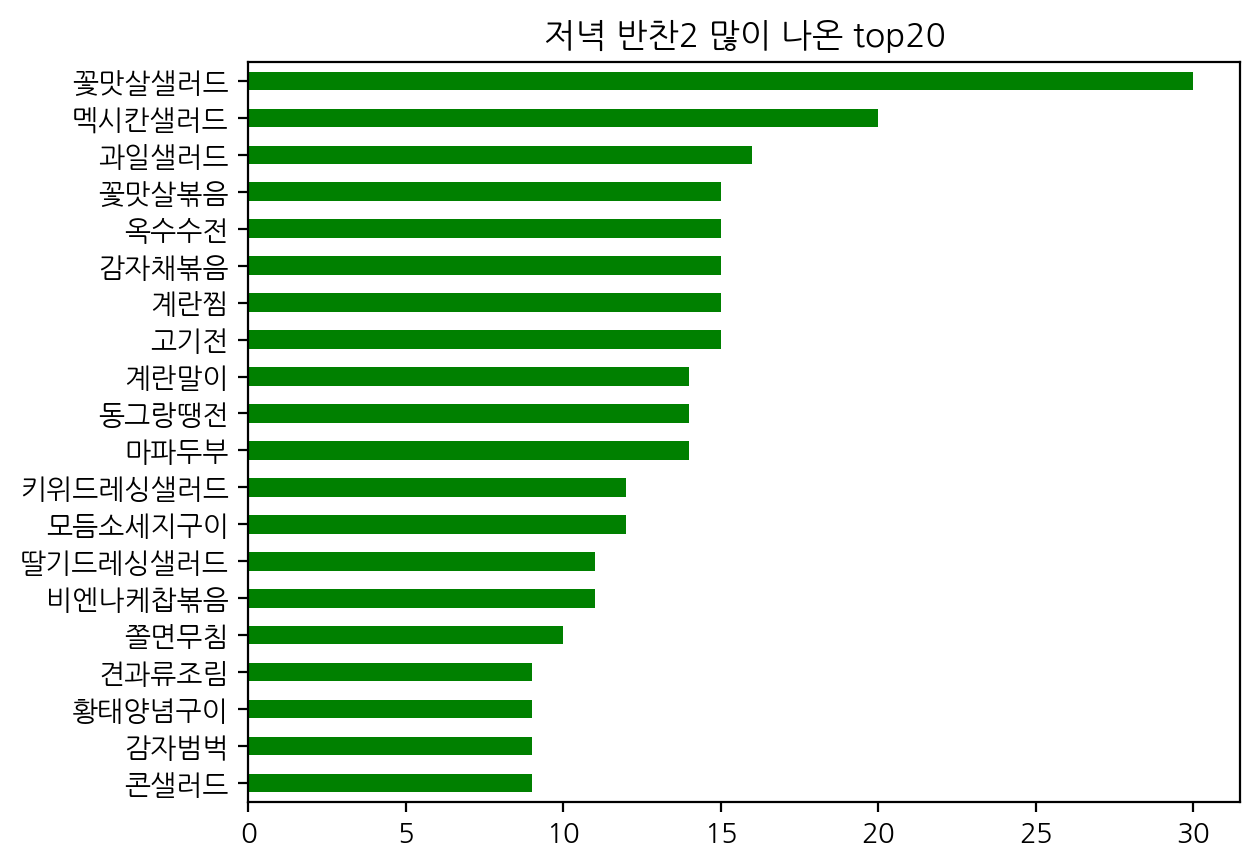

In [114]:
dinner_menu['반찬2'].value_counts().nlargest(20).sort_values().plot.barh(color='g')
plt.title("저녁 반찬2 많이 나온 top20")

Text(0.5, 1.0, '저녁 반찬2 종류별 많이 먹은 top20')

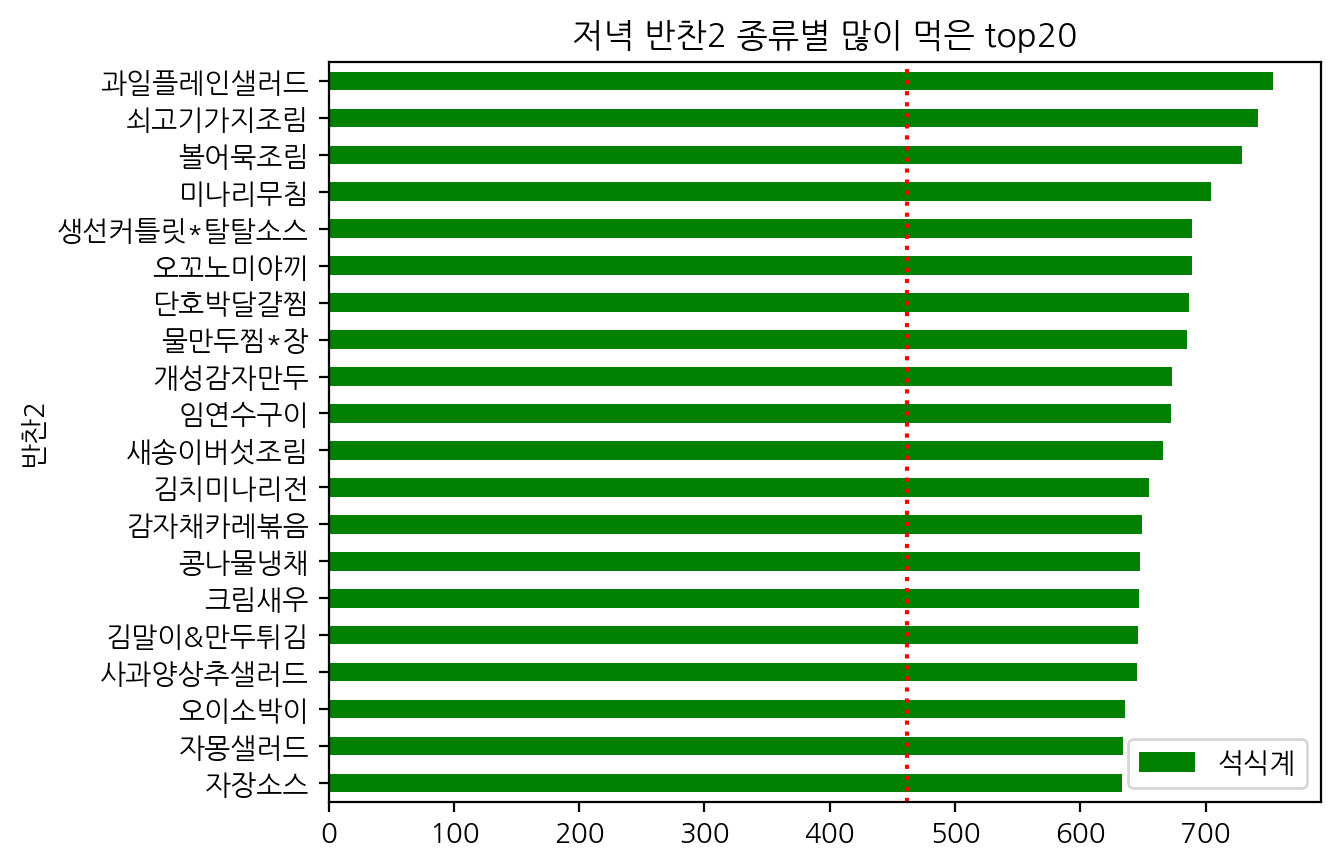

In [115]:
dinner_menu.groupby('반찬2').agg({'석식계':'mean'}).nlargest(20, columns='석식계').sort_values(by='석식계').plot.barh(color='g')
plt.axvline(train['석식계'].mean(), c='red', ls=':')
plt.title("저녁 반찬2 종류별 많이 먹은 top20")

# EDA

## 히스토그램

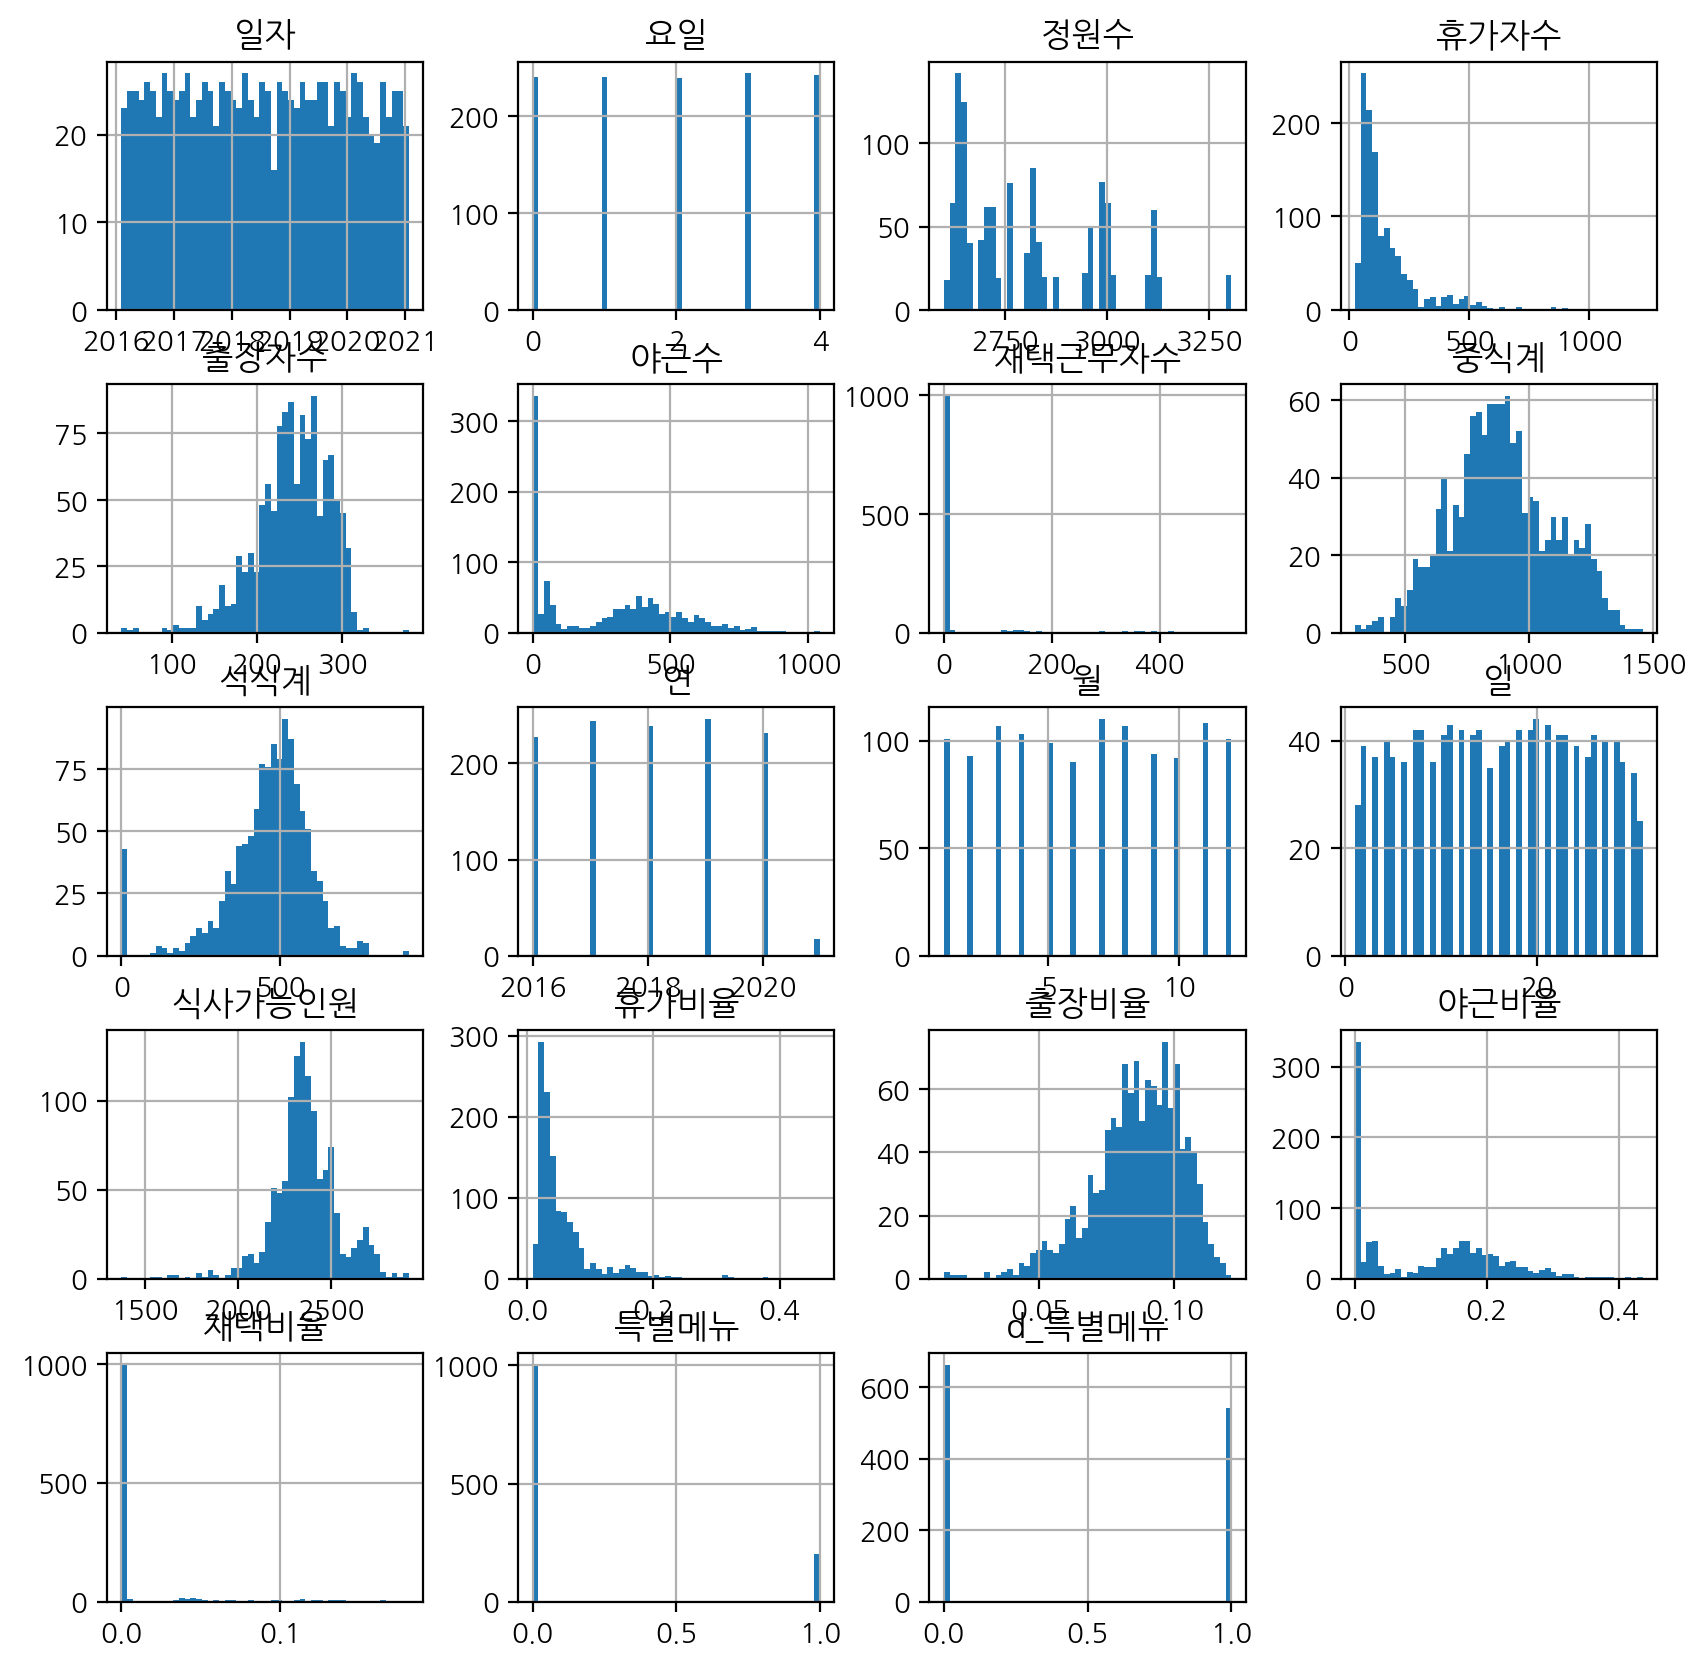

In [116]:
train.hist(figsize=(10,10), bins=50);

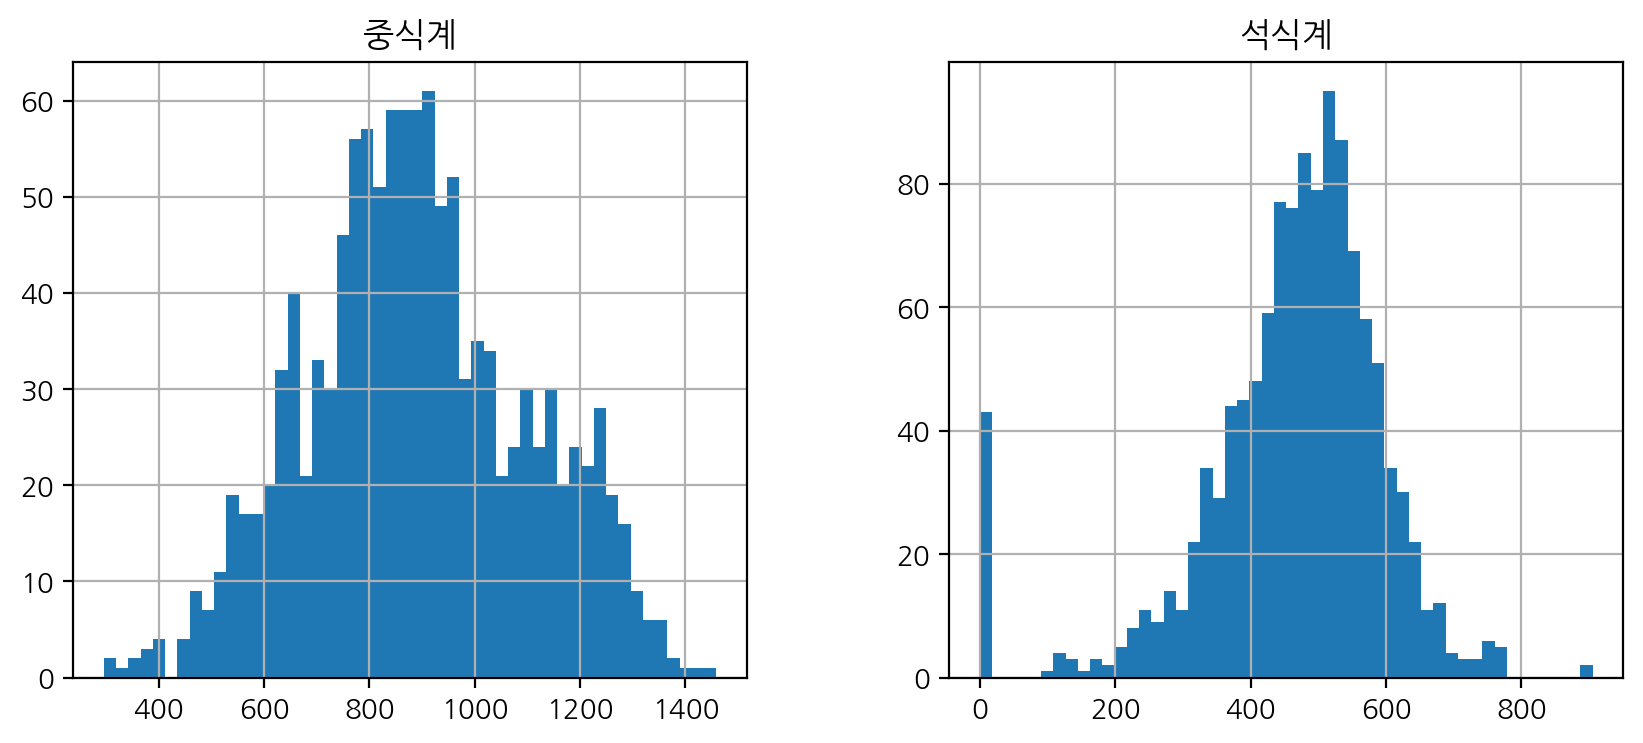

In [117]:
train[["중식계", "석식계"]].hist(figsize=(10,4), bins=50);

* TARGET값이 골고루 분포되어 있습니다.
* 두 plot의 x축의 값이 다름을 주의합시다.
* 석식계 0이 40건 이상이 있네요.

/Users/jomac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


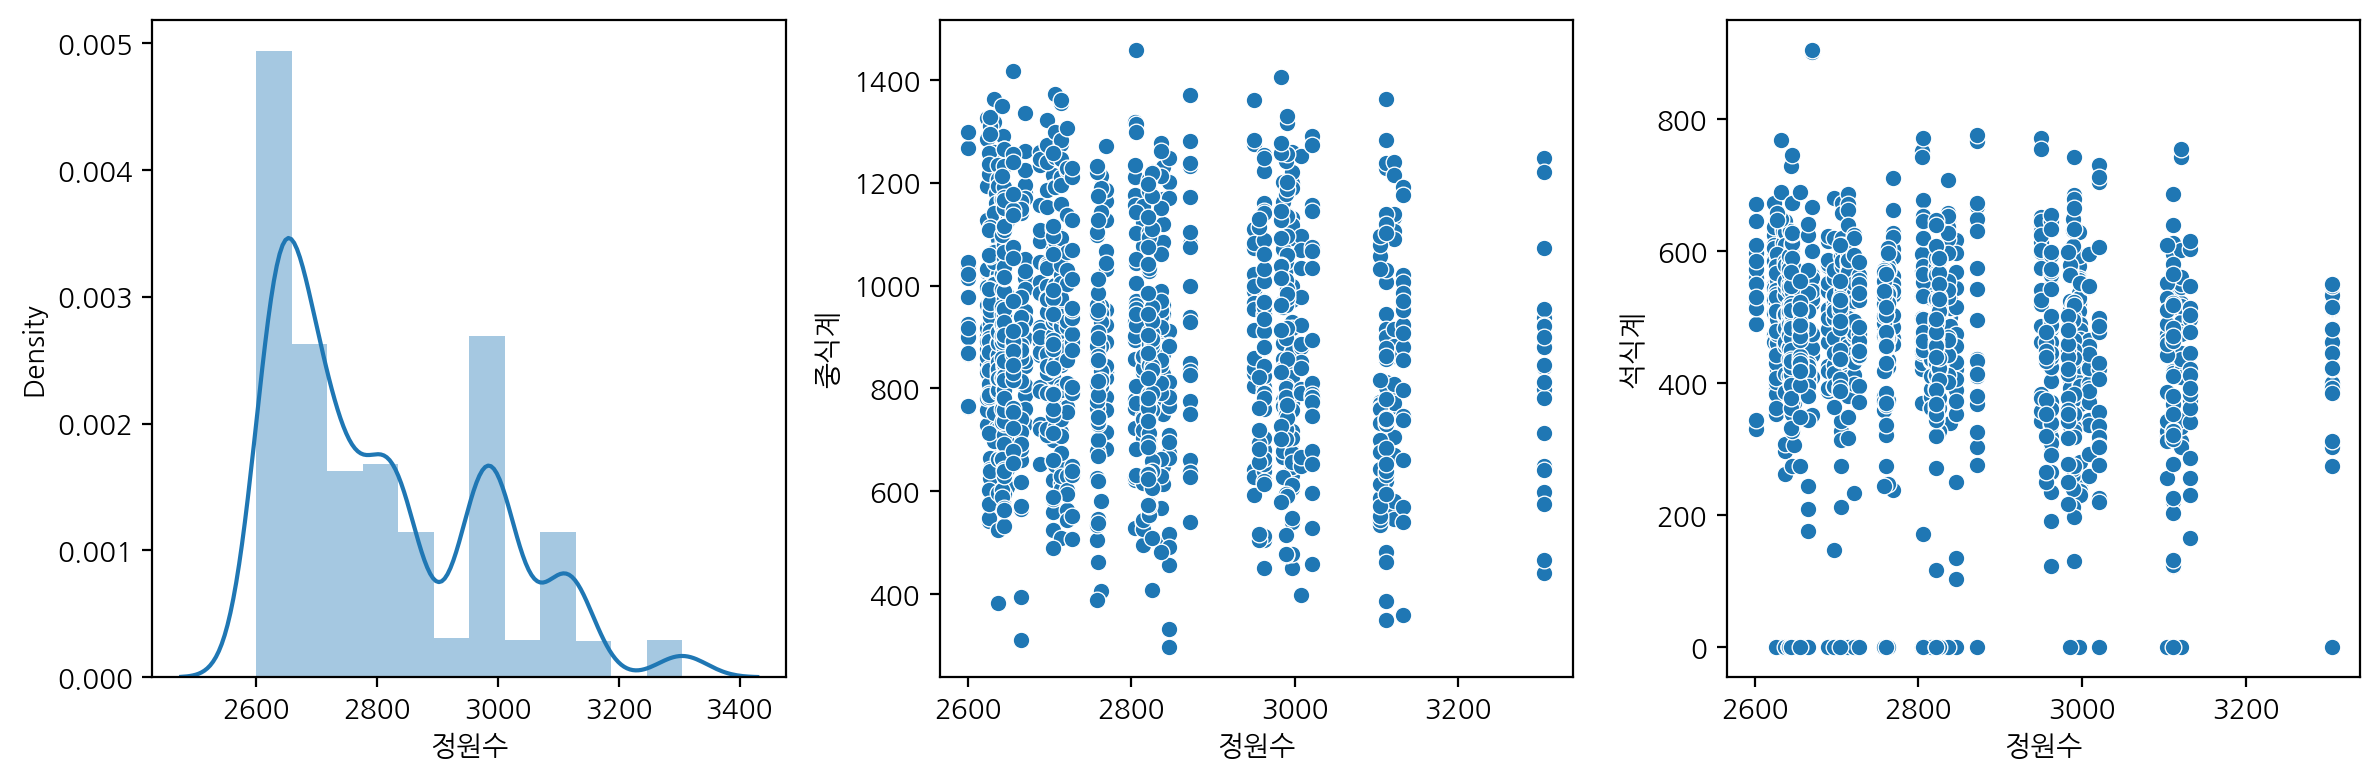

In [118]:
f, ax =plt.subplots(1,3,figsize=(12,4))
sns.distplot(train['정원수'],ax=ax[0])
sns.scatterplot(data=train, x='정원수',y='중식계',ax=ax[1])
sns.scatterplot(data=train, x='정원수',y='석식계',ax=ax[2])

plt.tight_layout()

## 인원수별 상관관계

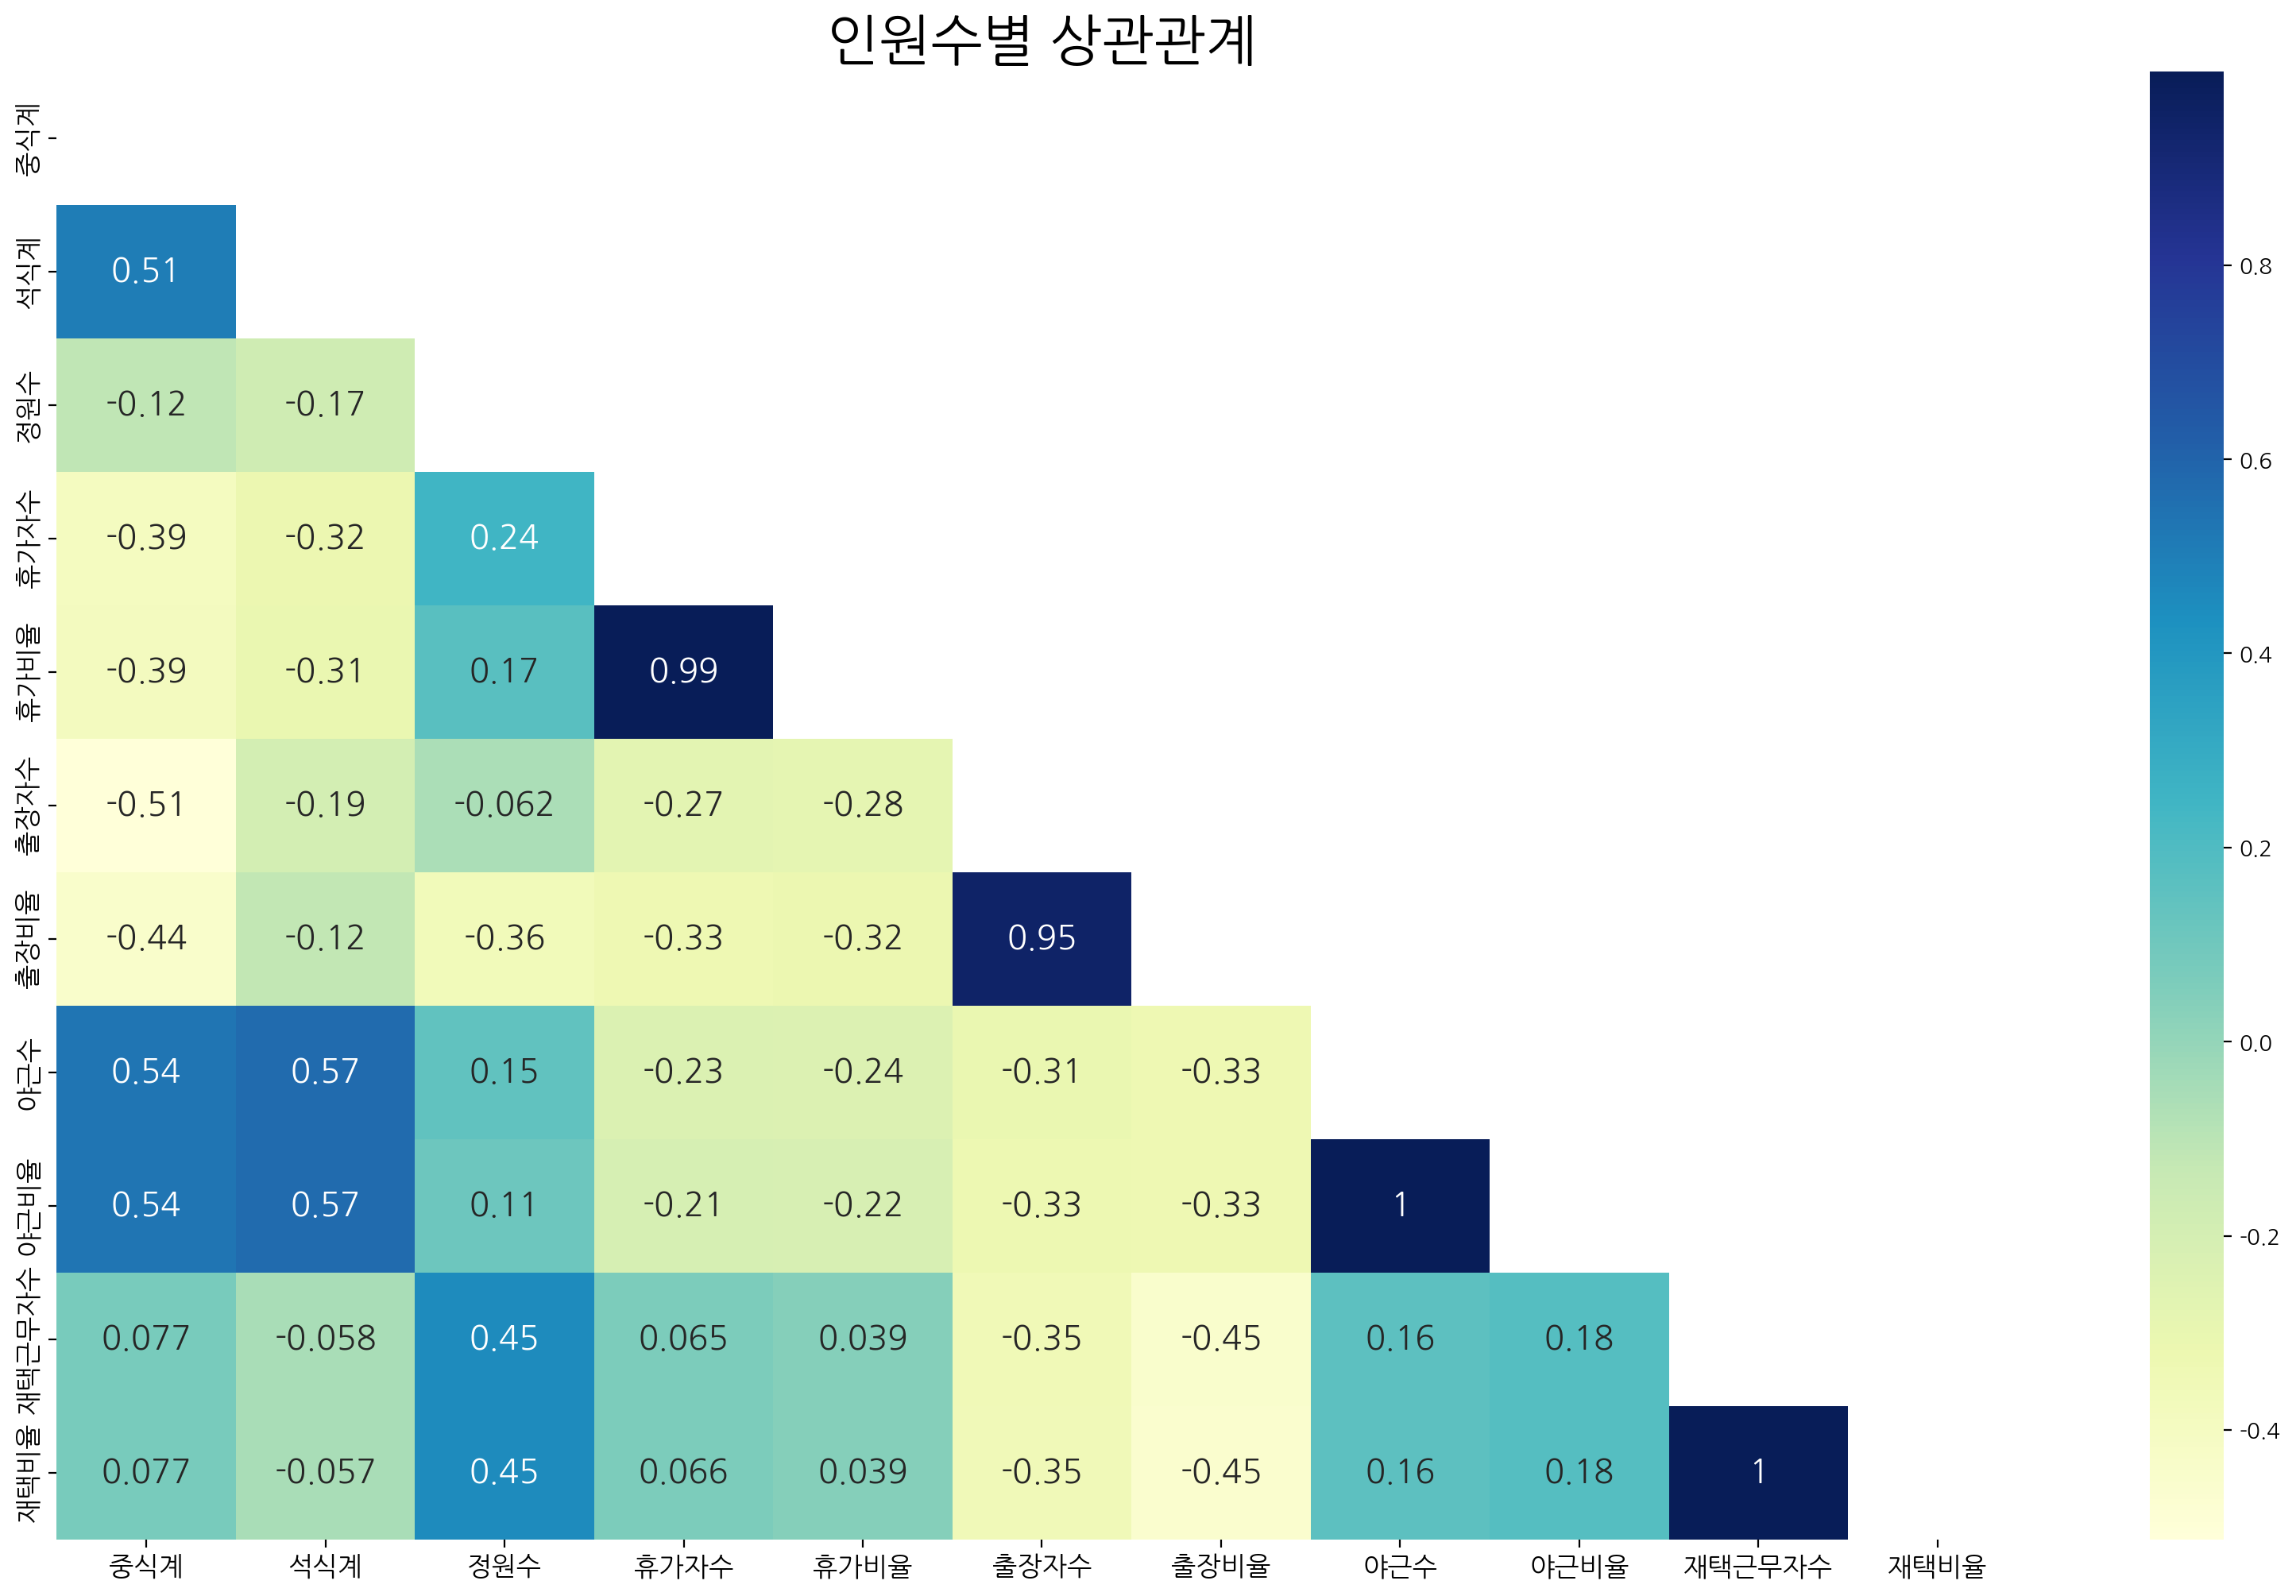

In [119]:
df = train[['중식계', '석식계','정원수', '휴가자수', '휴가비율','출장자수', '출장비율','야근수','야근비율',
       '재택근무자수', '재택비율']]

mask = np.triu(np.ones_like(df.corr()))

fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15}, cmap="YlGnBu", mask=mask)
plt.tick_params(labelsize=12) #label 크기 조정
ax.set_title("인원수별 상관관계",fontsize=25)
plt.show()

Text(0.5, 1.0, '연도별 정원수')

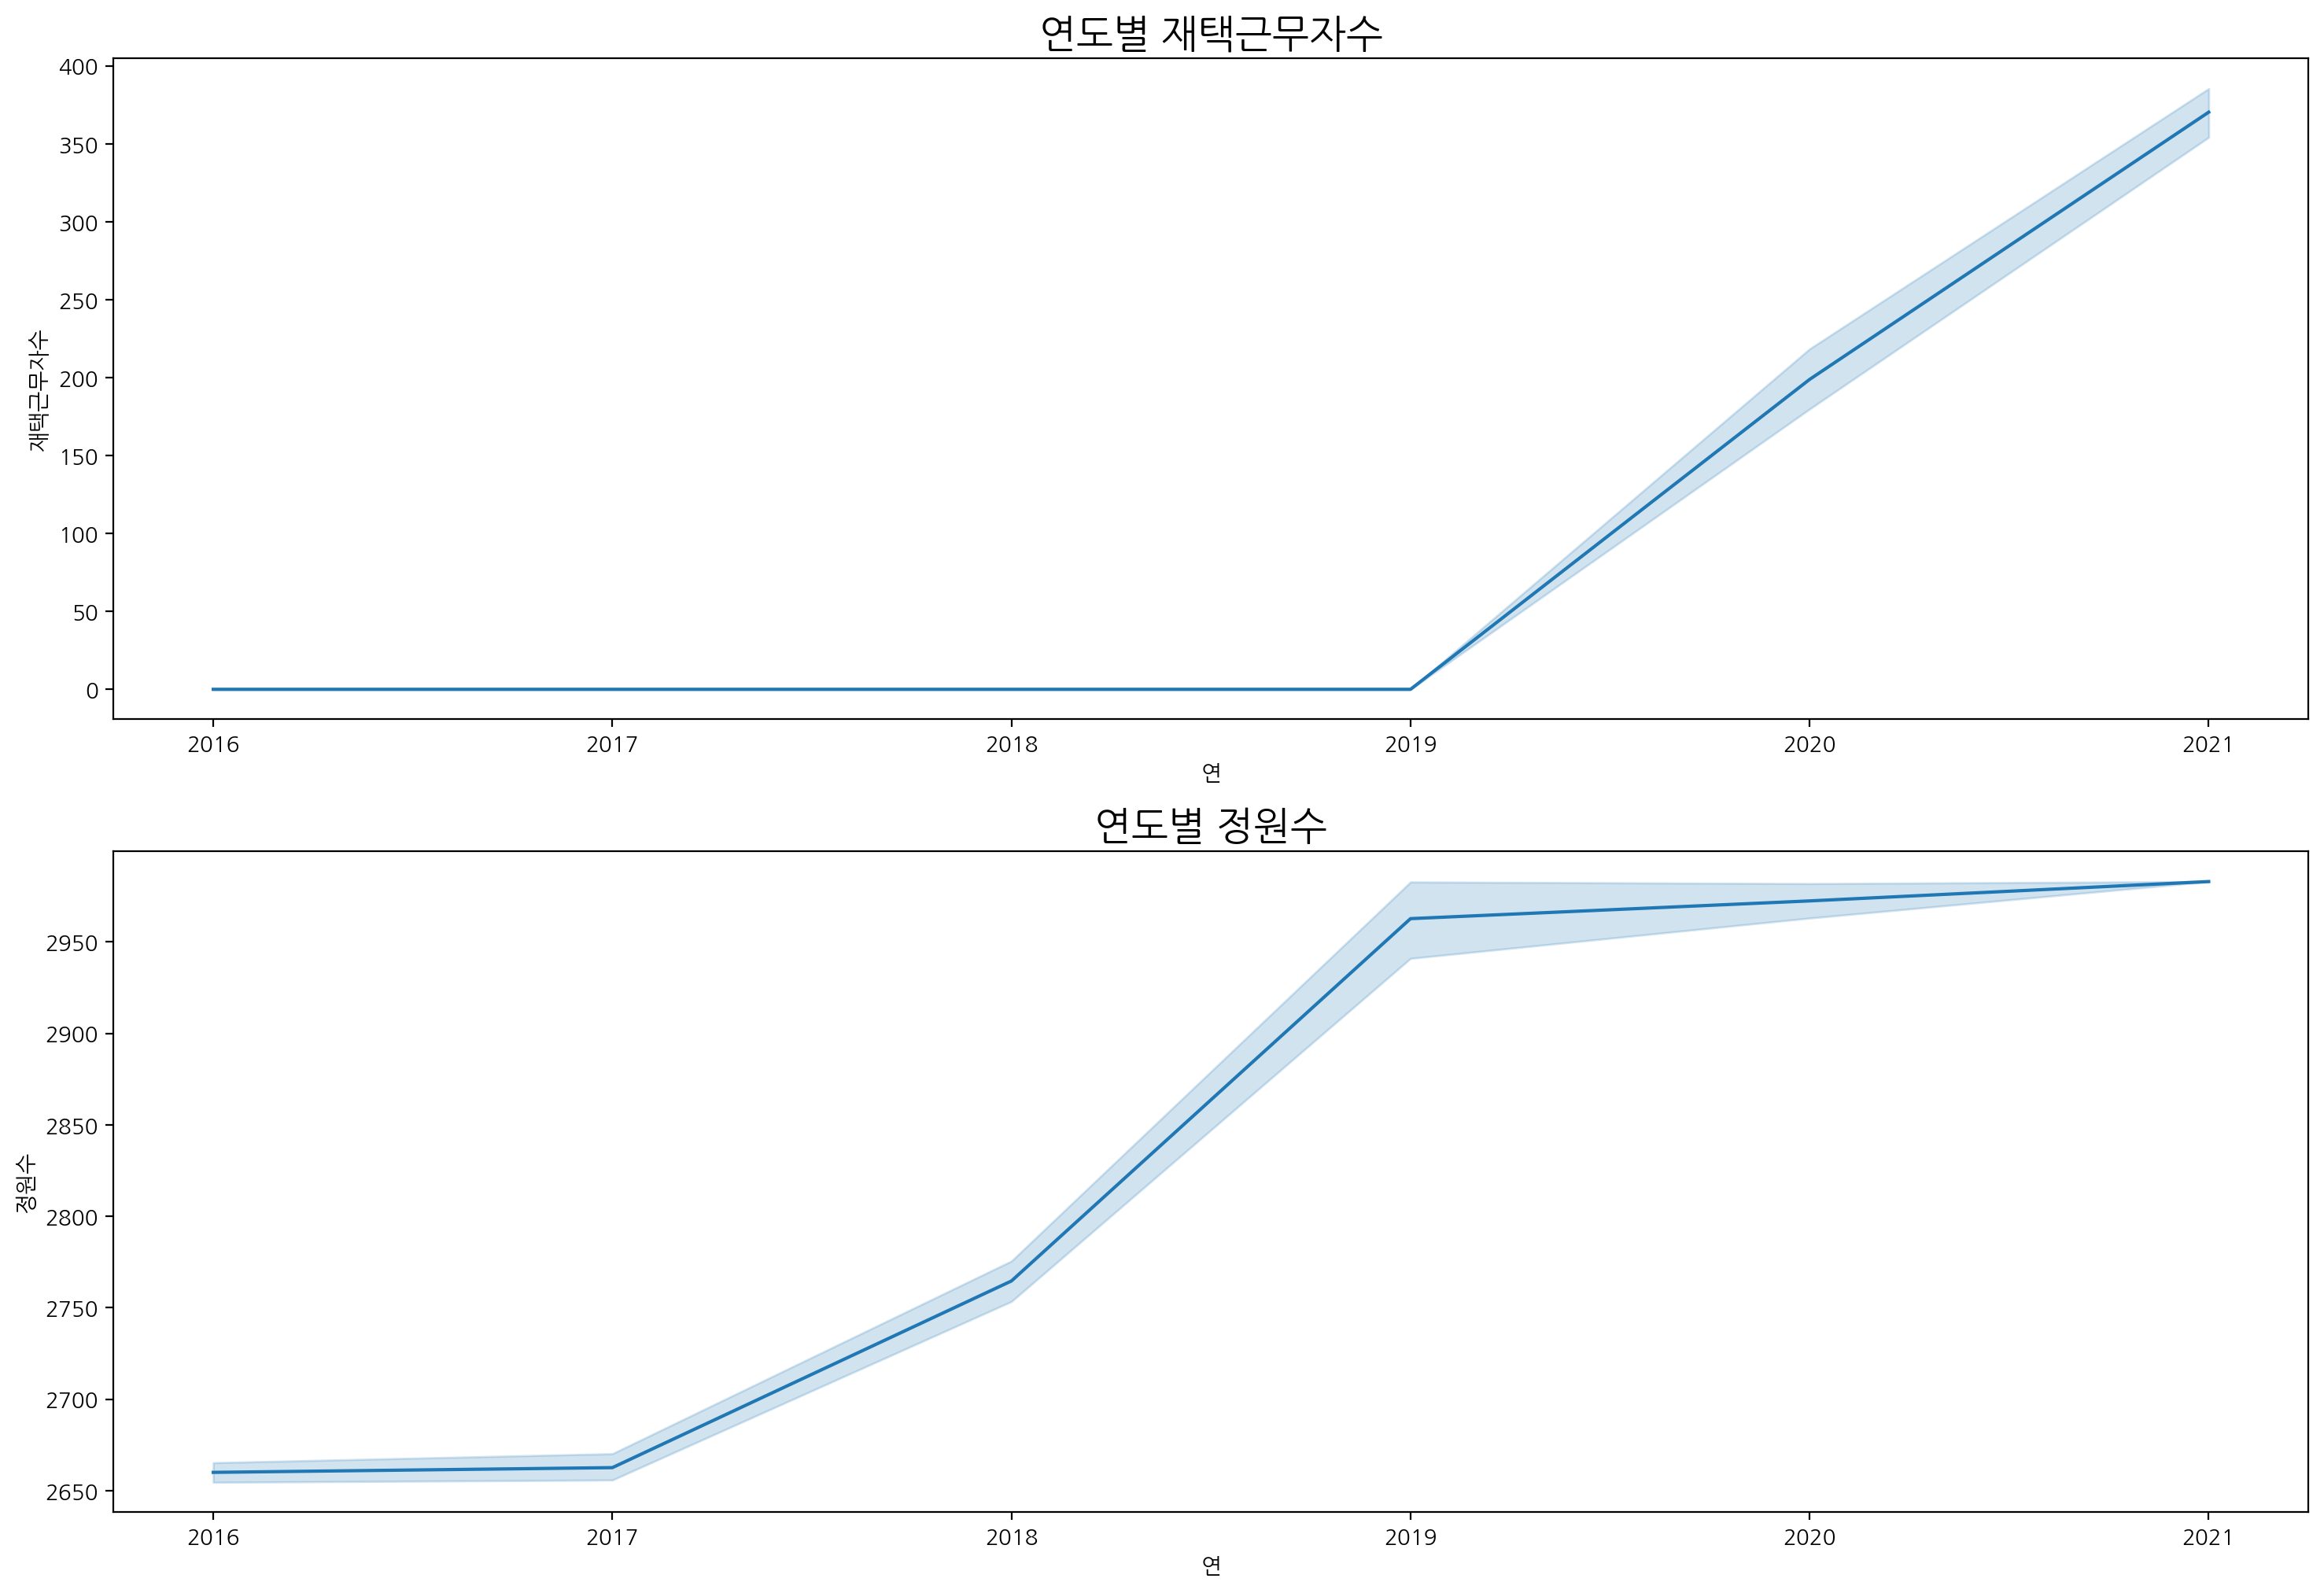

In [120]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))

sns.lineplot(data=train, x="연", y="재택근무자수", ax=ax[0])
ax[0].set_title("연도별 재택근무자수", fontsize=18)
sns.lineplot(data=train, x="연", y="정원수", ax=ax[1])
ax[1].set_title("연도별 정원수", fontsize=18)

* 19년도 이후 상관관계 살펴보기

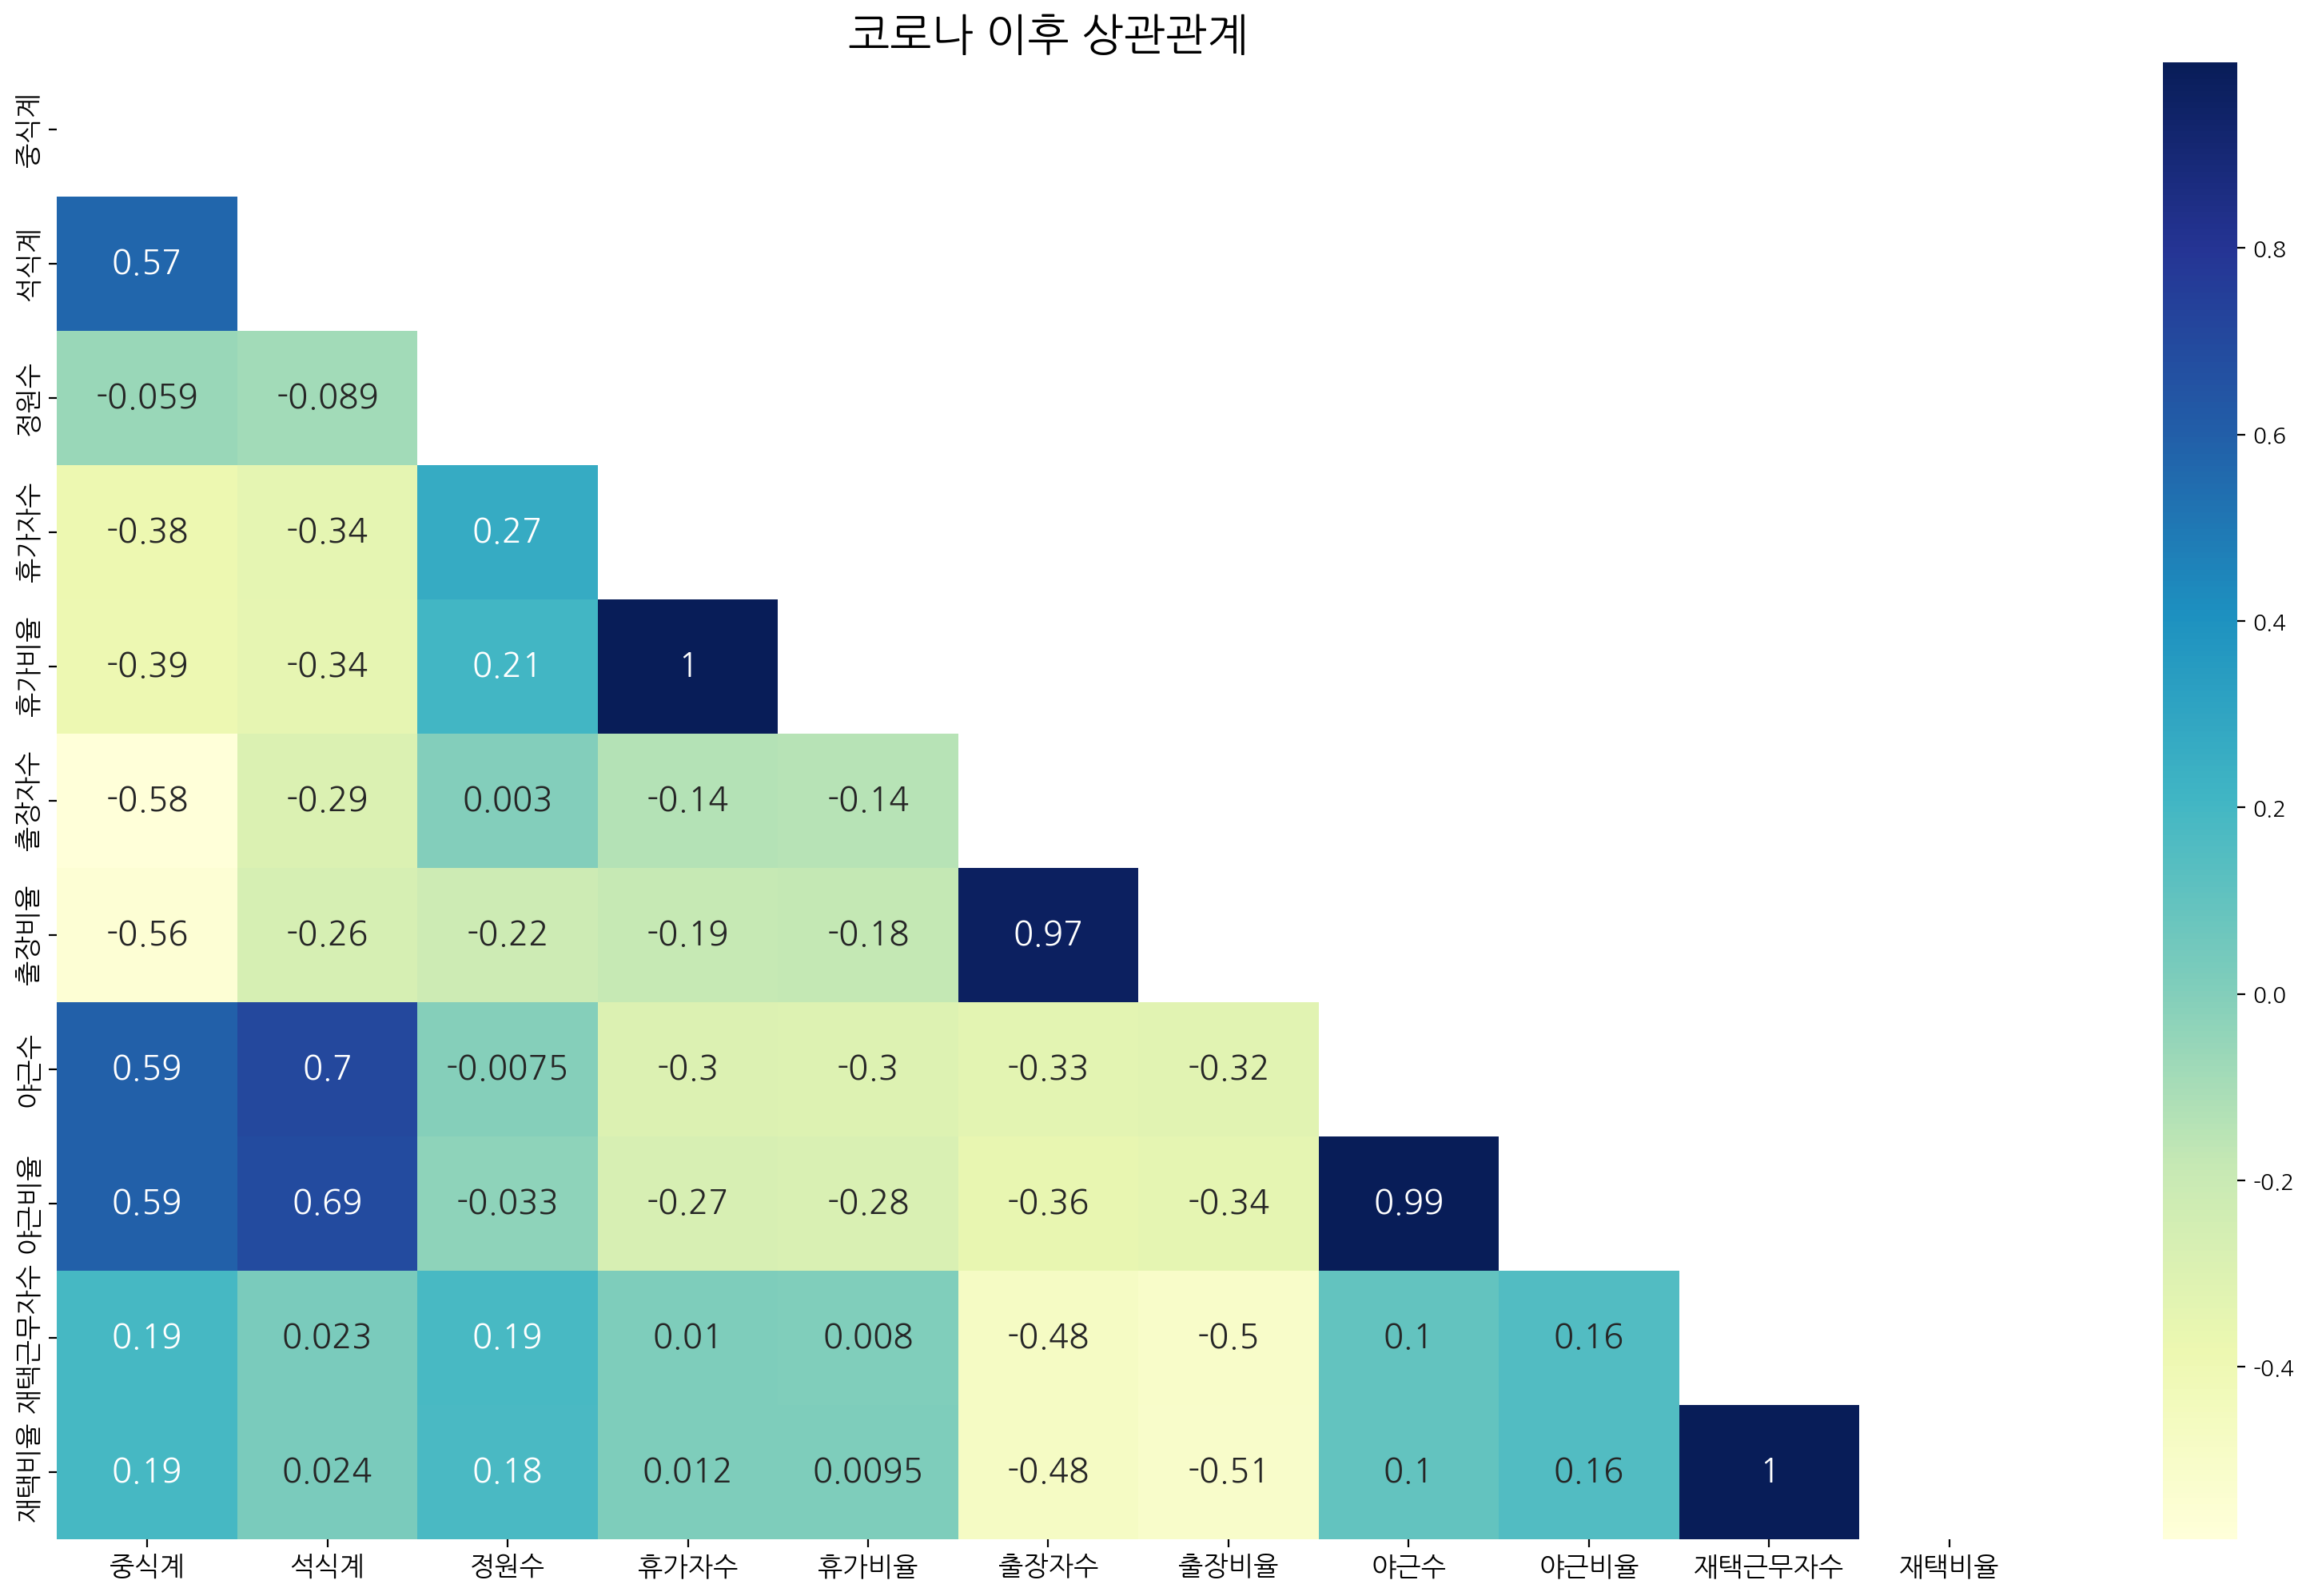

In [121]:
df_2019 = train[train['연']>2018][
    ['중식계', '석식계','정원수', '휴가자수', '휴가비율','출장자수', '출장비율','야근수','야근비율',
       '재택근무자수', '재택비율']]

mask = np.triu(np.ones_like(df_2019.corr()))

plt.figure(figsize=(20,12))
p = sns.heatmap(df_2019.corr(), annot=True, annot_kws={'size': 15}, cmap="YlGnBu", mask=mask)
p.tick_params(labelsize=12) #label 크기 조정
p.axes.set_title("코로나 이후 상관관계", fontsize=20)
plt.show()

## 연도별 중식, 석식계

Text(0.5, 1.0, '연도별 석식계')

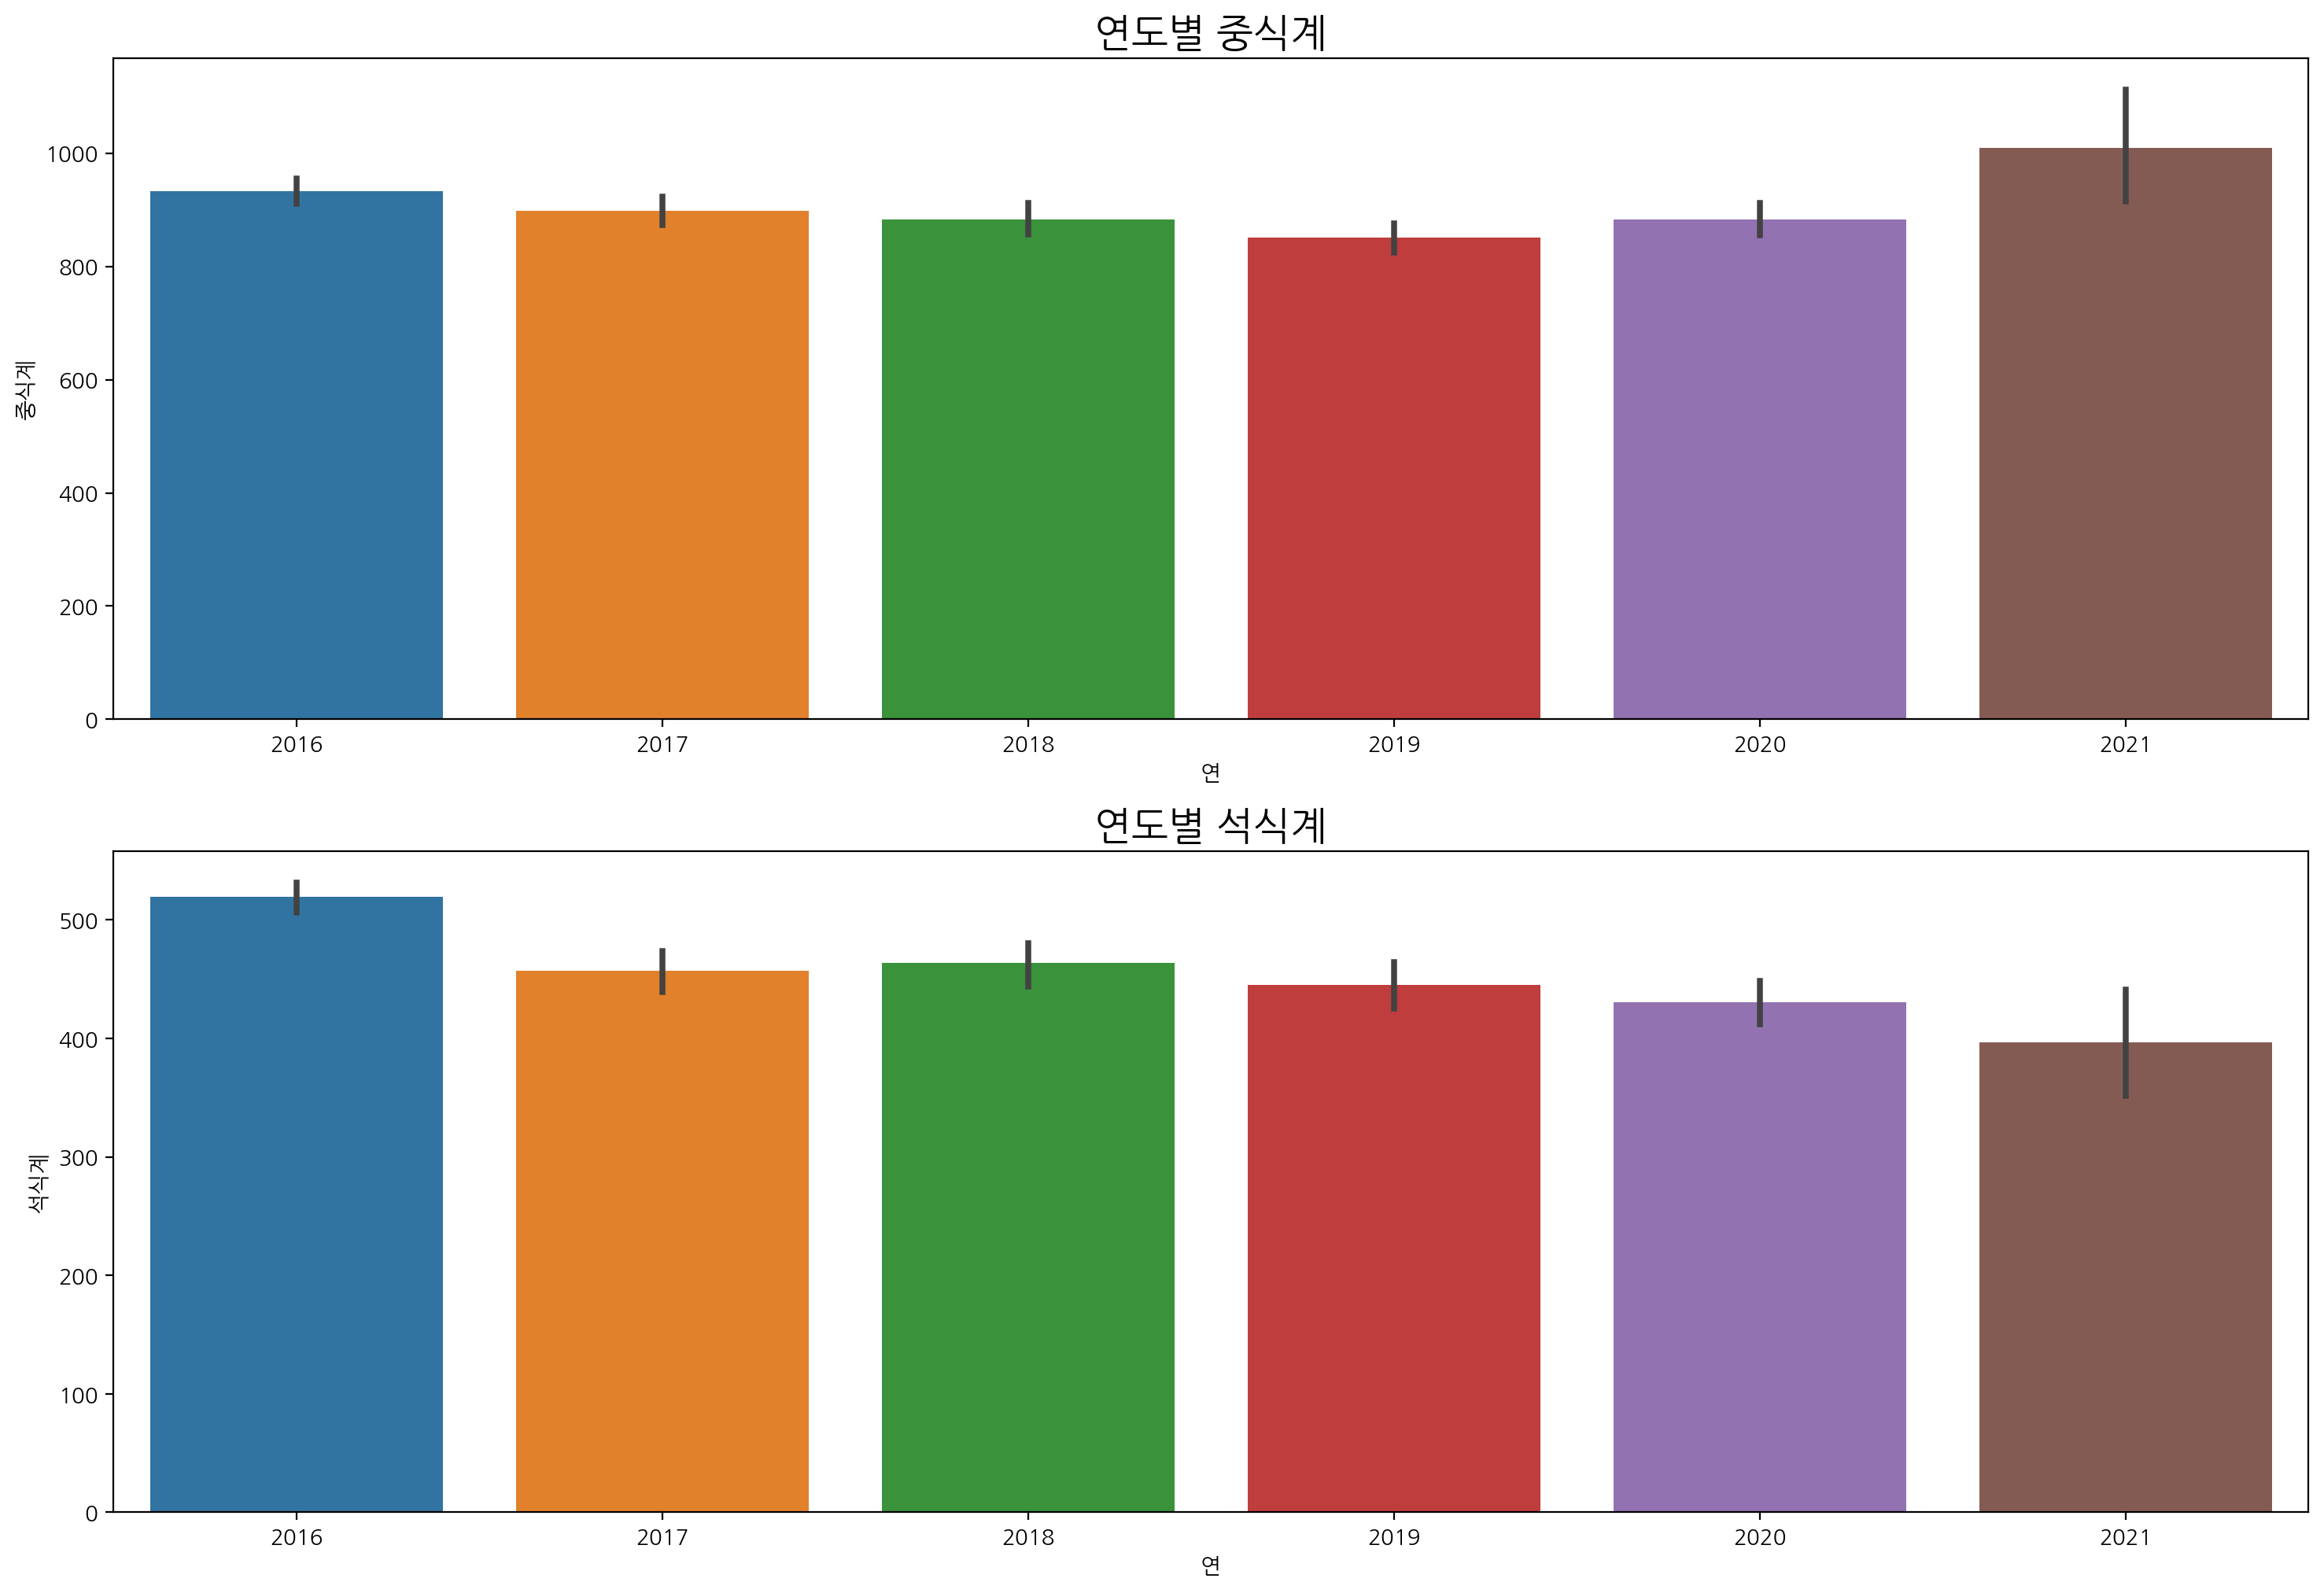

In [122]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))

sns.barplot(data=train, x="연", y="중식계", ax=ax[0])
ax[0].set_title("연도별 중식계", fontsize=18)
sns.barplot(data=train, x="연", y="석식계", ax=ax[1])
ax[1].set_title("연도별 석식계", fontsize=18)

* 정원수랑 식사인원은 큰 연관성이 없어 보임

<AxesSubplot:>

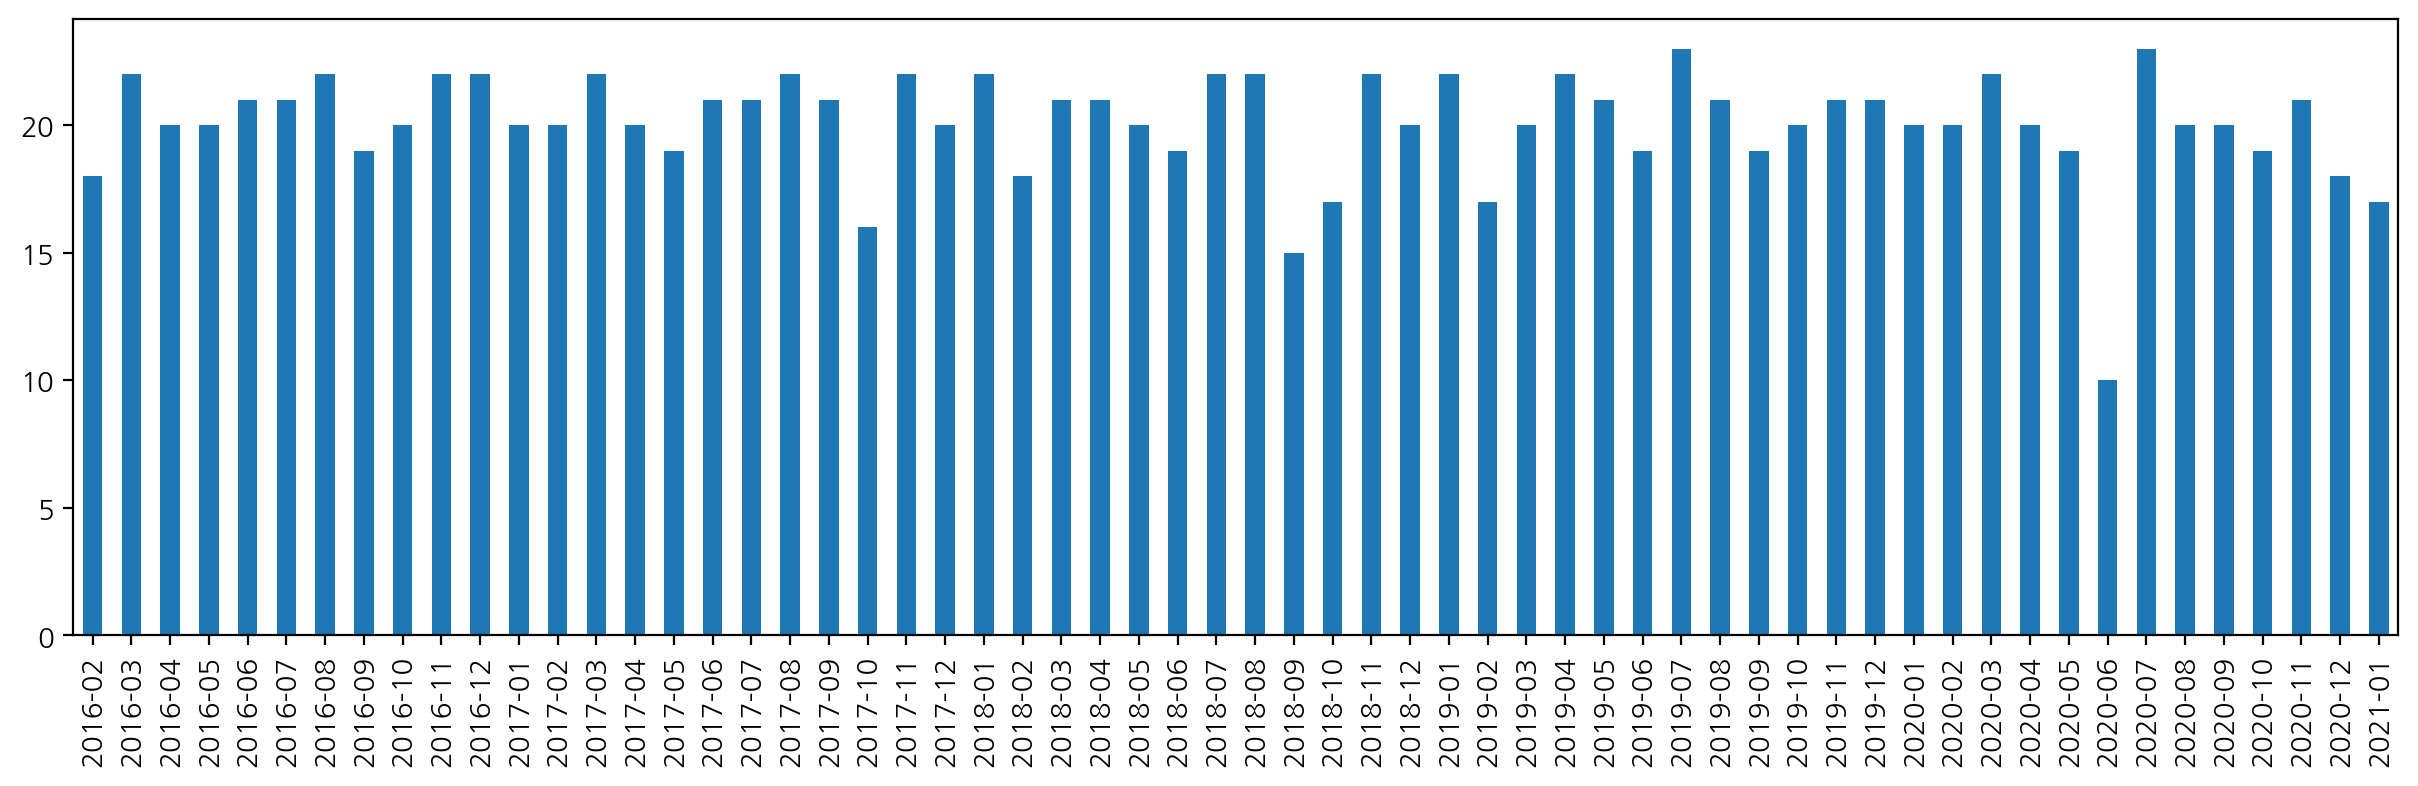

In [123]:
train["YM"].value_counts().sort_index().plot.bar(figsize=(15,4))

In [124]:
train[train["YM"]=='2020-06'][["일","요일명","중식계"]]

일 요일명   중식계
1057   1   월  1114
1058   2   화   761
1059   3   수   693
1060   4   목   657
1061   5   금   505
1062   8   월  1130
1063   9   화   823
1064  10   수   719
1065  11   목   682
1066  12   금   516

* 2020-06에는 2주를 통째로 쉬었나보다..?

<AxesSubplot:xlabel='YM', ylabel='중식계'>

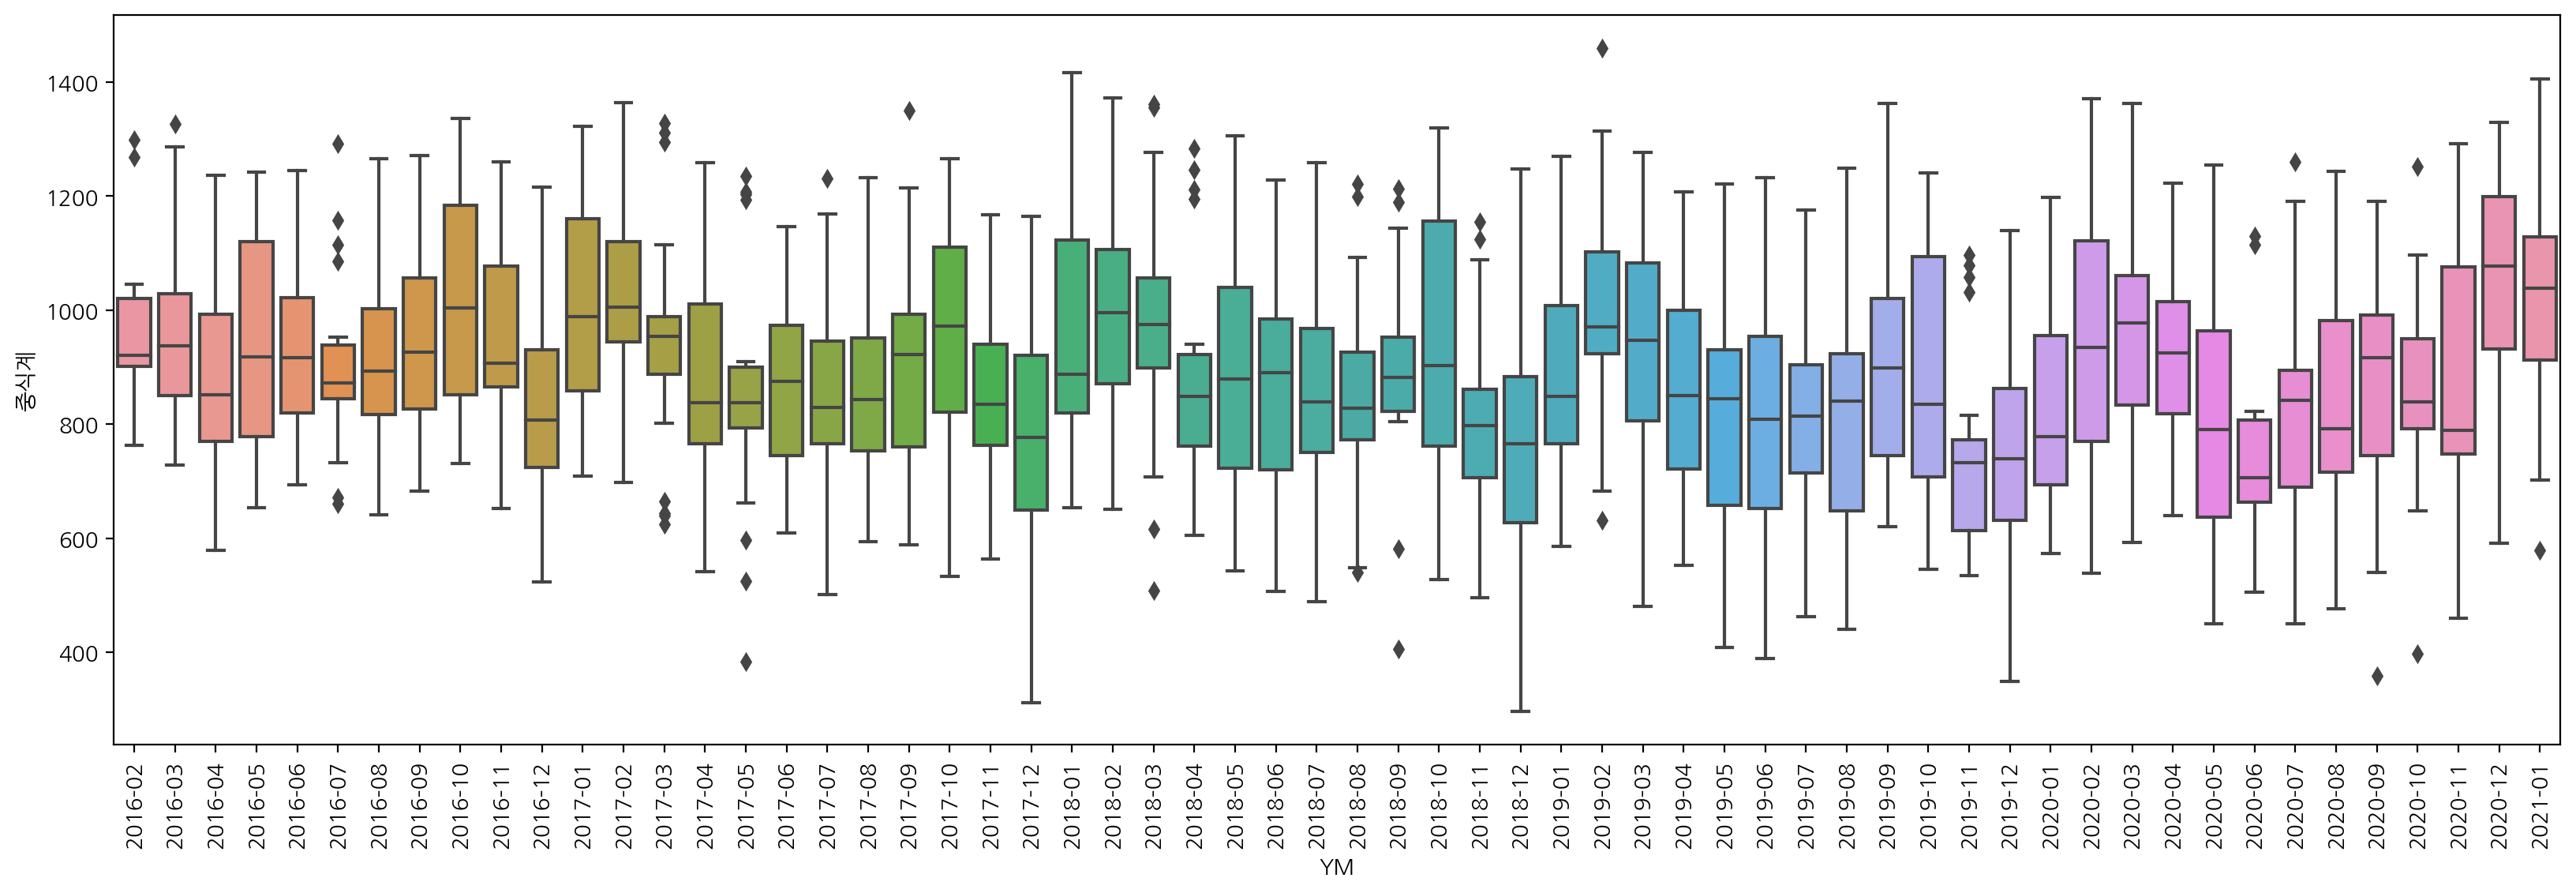

In [125]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='YM', y='중식계')

* 기본적으로 8-900명정도 중식을 먹는 듯하다.
* 1100명 이상, 600명 이하의 상황을 살펴보자

In [126]:
train[train["중식계"] > 1100].head()

일자  요일   정원수  휴가자수  출장자수  야근수  재택근무자수  \
7  2016-02-15   0  2601    87   204  482       0   
12 2016-02-22   0  2601    90   207  434       0   
18 2016-03-02   2  2624   127   182  261       0   
21 2016-03-07   0  2624    50   195  456       0   
26 2016-03-14   0  2624    61   183  376       0   

                                                 중식메뉴  \
7   쌀밥/잡곡밥 (쌀:국내산) 시금치국  닭감자조림 (닭고기:국내산) 연두부*양념장  ...   
12  쌀밥/오곡밥 (쌀:국내산) 쇠고기느타리국  갈치구이  호박꼬지&고사리&무나물  파래...   
18  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기미역국  주꾸미볶음  맛살계란말이  아삭고...   
21  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 콩나물국  닭갈비 (닭고기:국내산) 모둠묵*양념...   
26  쌀밥/잡곡밥 (쌀:국내산) 어묵국  돈육고추장볶음 (돼지고기:국내산) 모둠양채쌈*쌈...   

                                                 석식메뉴   중식계  ...  \
7   쌀밥/잡곡밥 (쌀:국내산) 홍합미역국  등갈비김치찜 (돼지고기,김치:국내산) 임연수...  1268  ...   
12  쌀밥/잡곡밥 (쌀:국내산) 옹심이만두국  떡갈비조림  청포묵무침  부추오이생채  포...  1298  ...   
18  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 된장찌개  버섯불고기  콩나물겨자채  양념깻잎지...  1127  ...   
21  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 대구찌개 돈육굴소스볶음  감자채볶음  물파래무침...  1326  ...   
26  쌀밥/잡곡밥 (쌀:국내산) 달래된장찌개  간장찜닭 (닭고기:국내산) 통도라지구이 참...  1286  ...   

             반찬2  종류  특별메뉴                               dinner_menu d_밥  \
7        연두부*양념장  한식     0  [쌀밥, 홍합미역국, 등갈비김치찜, 임연수구이, 브로컬리초장, 포기김치]  쌀밥   
12  호박꼬지&고사리&무나물  한식     0  [쌀밥, 옹심이만두국, 떡갈비조림, 청포묵무침, 부추오이생채, 포기김치]  쌀밥   
18        맛살계란말이  한식     0    [쌀밥, 된장찌개, 버섯불고기, 콩나물겨자채, 양념깻잎지, 포기김치]  쌀밥   
21       모둠묵*양념장  한식     0   [쌀밥, 대구찌개, 돈육굴소스볶음, 감자채볶음, 물파래무침, 포기김치]  쌀밥   
26      모둠양채쌈*쌈장  한식     0   [쌀밥, 달래된장찌개, 간장찜닭, 통도라지구이, 참나물생채, 포기김치]  쌀밥   

       d_국    d_반찬1   d_반찬2  d_종류  d_특별메뉴  
7    홍합미역국   등갈비김치찜   임연수구이    한식       0  
12  옹심이만두국    떡갈비조림   청포묵무침    한식       0  
18    된장찌개    버섯불고기  콩나물겨자채    한식       0  
21    대구찌개  돈육굴소스볶음   감자채볶음    한식       0  
26  달래된장찌개     간장찜닭  통도라지구이    한식       0  

[5 rows x 35 columns]

Text(0.5, 1.0, '요일별 중식계 평균')

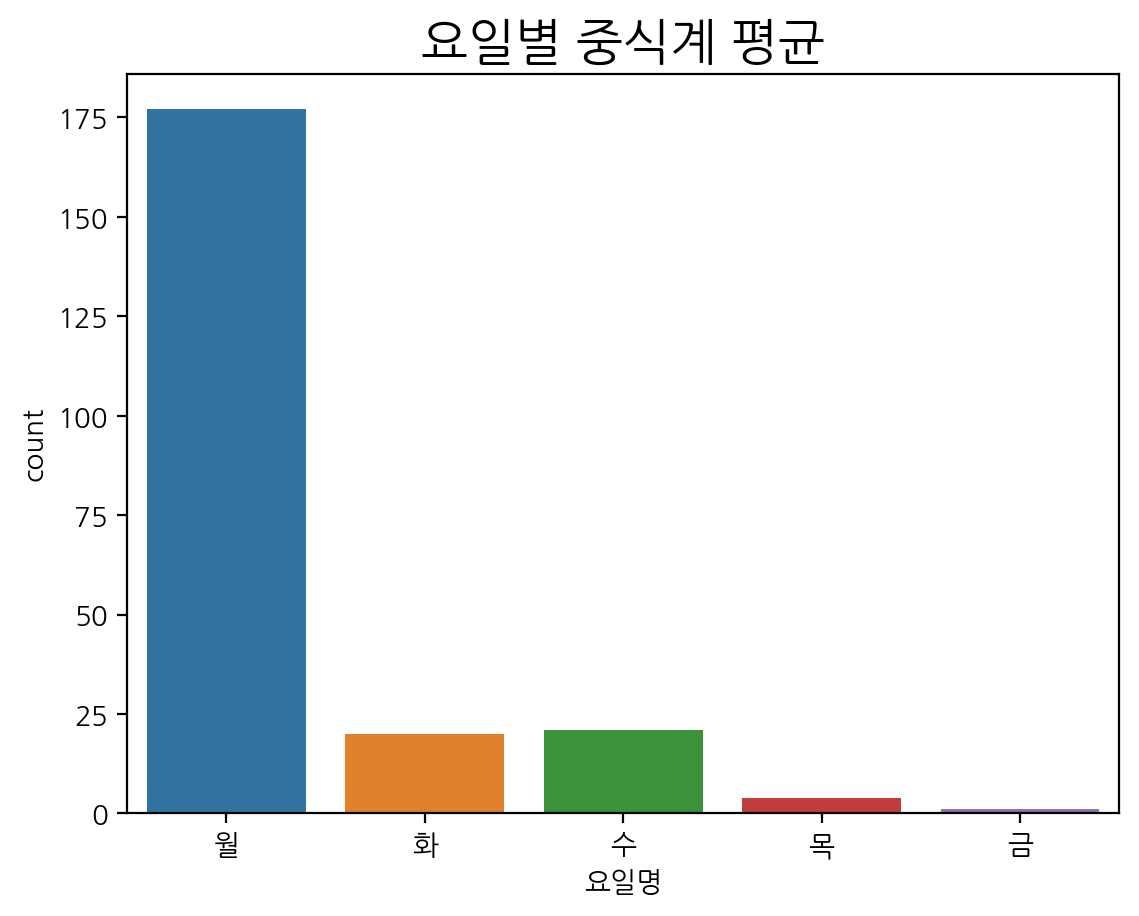

In [127]:
sns.countplot(data=train[train["중식계"] > 1100], x="요일명", 
                   order=train['요일'].value_counts().sort_index().index.map(find_dayofweek))
plt.title("요일별 중식계 평균", fontsize=18)

* 보통 월요일에 많이 중식을 먹는다

<AxesSubplot:xlabel='요일명', ylabel='count'>

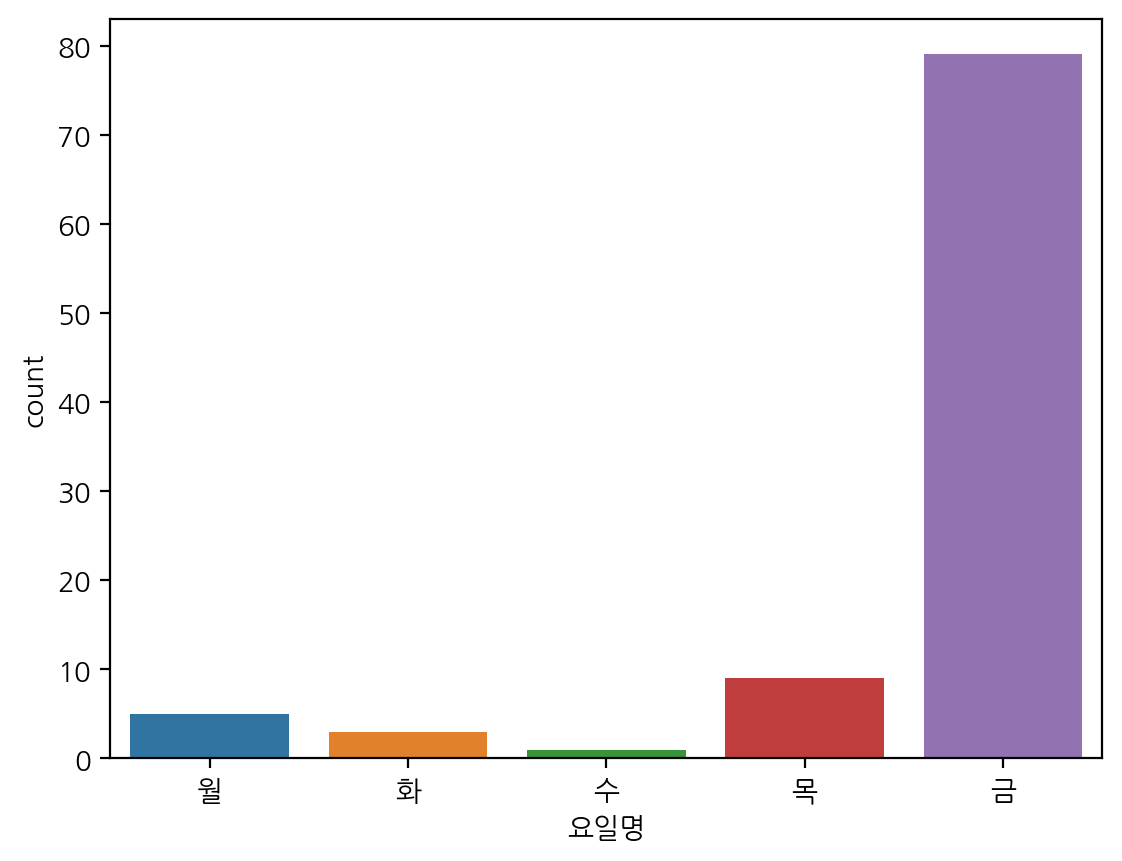

In [128]:
sns.countplot(data=train[train["중식계"] < 600], x="요일명", 
              order=train['요일'].value_counts().sort_index().index.map(find_dayofweek))

* 보통 금요일에 제일 적게 먹는다

<AxesSubplot:xlabel='YM', ylabel='석식계'>

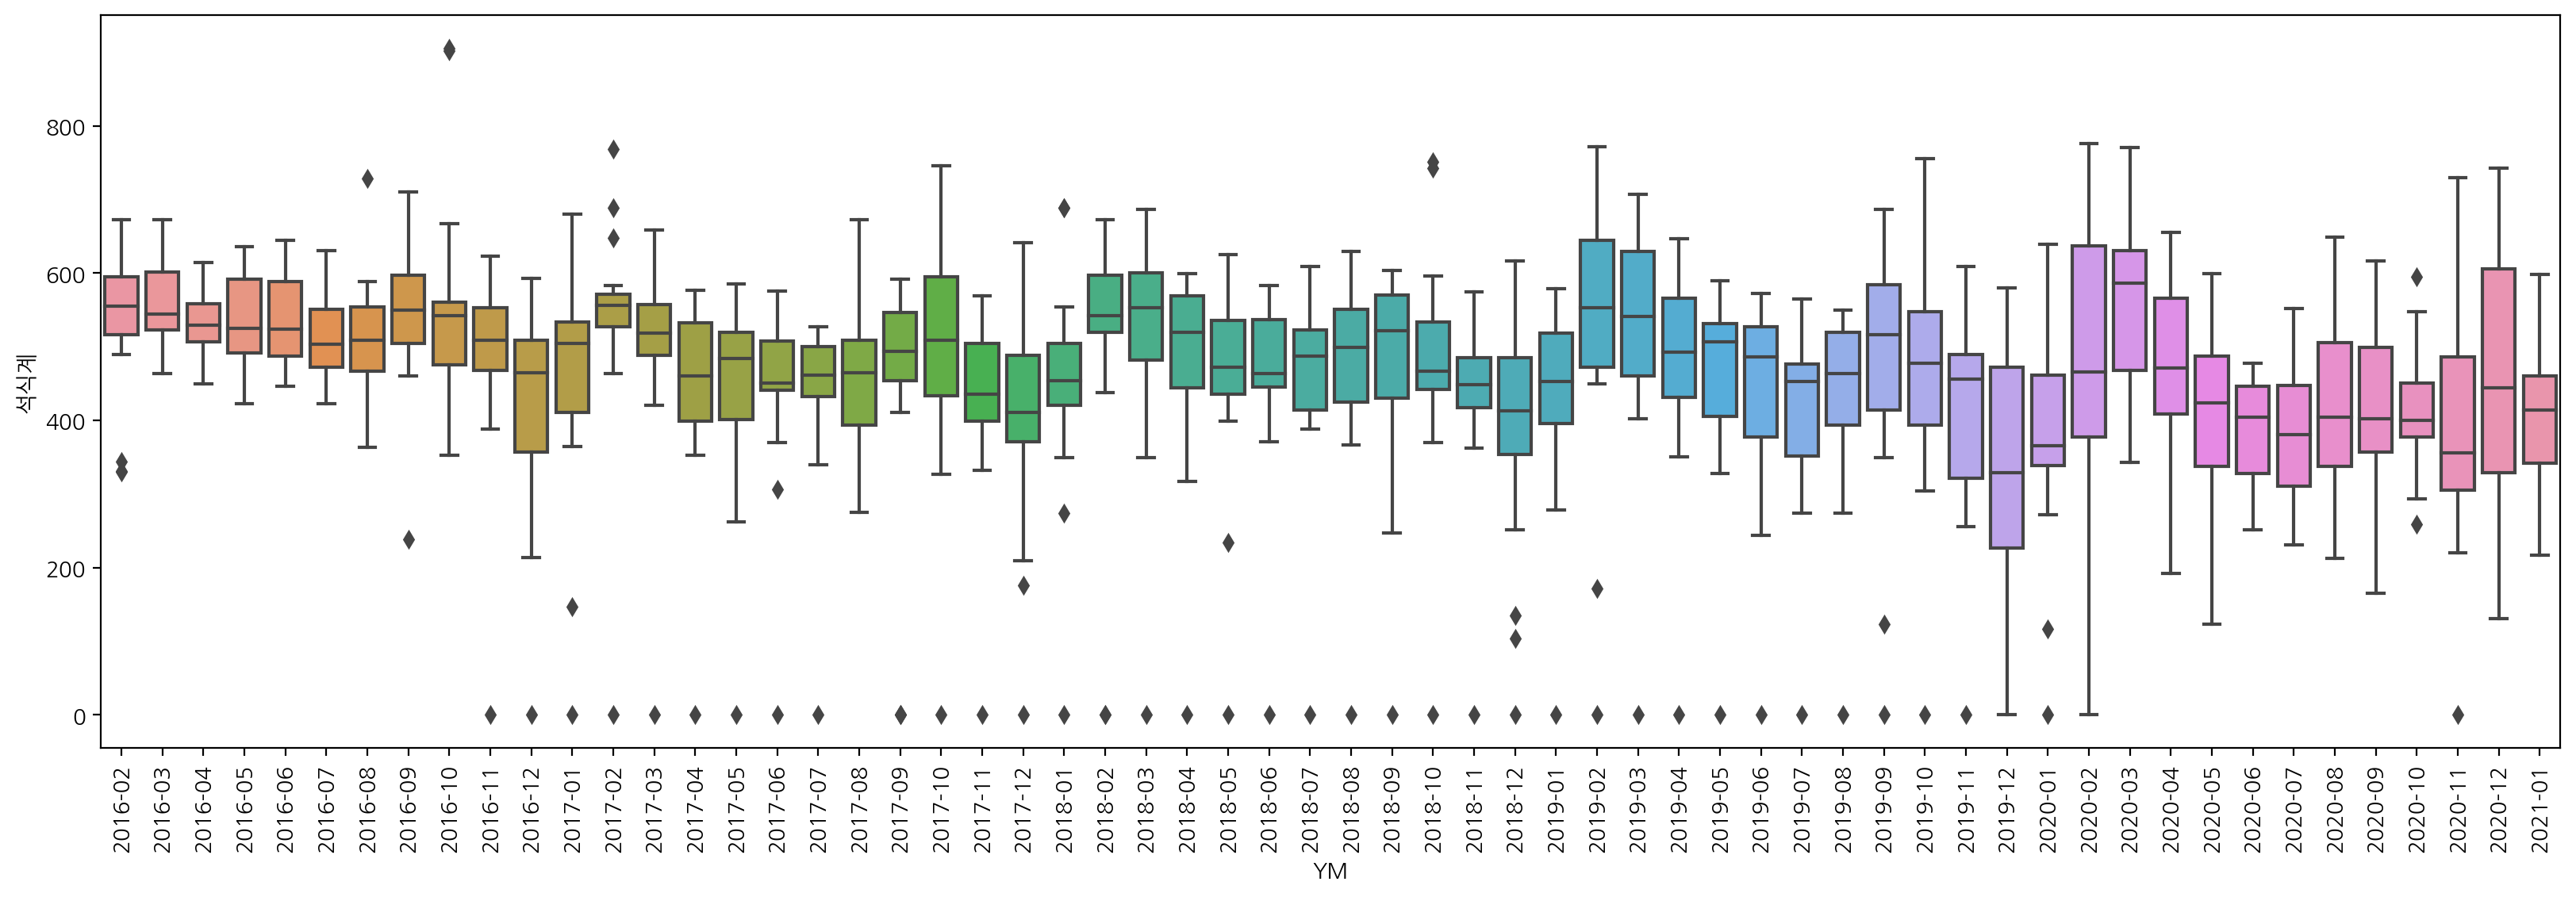

In [129]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.boxplot(data=train, x='YM', y='석식계')

<AxesSubplot:xlabel='요일명', ylabel='count'>

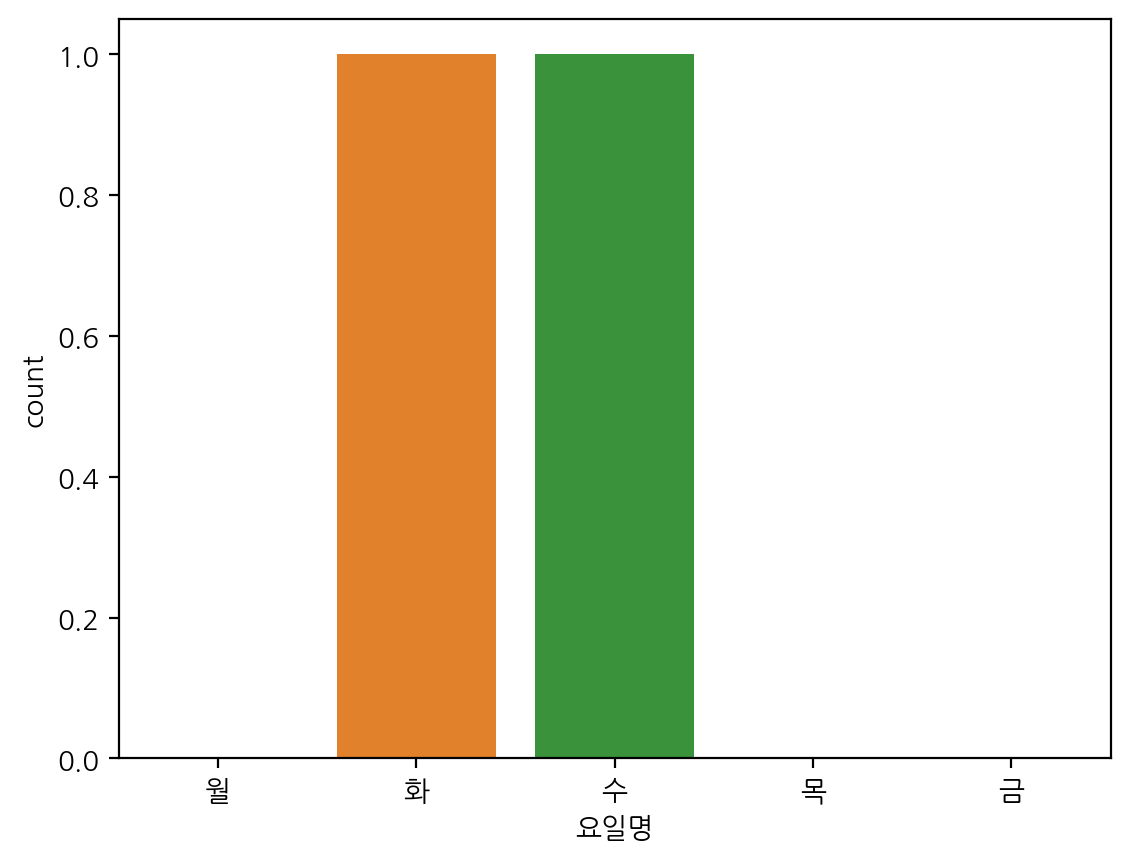

In [130]:
# 석식을 800명 이상 먹은 요일 
sns.countplot(data=train[train["석식계"] > 800], x="요일명", 
                   order=train['요일'].value_counts().sort_index().index.map(find_dayofweek))

In [131]:
train[train["석식계"] > 800]

일자  요일   정원수  휴가자수  출장자수   야근수  재택근무자수  \
163 2016-10-04   1  2670    59   239  1035       0   
164 2016-10-05   2  2670    41   228     0       0   

                                                  중식메뉴  \
163  쌀밥/잡곡밥 (쌀:국내산) 배추된장국  버섯불고기 (쇠고기:호주산) 골뱅이소면무침 ...   
164  쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 매운주꾸미볶음  모둠소세지...   

                                                  석식메뉴   중식계  ...      반찬2  \
163  쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 (돼지고기:국내산) 닭볶음 (닭고기:국내산) ...  1262  ...  골뱅이소면무침   
164  쌀밥/잡곡밥 (쌀:국내산) 순두부찌개  미니함박조림 (쇠고기:호주산,돈육:국내산) ...  1336  ...  모둠소세지구이   

     종류  특별메뉴                             dinner_menu d_밥    d_국   d_반찬1  \
163  한식     0  [쌀밥, 콩비지찌개, 닭볶음, 해파리냉채, 상추치커리무침, 포기김치]  쌀밥  콩비지찌개     닭볶음   
164  한식     0  [쌀밥, 순두부찌개, 미니함박조림, 실곤약초무침, 취나물, 포기김치]  쌀밥  순두부찌개  미니함박조림   

      d_반찬2  d_종류  d_특별메뉴  
163   해파리냉채    한식       0  
164  실곤약초무침    한식       0  

[2 rows x 35 columns]

* 800명 이상 먹은 날은 화, 수 1일씩 : 16년 10.4-5일 : 야근이 많았나..?

<AxesSubplot:xlabel='요일명', ylabel='count'>

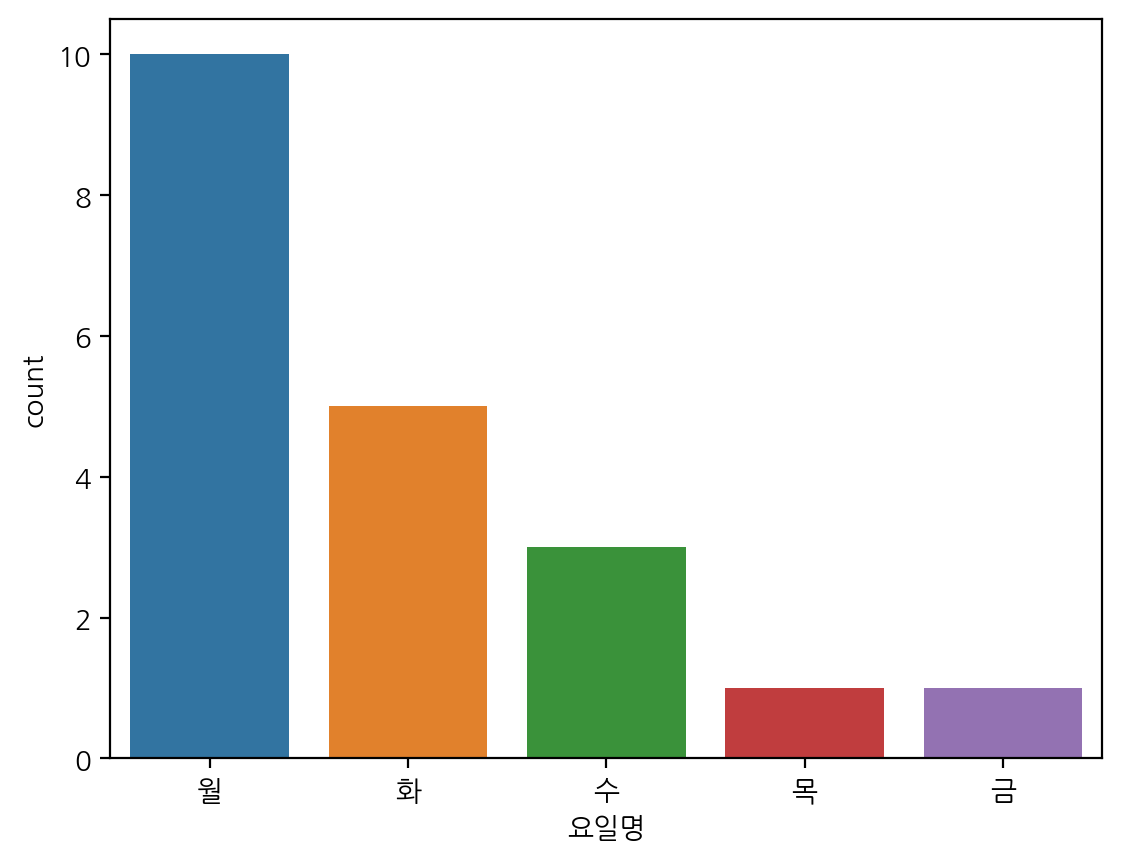

In [132]:
# 석식을 700명 이상 먹은 요일
sns.countplot(data=train[train["석식계"] > 700], x="요일명", 
                   order=train['요일'].value_counts().sort_index().index.map(find_dayofweek))

## 요일별 중식, 석식계

Text(0.5, 1.0, '요일별 석식계')

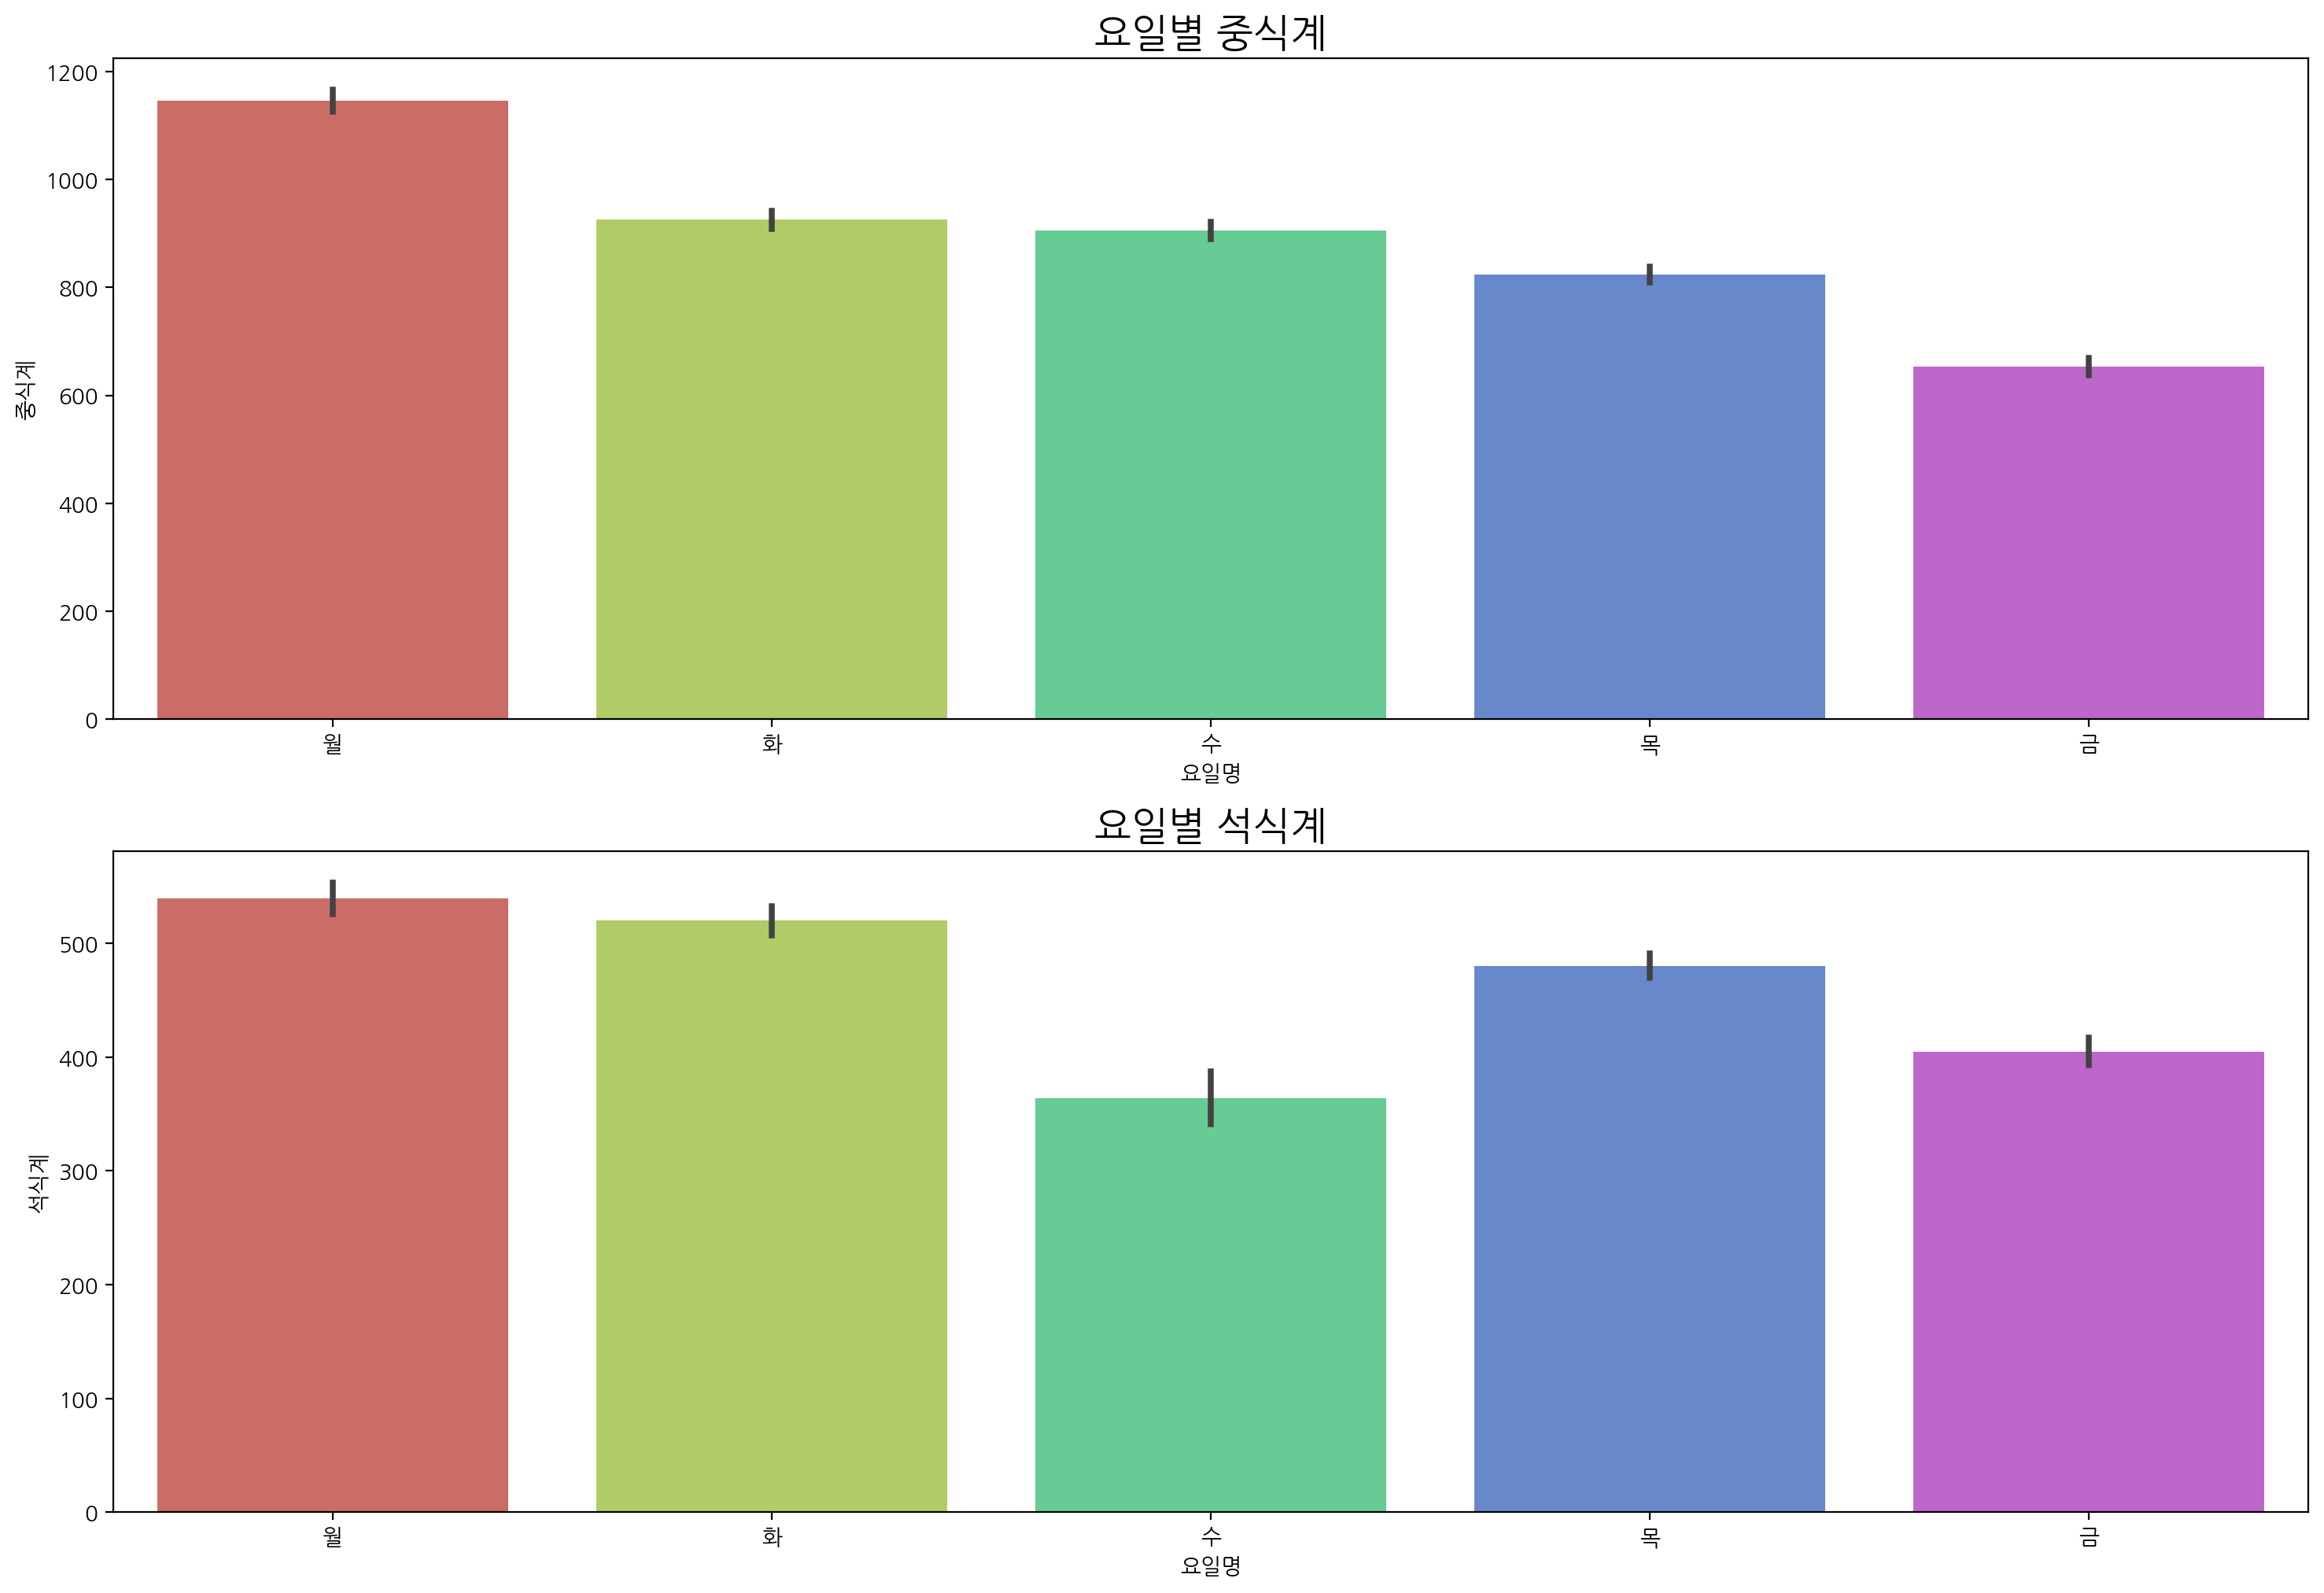

In [133]:
fig, ax = plt.subplots(nrows=2, figsize=(18,12))
cm = sns.color_palette('hls', len(train['요일명'].unique()))

sns.barplot(data=train, x="요일명", y="중식계", ax=ax[0], palette=cm)
ax[0].set_title("요일별 중식계", fontsize=18)
sns.barplot(data=train, x="요일명", y="석식계", ax=ax[1], palette=cm)
ax[1].set_title("요일별 석식계", fontsize=18)

## 변수별 상관관계 보기

In [134]:
train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택근무자수', '중식메뉴', '석식메뉴',
       '중식계', '석식계', '연', '월', '일', 'YM', '요일명', '식사가능인원', '휴가비율', '출장비율',
       '야근비율', '재택비율', 'lunch_menu', '밥', '국', '반찬1', '반찬2', '종류', '특별메뉴',
       'dinner_menu', 'd_밥', 'd_국', 'd_반찬1', 'd_반찬2', 'd_종류', 'd_특별메뉴'],
      dtype='object')

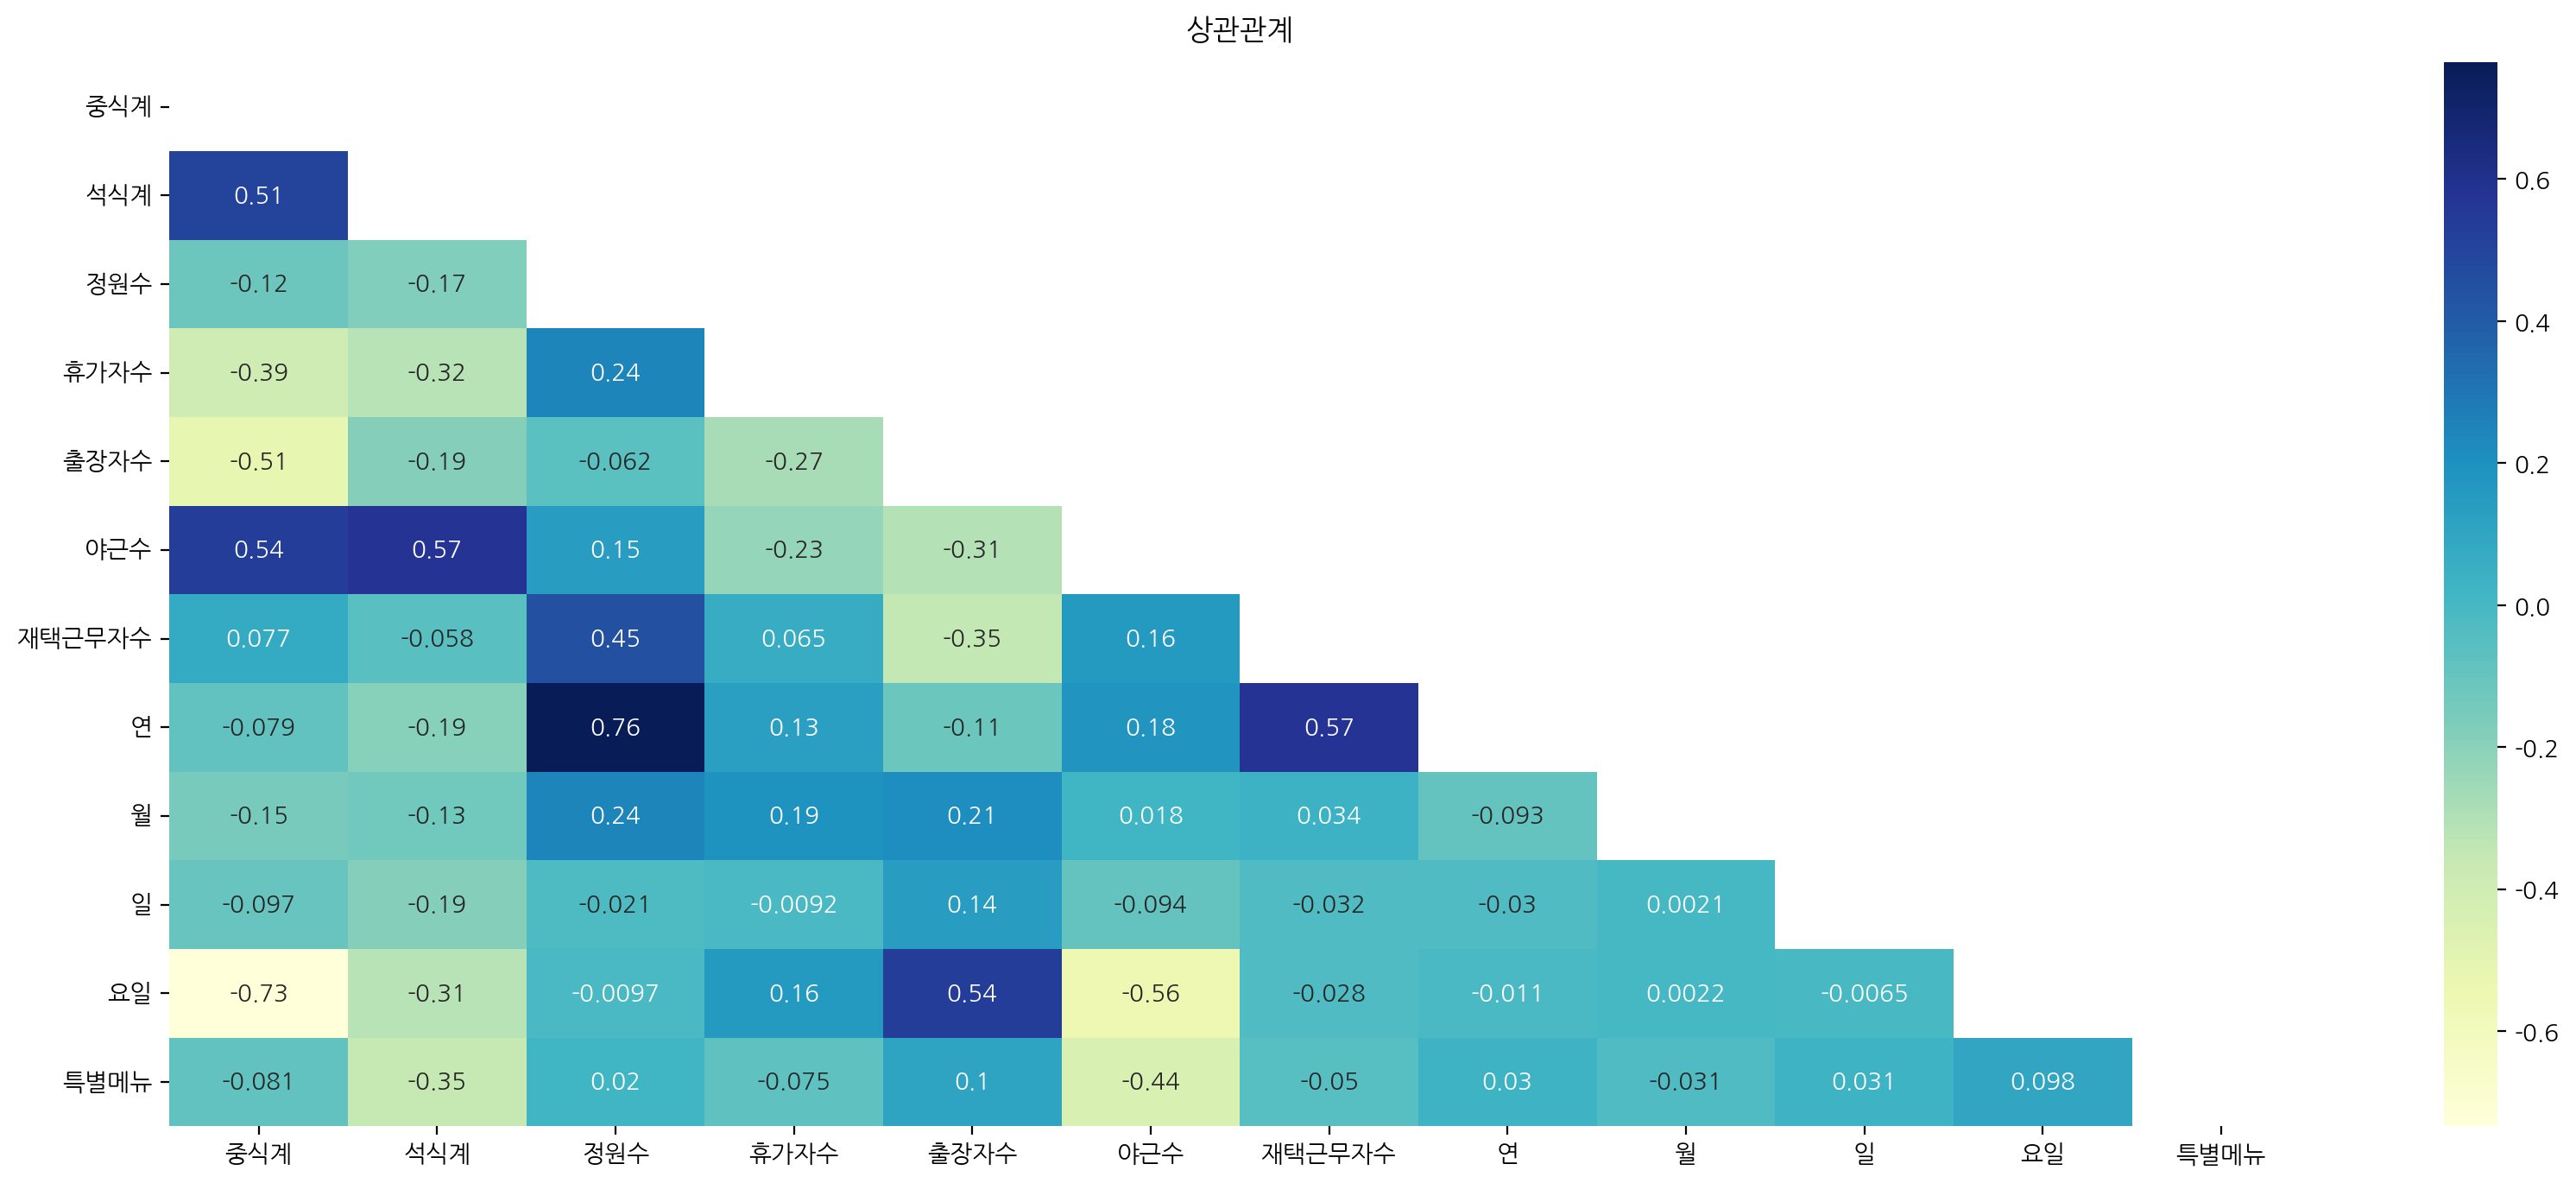

In [135]:
df = train[['중식계', '석식계','정원수', '휴가자수', '출장자수', '야근수',
       '재택근무자수', '연', '월', '일', '요일', '특별메뉴']]

mask = np.triu(np.ones_like(df.corr()))

fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", mask=mask)
ax.set_title("상관관계",pad=10)
plt.show()